# IFN680 project 1 Individual Report

Student Name: Le Khanh Linh Pham

Student ID: n10364960

## $\textcolor{blue}{\text{Task 1 - creating dataloader}}$

### 1.1 loadData.py
Using the images provided in the folder trainval, prepare your data using pytorch data loader.

In [1]:
%run task1.py
train_dataset, val_dataset, train_dataloader, val_dataloader = loadData(filedir='trainval')

### 1.2 Image examples

Follow the layout of the figure provided

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.5298067].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.51477456..1.488664].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.5878294].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.36980993..1.5402461].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5355698..1.4486649].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.44197285..1.5

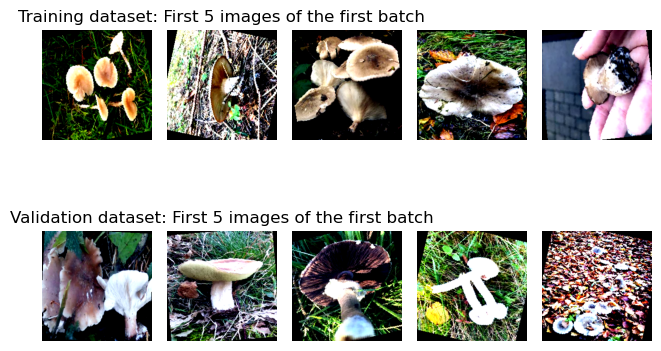

In [2]:
#visualise the train dataset with these transforms

train_data = next(iter(train_dataloader))
val_data = next(iter(val_dataloader))

fig, ax = plt.subplots(2, 5)

#Training
for idx in range(5):
    train_image = (train_data[0][idx].numpy())/2 + 0.5
    train_image = np.moveaxis(train_image, 0, 2)
    ax[0, idx].imshow(train_image)
    ax[0, idx].set_axis_off()
#Validation
for idx in range(5):
    val_image = (val_data[0][idx].numpy())/2 + 0.5
    val_image = np.moveaxis(val_image, 0, 2)
    ax[1, idx].imshow(val_image)
    ax[1, idx].set_axis_off()

ax[0, 1].set_title('Training dataset: First 5 images of the first batch')
ax[1, 1].set_title('Validation dataset: First 5 images of the first batch')

plt.tight_layout()
plt.show()

### 1.3 Explain and justify your choice of data augmentation

I used *RandomHorizontalFlip()*, *RandomRotation()*, and *ColorJitter()*.

1. **RandomHorizontalFlip():** Mushroom may appear flipped in real-world scenarios. This augmentation helps generalise such cases, make the model less sensitive to horizontal orientation of the specimen.
2. **RandomRotation():** Fungi rarely appear up-right in real world. Slight rotations help the model improve its robustness to the varient of the angle at which the image was taken.
3. **ColorJitter():** This augmentation simulates changes in lighting, camera expposure and colour intensity. These features are common in outdoor images. It prevents the model from overfitting to specific lighting conditions in the dataset.

### 1.4 Discuss ethical issues and recommend performance metrics

1. Safety Issue: It is unethical to deploy a model in critical health contexts without human validation.
2. Performance/Misclassification Risk: if a poisonous species is predicted as edible, it can lead to serious harm or death.
3. Dependent on AI: we must include disclaimers when we deploy this app because the model is not a replacement for expert identification. Users may overrely on AI and trust AI predictions blindly without proper botanical knowledge.
4. Data Bias: The model may learn biases from horizontal orientation, rotation, lighting, background or image source rather than the actual fungi features.

***Recommend Performance Metrics***

We need to use Precision, Recall and F1-Score, especially Recall since we do not want to have incorrect Poisonouse class identified as edible. We want to minimise the number of false negative.

## $\textcolor{blue}{\text{Task 2 - Model with best performance}}$

### 2.1 Import your code and train your model

Import your model and train it!

In [3]:
%run task2.py

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /tmp/.cache/torch/hub/main.zip


/tmp/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/tmp/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/tmp/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_pretrain.pth" to /tmp/.cache/torch/hub/checkpoints/dinov2_vits14_pretrain.pth


100%|██████████| 84.2M/84.2M [00:00<00:00, 646MB/s]


In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

dino = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')
dino.eval()
dino.to(device)

Using cache found in /tmp/.cache/torch/hub/facebookresearch_dinov2_main


DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-11): 12 x NestedTensorBlock(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
  )
  (norm): LayerNorm((384,), eps=1e-06, elementwise_affi

In [5]:
train_labels = np.array([data[1] for data in train_dataset])
lbls, counts = np.unique(train_labels, return_counts = True)
weighting = torch.DoubleTensor([1/x for x in counts])
sample_weights = weighting[train_labels]
sampler = torch.utils.data.WeightedRandomSampler(sample_weights, len(train_dataset))

Testing: lr=0.001, bs=4, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 1: loss=1.177 acc=0.614



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.99it/s]


Validation 1: loss=0.868 acc=0.680
Testing: lr=0.001, bs=4, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.02it/s]

Training 2: loss=0.519 acc=0.827



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.18it/s]


Validation 2: loss=0.633 acc=0.770
Testing: lr=0.001, bs=4, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 3: loss=0.332 acc=0.897



Epoch 3 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.03it/s]


Validation 3: loss=0.548 acc=0.790
Testing: lr=0.001, bs=4, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 4: loss=0.296 acc=0.898



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 26.82it/s]


Validation 4: loss=0.554 acc=0.810
Testing: lr=0.001, bs=4, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 5: loss=0.226 acc=0.923



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.10it/s]


Validation 5: loss=0.517 acc=0.840
Testing: lr=0.001, bs=4, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 6: loss=0.179 acc=0.953



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.05it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 6: loss=0.499 acc=0.800
Testing: lr=0.001, bs=4, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.01it/s]

Training 7: loss=0.180 acc=0.946



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.75it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 7: loss=0.494 acc=0.800
Testing: lr=0.001, bs=4, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 225/225 [00:31<00:00,  7.25it/s]

Training 8: loss=0.165 acc=0.956



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 24.76it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 8: loss=0.536 acc=0.830
Testing: lr=0.001, bs=4, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 225/225 [00:36<00:00,  6.13it/s]

Training 9: loss=0.174 acc=0.948



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 20.58it/s]


Validation 9: loss=0.479 acc=0.880
Testing: lr=0.001, bs=4, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 225/225 [00:37<00:00,  6.07it/s]

Training 10: loss=0.142 acc=0.962



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 20.62it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 10: loss=0.560 acc=0.840
Testing: lr=0.001, bs=4, momentum=0.8


Epoch 11 - training phase: 100%|██████████| 225/225 [00:37<00:00,  6.06it/s]

Training 11: loss=0.116 acc=0.973



Epoch 11 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 20.55it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 11: loss=0.547 acc=0.810
Testing: lr=0.001, bs=4, momentum=0.8


Epoch 12 - training phase: 100%|██████████| 225/225 [00:36<00:00,  6.11it/s]

Training 12: loss=0.096 acc=0.980



Epoch 12 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 20.36it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 12: loss=0.452 acc=0.880
Testing: lr=0.001, bs=4, momentum=0.8


Epoch 13 - training phase: 100%|██████████| 225/225 [00:36<00:00,  6.11it/s]

Training 13: loss=0.117 acc=0.969



Epoch 13 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 19.57it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 13: loss=0.491 acc=0.850
Testing: lr=0.001, bs=4, momentum=0.8


Epoch 14 - training phase: 100%|██████████| 225/225 [00:37<00:00,  5.93it/s]

Training 14: loss=0.081 acc=0.980



Epoch 14 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 20.10it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


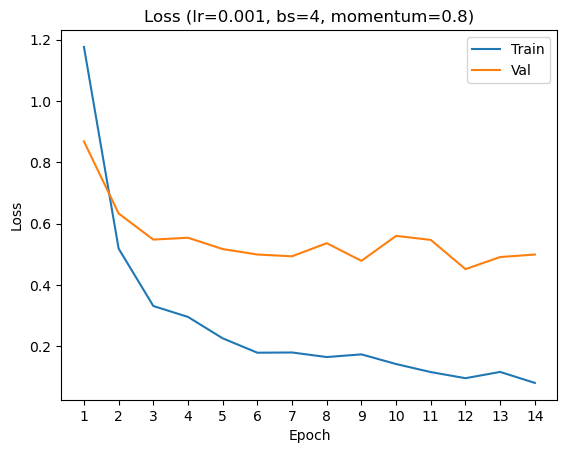

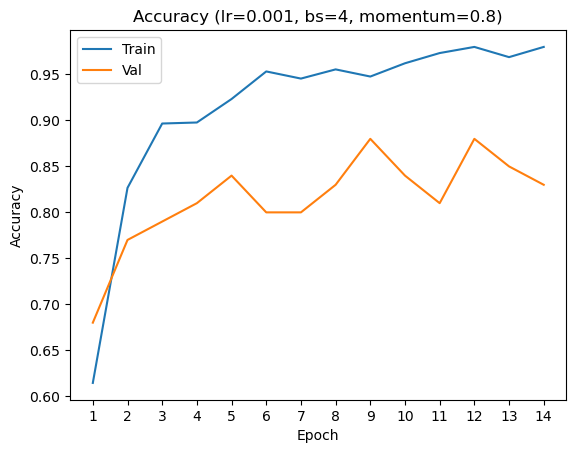

Testing: lr=0.001, bs=4, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 225/225 [00:37<00:00,  5.98it/s]

Training 1: loss=1.216 acc=0.638



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 20.39it/s]


Validation 1: loss=0.738 acc=0.770
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 225/225 [00:36<00:00,  6.13it/s]

Training 2: loss=0.539 acc=0.829



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 20.58it/s]


Validation 2: loss=0.845 acc=0.780
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 225/225 [00:37<00:00,  6.00it/s]


Training 3: loss=0.317 acc=0.889


Epoch 3 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 20.18it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 3: loss=0.675 acc=0.760
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 225/225 [00:36<00:00,  6.08it/s]

Training 4: loss=0.304 acc=0.900



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.09it/s]


Validation 4: loss=0.772 acc=0.810
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 225/225 [00:29<00:00,  7.69it/s]

Training 5: loss=0.237 acc=0.916



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.41it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 5: loss=0.661 acc=0.810
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.77it/s]

Training 6: loss=0.223 acc=0.931



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.25it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 6: loss=0.568 acc=0.810
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 7: loss=0.119 acc=0.953



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.04it/s]


Validation 7: loss=0.539 acc=0.840
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 8: loss=0.146 acc=0.944



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.97it/s]


Validation 8: loss=0.542 acc=0.850
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 9 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 9: loss=0.136 acc=0.953



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.05it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 9: loss=0.560 acc=0.830
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 10 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 10: loss=0.155 acc=0.947



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.04it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 10: loss=0.583 acc=0.820
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 11 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 11: loss=0.121 acc=0.958



Epoch 11 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.03it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 11: loss=0.655 acc=0.830
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 12 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.13it/s]

Training 12: loss=0.125 acc=0.962



Epoch 12 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.26it/s]


Validation 12: loss=0.508 acc=0.870
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 13 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.11it/s]

Training 13: loss=0.101 acc=0.963



Epoch 13 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.07it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 13: loss=0.681 acc=0.810
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 14 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.10it/s]

Training 14: loss=0.076 acc=0.973



Epoch 14 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.81it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 14: loss=0.640 acc=0.860
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 15 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 15: loss=0.088 acc=0.971



Epoch 15 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.06it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 15: loss=0.748 acc=0.860
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 16 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 16: loss=0.079 acc=0.971



Epoch 16 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.84it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 16: loss=0.616 acc=0.820
Testing: lr=0.001, bs=4, momentum=0.9


Epoch 17 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 17: loss=0.066 acc=0.977



Epoch 17 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.98it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


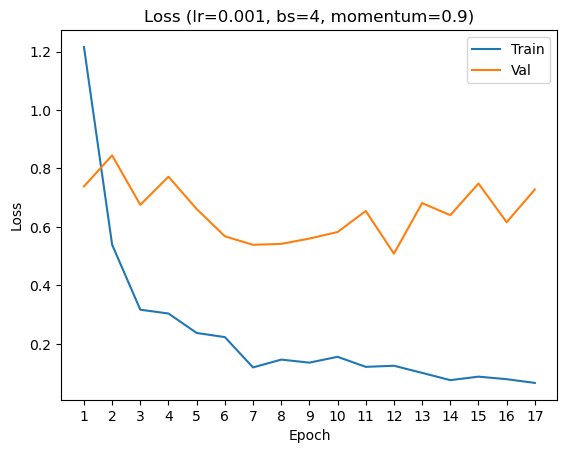

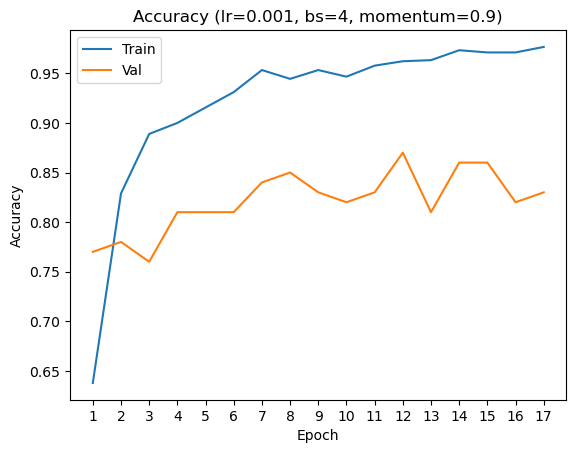

Testing: lr=0.001, bs=4, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.10it/s]

Training 1: loss=2.088 acc=0.596



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.17it/s]


Validation 1: loss=1.614 acc=0.650
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 2: loss=1.171 acc=0.776



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.97it/s]


Validation 2: loss=1.154 acc=0.750
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 3: loss=0.679 acc=0.856



Epoch 3 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.69it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 3: loss=1.302 acc=0.730
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.10it/s]

Training 4: loss=0.512 acc=0.891



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.99it/s]


Validation 4: loss=1.076 acc=0.830
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 5: loss=0.648 acc=0.870



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.08it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 5: loss=1.320 acc=0.760
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.10it/s]

Training 6: loss=0.329 acc=0.910



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.00it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 6: loss=1.092 acc=0.800
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 7: loss=0.441 acc=0.914



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.10it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 7: loss=1.292 acc=0.770
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 8: loss=0.511 acc=0.880



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.00it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 8: loss=1.357 acc=0.830
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 9: loss=0.171 acc=0.953



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.98it/s]


Validation 9: loss=1.089 acc=0.840
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 10: loss=0.234 acc=0.937



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.98it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 10: loss=0.889 acc=0.830
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 11 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 11: loss=0.145 acc=0.949



Epoch 11 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.07it/s]


Validation 11: loss=0.928 acc=0.850
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 12 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 12: loss=0.145 acc=0.958



Epoch 12 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.88it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 12: loss=0.871 acc=0.800
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 13 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 13: loss=0.159 acc=0.960



Epoch 13 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.92it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 13: loss=1.166 acc=0.790
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 14 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 14: loss=0.091 acc=0.969



Epoch 14 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.01it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 14: loss=1.223 acc=0.810
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 15 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 15: loss=0.093 acc=0.969



Epoch 15 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.80it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 15: loss=1.012 acc=0.850
Testing: lr=0.001, bs=4, momentum=0.95


Epoch 16 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 16: loss=0.157 acc=0.959



Epoch 16 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.11it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


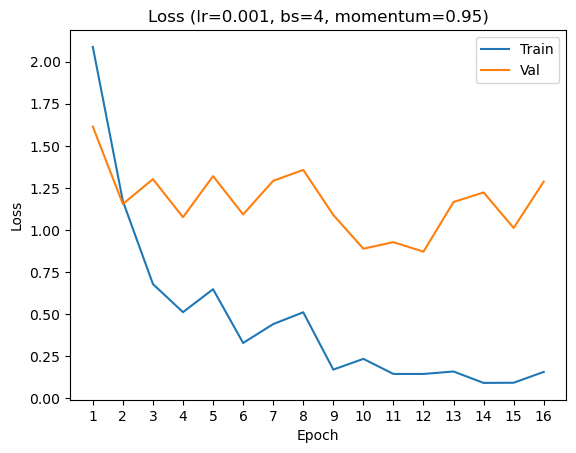

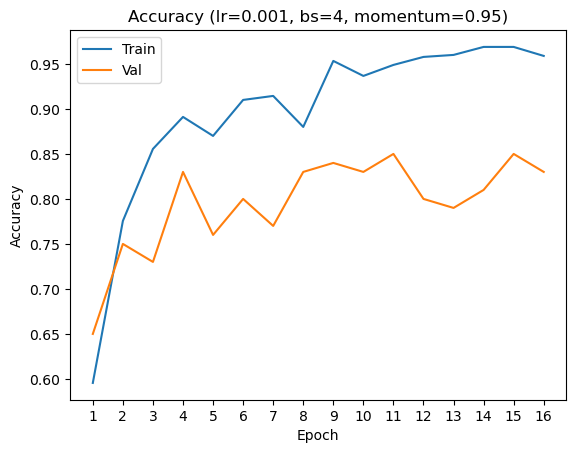

Testing: lr=0.001, bs=8, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.39it/s]

Training 1: loss=1.375 acc=0.546



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.45it/s]


Validation 1: loss=0.971 acc=0.690
Testing: lr=0.001, bs=8, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 2: loss=0.684 acc=0.777



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 13.93it/s]


Validation 2: loss=0.613 acc=0.820
Testing: lr=0.001, bs=8, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 3: loss=0.456 acc=0.877



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.86it/s]


Validation 3: loss=0.501 acc=0.830
Testing: lr=0.001, bs=8, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 4: loss=0.369 acc=0.892



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 13.74it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 4: loss=0.557 acc=0.800
Testing: lr=0.001, bs=8, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 113/113 [00:33<00:00,  3.39it/s]

Training 5: loss=0.346 acc=0.904



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:01<00:00, 11.31it/s]


Validation 5: loss=0.527 acc=0.860
Testing: lr=0.001, bs=8, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 113/113 [00:34<00:00,  3.27it/s]

Training 6: loss=0.294 acc=0.910



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:01<00:00, 10.91it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 6: loss=0.552 acc=0.810
Testing: lr=0.001, bs=8, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 113/113 [00:34<00:00,  3.28it/s]

Training 7: loss=0.262 acc=0.932



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:01<00:00, 11.25it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 7: loss=0.479 acc=0.860
Testing: lr=0.001, bs=8, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 113/113 [00:33<00:00,  3.36it/s]

Training 8: loss=0.235 acc=0.928



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:01<00:00, 11.13it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 8: loss=0.439 acc=0.860
Testing: lr=0.001, bs=8, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 113/113 [00:33<00:00,  3.37it/s]

Training 9: loss=0.206 acc=0.946



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:01<00:00, 10.88it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 9: loss=0.455 acc=0.850
Testing: lr=0.001, bs=8, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 113/113 [00:34<00:00,  3.26it/s]

Training 10: loss=0.186 acc=0.952



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:01<00:00, 11.14it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


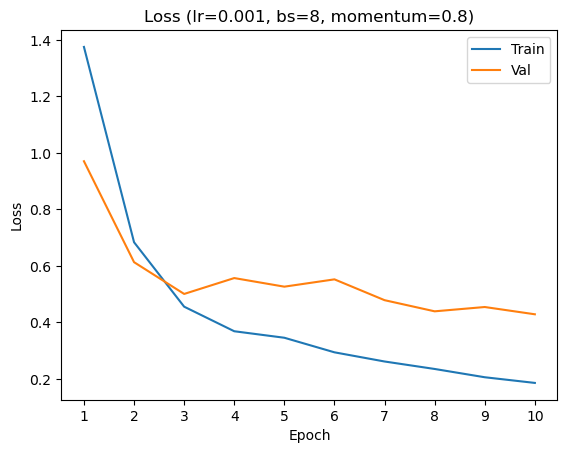

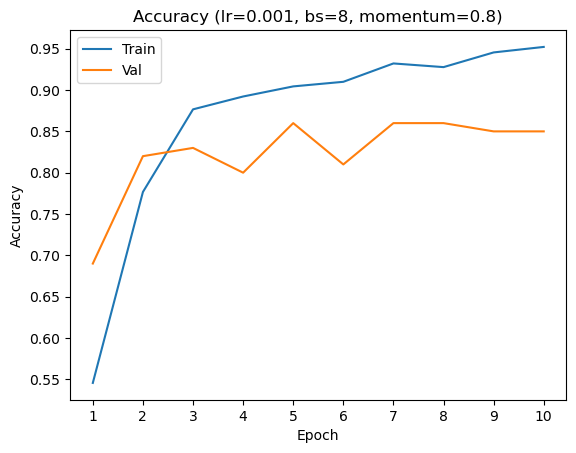

Testing: lr=0.001, bs=8, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 113/113 [00:33<00:00,  3.34it/s]

Training 1: loss=1.252 acc=0.583



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:01<00:00, 11.16it/s]


Validation 1: loss=0.735 acc=0.740
Testing: lr=0.001, bs=8, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 113/113 [00:30<00:00,  3.72it/s]

Training 2: loss=0.507 acc=0.827



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.52it/s]


Validation 2: loss=0.618 acc=0.790
Testing: lr=0.001, bs=8, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.38it/s]

Training 3: loss=0.378 acc=0.876



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.64it/s]


Validation 3: loss=0.561 acc=0.840
Testing: lr=0.001, bs=8, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.38it/s]

Training 4: loss=0.264 acc=0.913



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.51it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 4: loss=0.549 acc=0.810
Testing: lr=0.001, bs=8, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 5: loss=0.274 acc=0.917



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.52it/s]


Validation 5: loss=0.362 acc=0.870
Testing: lr=0.001, bs=8, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 6: loss=0.190 acc=0.952



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.51it/s]


Validation 6: loss=0.443 acc=0.890
Testing: lr=0.001, bs=8, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 7: loss=0.149 acc=0.960



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.47it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 7: loss=0.487 acc=0.850
Testing: lr=0.001, bs=8, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 8: loss=0.154 acc=0.966



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.24it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 8: loss=0.496 acc=0.830
Testing: lr=0.001, bs=8, momentum=0.9


Epoch 9 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.39it/s]

Training 9: loss=0.142 acc=0.958



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.56it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 9: loss=0.484 acc=0.860
Testing: lr=0.001, bs=8, momentum=0.9


Epoch 10 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 10: loss=0.140 acc=0.961



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.33it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 10: loss=0.405 acc=0.870
Testing: lr=0.001, bs=8, momentum=0.9


Epoch 11 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 11: loss=0.145 acc=0.957



Epoch 11 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.60it/s]

Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


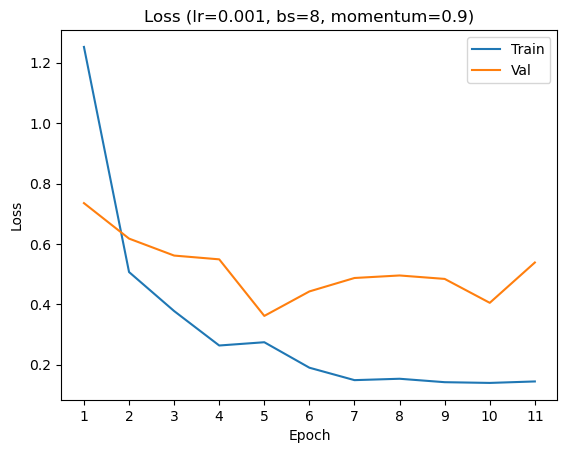

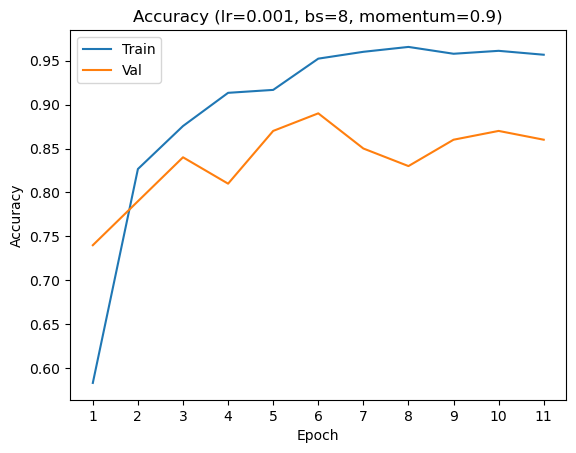

Testing: lr=0.001, bs=8, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 1: loss=1.311 acc=0.607



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.53it/s]


Validation 1: loss=1.047 acc=0.750
Testing: lr=0.001, bs=8, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 2: loss=0.461 acc=0.840



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.23it/s]


Validation 2: loss=0.602 acc=0.790
Testing: lr=0.001, bs=8, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 3: loss=0.324 acc=0.892



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.32it/s]


Validation 3: loss=0.555 acc=0.840
Testing: lr=0.001, bs=8, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 4: loss=0.377 acc=0.866



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.46it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 4: loss=0.633 acc=0.830
Testing: lr=0.001, bs=8, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 5: loss=0.188 acc=0.943



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.47it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 5: loss=0.617 acc=0.820
Testing: lr=0.001, bs=8, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 6: loss=0.145 acc=0.949



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.43it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 6: loss=0.675 acc=0.790
Testing: lr=0.001, bs=8, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 7: loss=0.207 acc=0.939



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.59it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 7: loss=0.635 acc=0.840
Testing: lr=0.001, bs=8, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.43it/s]

Training 8: loss=0.146 acc=0.958



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.44it/s]


Validation 8: loss=0.546 acc=0.860
Testing: lr=0.001, bs=8, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.43it/s]

Training 9: loss=0.126 acc=0.961



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.54it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 9: loss=0.718 acc=0.790
Testing: lr=0.001, bs=8, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.43it/s]

Training 10: loss=0.147 acc=0.952



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.45it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 10: loss=0.643 acc=0.850
Testing: lr=0.001, bs=8, momentum=0.95


Epoch 11 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.39it/s]

Training 11: loss=0.081 acc=0.973



Epoch 11 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.34it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 11: loss=0.607 acc=0.820
Testing: lr=0.001, bs=8, momentum=0.95


Epoch 12 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.39it/s]

Training 12: loss=0.094 acc=0.968



Epoch 12 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.53it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 12: loss=0.606 acc=0.800
Testing: lr=0.001, bs=8, momentum=0.95


Epoch 13 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 13: loss=0.109 acc=0.960



Epoch 13 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.51it/s]

Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


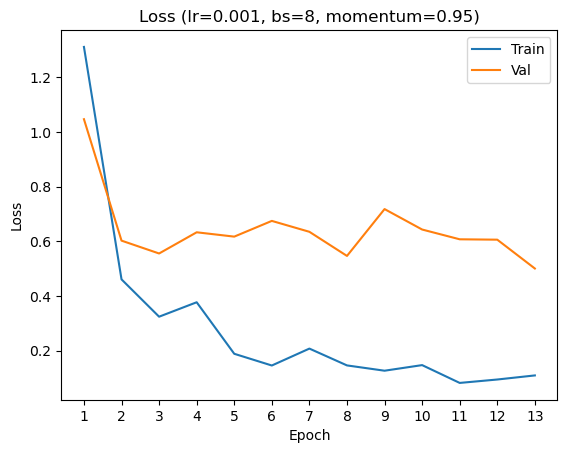

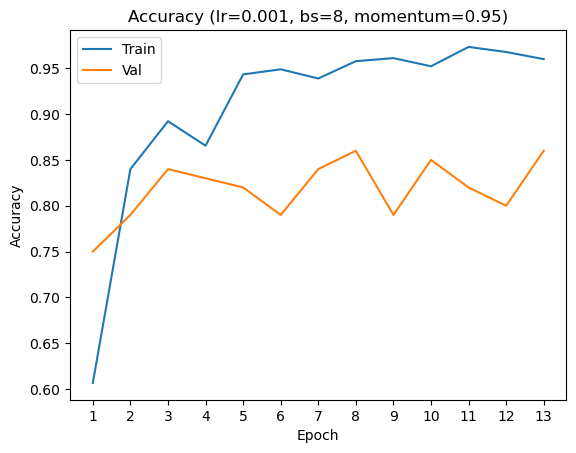

Testing: lr=0.001, bs=16, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 1: loss=1.758 acc=0.406



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.17it/s]


Validation 1: loss=1.178 acc=0.600
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 2: loss=0.903 acc=0.710



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.19it/s]


Validation 2: loss=0.845 acc=0.730
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 3: loss=0.660 acc=0.809



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.04it/s]


Validation 3: loss=0.700 acc=0.790
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 4: loss=0.547 acc=0.850



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.17it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 4: loss=0.614 acc=0.770
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 5: loss=0.446 acc=0.882



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.27it/s]


Validation 5: loss=0.622 acc=0.800
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 6: loss=0.431 acc=0.878



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.83it/s]


Validation 6: loss=0.527 acc=0.840
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 7: loss=0.374 acc=0.903



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.98it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 7: loss=0.542 acc=0.830
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 8: loss=0.310 acc=0.933



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.13it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 8: loss=0.573 acc=0.840
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 57/57 [00:30<00:00,  1.84it/s]

Training 9: loss=0.302 acc=0.932



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:01<00:00,  5.85it/s]


Validation 9: loss=0.528 acc=0.850
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 57/57 [00:32<00:00,  1.74it/s]

Training 10: loss=0.261 acc=0.940



Epoch 10 - validation phase: 100%|██████████| 7/7 [00:01<00:00,  6.02it/s]


Validation 10: loss=0.475 acc=0.860
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 11 - training phase: 100%|██████████| 57/57 [00:32<00:00,  1.73it/s]

Training 11: loss=0.296 acc=0.923



Epoch 11 - validation phase: 100%|██████████| 7/7 [00:01<00:00,  6.19it/s]


Validation 11: loss=0.458 acc=0.890
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 12 - training phase: 100%|██████████| 57/57 [00:32<00:00,  1.73it/s]

Training 12: loss=0.246 acc=0.938



Epoch 12 - validation phase: 100%|██████████| 7/7 [00:01<00:00,  5.95it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 12: loss=0.499 acc=0.840
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 13 - training phase: 100%|██████████| 57/57 [00:33<00:00,  1.72it/s]

Training 13: loss=0.249 acc=0.947



Epoch 13 - validation phase: 100%|██████████| 7/7 [00:01<00:00,  5.99it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 13: loss=0.468 acc=0.850
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 14 - training phase: 100%|██████████| 57/57 [00:33<00:00,  1.69it/s]

Training 14: loss=0.250 acc=0.944



Epoch 14 - validation phase: 100%|██████████| 7/7 [00:01<00:00,  6.14it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 14: loss=0.491 acc=0.870
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 15 - training phase: 100%|██████████| 57/57 [00:33<00:00,  1.73it/s]

Training 15: loss=0.206 acc=0.954



Epoch 15 - validation phase: 100%|██████████| 7/7 [00:01<00:00,  6.03it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 15: loss=0.480 acc=0.850
Testing: lr=0.001, bs=16, momentum=0.8


Epoch 16 - training phase: 100%|██████████| 57/57 [00:32<00:00,  1.75it/s]

Training 16: loss=0.235 acc=0.937



Epoch 16 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.89it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


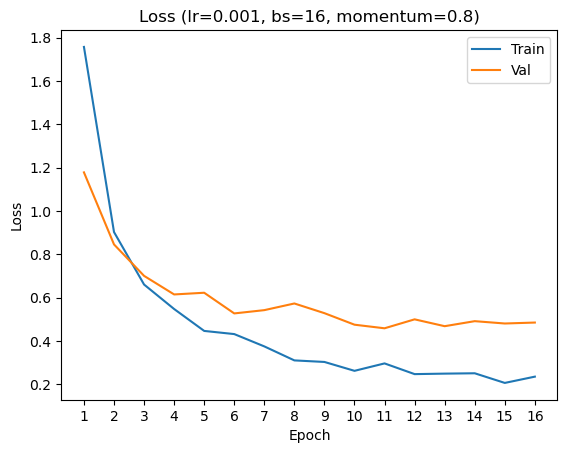

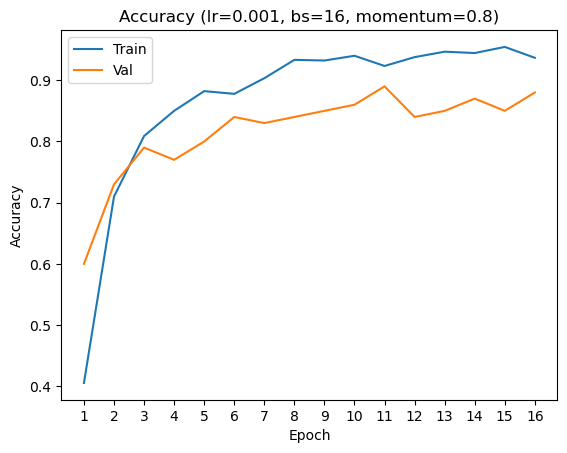

Testing: lr=0.001, bs=16, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 1: loss=1.471 acc=0.506



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.24it/s]


Validation 1: loss=0.987 acc=0.680
Testing: lr=0.001, bs=16, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 2: loss=0.686 acc=0.786



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.35it/s]


Validation 2: loss=0.635 acc=0.790
Testing: lr=0.001, bs=16, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 3: loss=0.494 acc=0.847



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.09it/s]


Validation 3: loss=0.623 acc=0.820
Testing: lr=0.001, bs=16, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 4: loss=0.339 acc=0.902



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.23it/s]


Validation 4: loss=0.560 acc=0.840
Testing: lr=0.001, bs=16, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 5: loss=0.340 acc=0.893



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.24it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 5: loss=0.543 acc=0.820
Testing: lr=0.001, bs=16, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 6: loss=0.286 acc=0.922



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.63it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 6: loss=0.578 acc=0.810
Testing: lr=0.001, bs=16, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 7: loss=0.222 acc=0.936



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.24it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 7: loss=0.535 acc=0.790
Testing: lr=0.001, bs=16, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 8: loss=0.234 acc=0.936



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.24it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 8: loss=0.478 acc=0.830
Testing: lr=0.001, bs=16, momentum=0.9


Epoch 9 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 9: loss=0.185 acc=0.960



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.25it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


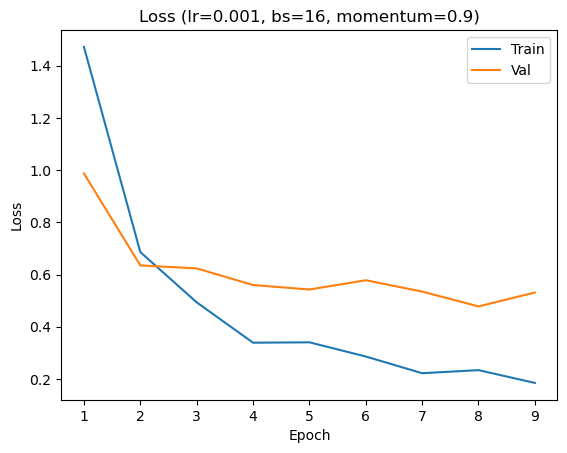

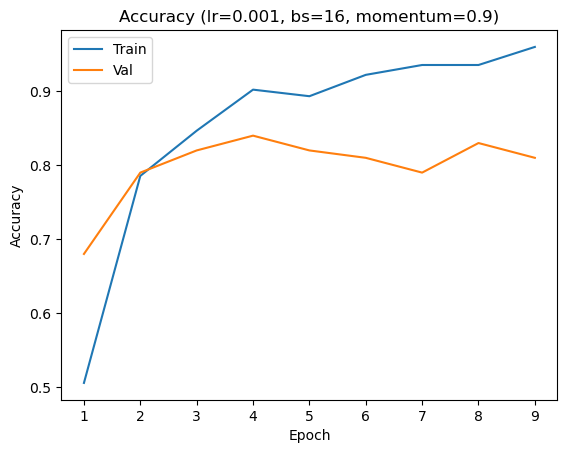

Testing: lr=0.001, bs=16, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 1: loss=1.371 acc=0.538



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.13it/s]


Validation 1: loss=0.834 acc=0.710
Testing: lr=0.001, bs=16, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 2: loss=0.545 acc=0.812



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.30it/s]


Validation 2: loss=0.641 acc=0.730
Testing: lr=0.001, bs=16, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 3: loss=0.382 acc=0.872



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.19it/s]


Validation 3: loss=0.474 acc=0.810
Testing: lr=0.001, bs=16, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 4: loss=0.259 acc=0.906



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.22it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 4: loss=0.544 acc=0.800
Testing: lr=0.001, bs=16, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 5: loss=0.247 acc=0.931



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.91it/s]


Validation 5: loss=0.426 acc=0.850
Testing: lr=0.001, bs=16, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 6: loss=0.226 acc=0.928



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.91it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 6: loss=0.542 acc=0.800
Testing: lr=0.001, bs=16, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 7: loss=0.166 acc=0.946



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.26it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 7: loss=0.642 acc=0.810
Testing: lr=0.001, bs=16, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 8: loss=0.153 acc=0.958



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.21it/s]


Validation 8: loss=0.431 acc=0.870
Testing: lr=0.001, bs=16, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 9: loss=0.171 acc=0.950



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.20it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 9: loss=0.440 acc=0.860
Testing: lr=0.001, bs=16, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 10: loss=0.143 acc=0.953



Epoch 10 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.82it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 10: loss=0.465 acc=0.870
Testing: lr=0.001, bs=16, momentum=0.95


Epoch 11 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 11: loss=0.150 acc=0.951



Epoch 11 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.24it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 11: loss=0.472 acc=0.860
Testing: lr=0.001, bs=16, momentum=0.95


Epoch 12 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 12: loss=0.119 acc=0.967



Epoch 12 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.19it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 12: loss=0.470 acc=0.860
Testing: lr=0.001, bs=16, momentum=0.95


Epoch 13 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 13: loss=0.095 acc=0.978



Epoch 13 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.23it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


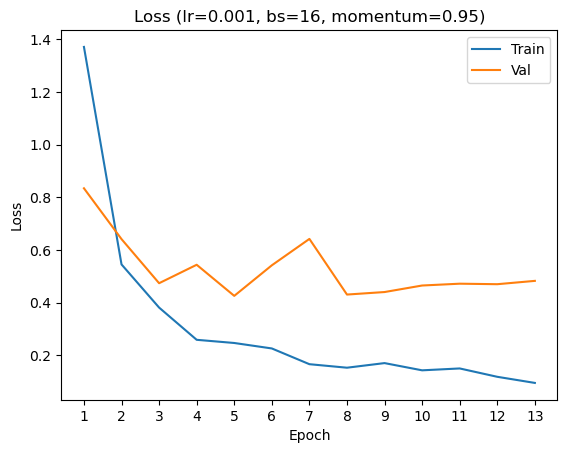

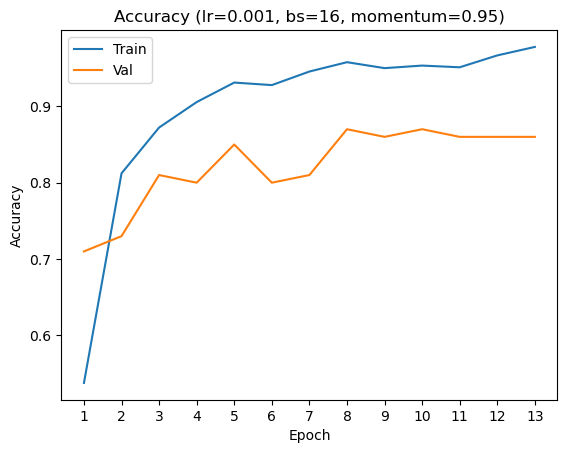

Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 1: loss=2.049 acc=0.293



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.95it/s]


Validation 1: loss=1.634 acc=0.450
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.10it/s]

Training 2: loss=1.342 acc=0.557



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.01it/s]


Validation 2: loss=1.248 acc=0.620
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.14it/s]

Training 3: loss=0.998 acc=0.684



Epoch 3 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.11it/s]


Validation 3: loss=1.043 acc=0.700
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 4: loss=0.880 acc=0.737



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.11it/s]


Validation 4: loss=0.901 acc=0.710
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.11it/s]

Training 5: loss=0.787 acc=0.771



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.13it/s]


Validation 5: loss=0.852 acc=0.740
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 6: loss=0.734 acc=0.782



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.96it/s]


Validation 6: loss=0.826 acc=0.750
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 7: loss=0.610 acc=0.833



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.98it/s]


Validation 7: loss=0.728 acc=0.790
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 8: loss=0.535 acc=0.860



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.49it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 8: loss=0.762 acc=0.780
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 9: loss=0.536 acc=0.847



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.03it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 9: loss=0.673 acc=0.780
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 10: loss=0.485 acc=0.864



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.99it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 10: loss=0.690 acc=0.770
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 11 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 11: loss=0.487 acc=0.878



Epoch 11 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.78it/s]


Validation 11: loss=0.638 acc=0.800
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 12 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 12: loss=0.430 acc=0.893



Epoch 12 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.96it/s]


Validation 12: loss=0.647 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 13 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 13: loss=0.398 acc=0.908



Epoch 13 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.92it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 13: loss=0.611 acc=0.790
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 14 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 14: loss=0.370 acc=0.913



Epoch 14 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.72it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 14: loss=0.589 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 15 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 15: loss=0.373 acc=0.908



Epoch 15 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.88it/s]


Validation 15: loss=0.538 acc=0.850
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 16 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 16: loss=0.368 acc=0.907



Epoch 16 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.91it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 16: loss=0.562 acc=0.820
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 17 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 17: loss=0.346 acc=0.912



Epoch 17 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 26.67it/s]


Validation 17: loss=0.549 acc=0.870
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 18 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 18: loss=0.357 acc=0.909



Epoch 18 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.94it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 18: loss=0.515 acc=0.840
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 19 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 19: loss=0.347 acc=0.917



Epoch 19 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.86it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 19: loss=0.537 acc=0.830
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 20 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 20: loss=0.321 acc=0.928



Epoch 20 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.76it/s]


Validation 20: loss=0.524 acc=0.880


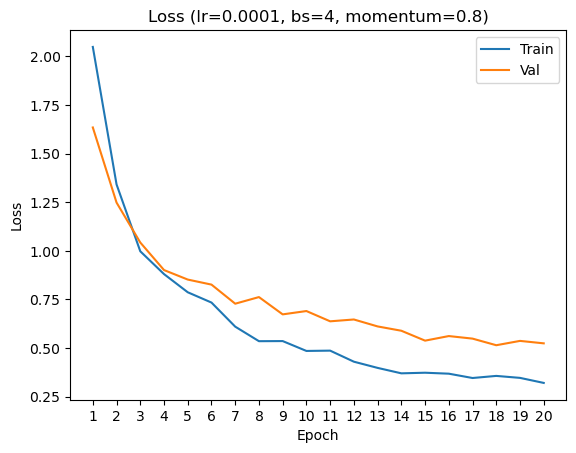

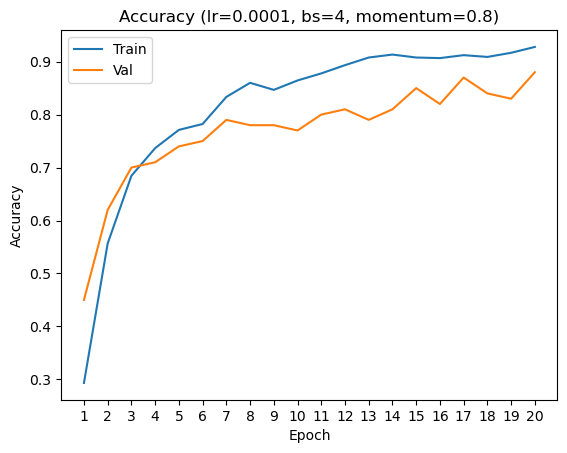

Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 1: loss=1.796 acc=0.409



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.94it/s]


Validation 1: loss=1.335 acc=0.530
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 2: loss=0.963 acc=0.698



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.65it/s]


Validation 2: loss=1.016 acc=0.620
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 3: loss=0.708 acc=0.782



Epoch 3 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.85it/s]


Validation 3: loss=0.813 acc=0.740
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 4: loss=0.621 acc=0.824



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.53it/s]


Validation 4: loss=0.732 acc=0.790
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 5: loss=0.562 acc=0.838



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.90it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 5: loss=0.704 acc=0.740
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 6: loss=0.476 acc=0.867



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.57it/s]


Validation 6: loss=0.654 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 7: loss=0.379 acc=0.912



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.71it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 7: loss=0.562 acc=0.780
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 8: loss=0.375 acc=0.912



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.91it/s]


Validation 8: loss=0.596 acc=0.830
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 9 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 9: loss=0.356 acc=0.903



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.66it/s]


Validation 9: loss=0.587 acc=0.840
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 10 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 10: loss=0.339 acc=0.921



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.63it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 10: loss=0.545 acc=0.830
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 11 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 11: loss=0.321 acc=0.913



Epoch 11 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.84it/s]


Validation 11: loss=0.532 acc=0.850
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 12 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 12: loss=0.318 acc=0.913



Epoch 12 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.81it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 12: loss=0.497 acc=0.840
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 13 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 13: loss=0.279 acc=0.931



Epoch 13 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.73it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 13: loss=0.463 acc=0.850
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 14 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 14: loss=0.264 acc=0.942



Epoch 14 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.78it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 14: loss=0.448 acc=0.840
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 15 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 15: loss=0.258 acc=0.944



Epoch 15 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.76it/s]


Validation 15: loss=0.456 acc=0.880
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 16 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 16: loss=0.258 acc=0.934



Epoch 16 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.61it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 16: loss=0.488 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 17 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 17: loss=0.237 acc=0.948



Epoch 17 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.85it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 17: loss=0.450 acc=0.820
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 18 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 18: loss=0.215 acc=0.950



Epoch 18 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.83it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 18: loss=0.473 acc=0.860
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 19 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 19: loss=0.237 acc=0.948



Epoch 19 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.80it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 19: loss=0.461 acc=0.860
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 20 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 20: loss=0.209 acc=0.958



Epoch 20 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.61it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


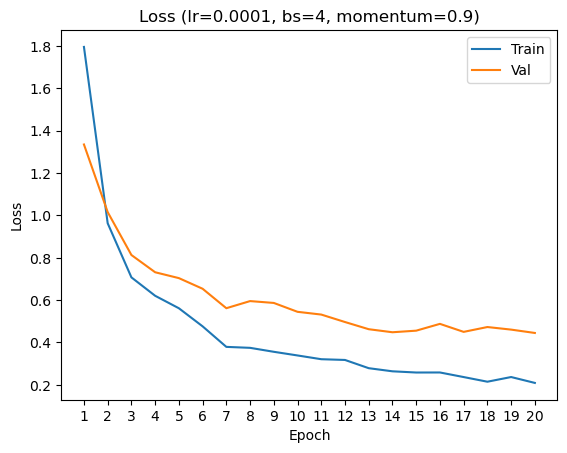

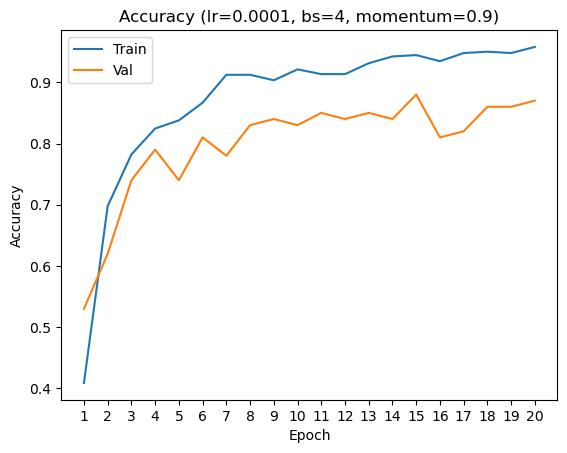

Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 1: loss=1.464 acc=0.544



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.86it/s]


Validation 1: loss=0.982 acc=0.670
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 2: loss=0.691 acc=0.790



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.96it/s]


Validation 2: loss=0.695 acc=0.780
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 3: loss=0.537 acc=0.833



Epoch 3 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.93it/s]


Validation 3: loss=0.667 acc=0.800
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 4: loss=0.408 acc=0.884



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.56it/s]


Validation 4: loss=0.595 acc=0.830
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 5: loss=0.373 acc=0.894



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.87it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 5: loss=0.549 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 6: loss=0.308 acc=0.912



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.91it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 6: loss=0.594 acc=0.830
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 7: loss=0.309 acc=0.918



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.82it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 7: loss=0.549 acc=0.820
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 8: loss=0.267 acc=0.922



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.83it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 8: loss=0.557 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 9: loss=0.244 acc=0.939



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.91it/s]


Validation 9: loss=0.503 acc=0.840
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 10: loss=0.230 acc=0.948



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.34it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 10: loss=0.501 acc=0.820
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 11 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 11: loss=0.216 acc=0.942



Epoch 11 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.78it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 11: loss=0.546 acc=0.790
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 12 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 12: loss=0.207 acc=0.947



Epoch 12 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.77it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 12: loss=0.528 acc=0.800
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 13 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 13: loss=0.170 acc=0.968



Epoch 13 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.73it/s]


Validation 13: loss=0.495 acc=0.860
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 14 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 14: loss=0.153 acc=0.970



Epoch 14 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.01it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 14: loss=0.471 acc=0.860
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 15 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 15: loss=0.162 acc=0.962



Epoch 15 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.74it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 15: loss=0.450 acc=0.830
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 16 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 16: loss=0.148 acc=0.972



Epoch 16 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.78it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 16: loss=0.463 acc=0.830
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 17 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.82it/s]

Training 17: loss=0.159 acc=0.966



Epoch 17 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.88it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 17: loss=0.536 acc=0.780
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 18 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 18: loss=0.134 acc=0.977



Epoch 18 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.01it/s]


Validation 18: loss=0.436 acc=0.870
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 19 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 19: loss=0.141 acc=0.969



Epoch 19 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.79it/s]


Validation 19: loss=0.454 acc=0.890
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 20 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 20: loss=0.129 acc=0.974



Epoch 20 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.92it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 20: loss=0.448 acc=0.870


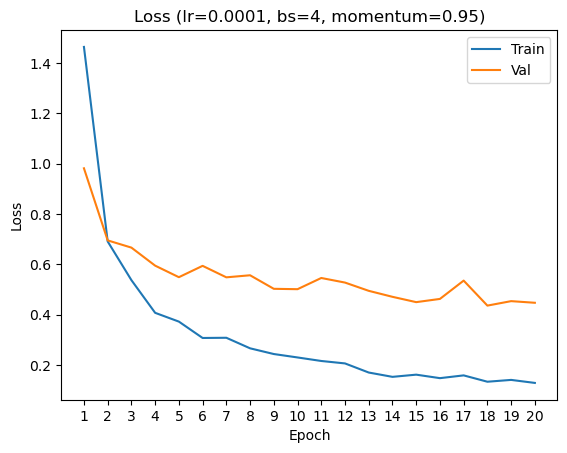

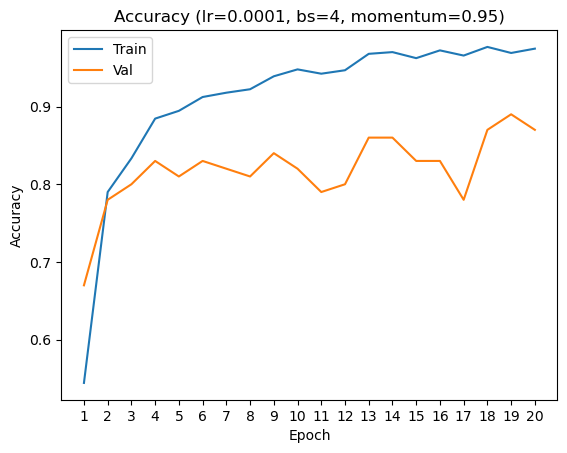

Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 1: loss=2.420 acc=0.190



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.36it/s]


Validation 1: loss=2.015 acc=0.300
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 2: loss=1.713 acc=0.412



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.42it/s]


Validation 2: loss=1.650 acc=0.450
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 3: loss=1.420 acc=0.550



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.47it/s]


Validation 3: loss=1.370 acc=0.580
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 4: loss=1.164 acc=0.650



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.37it/s]


Validation 4: loss=1.303 acc=0.600
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.38it/s]

Training 5: loss=1.097 acc=0.683



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.39it/s]


Validation 5: loss=1.179 acc=0.610
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 6: loss=0.944 acc=0.741



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.45it/s]


Validation 6: loss=1.074 acc=0.650
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 7: loss=0.908 acc=0.738



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.42it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 7: loss=1.069 acc=0.630
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 8: loss=0.852 acc=0.750



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.69it/s]


Validation 8: loss=0.979 acc=0.670
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 9: loss=0.798 acc=0.762



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.36it/s]


Validation 9: loss=0.921 acc=0.690
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 10: loss=0.727 acc=0.797



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.51it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 10: loss=0.948 acc=0.660
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 11 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 11: loss=0.675 acc=0.823



Epoch 11 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.33it/s]


Validation 11: loss=0.858 acc=0.730
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 12 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 12: loss=0.688 acc=0.799



Epoch 12 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.50it/s]


Validation 12: loss=0.822 acc=0.760
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 13 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 13: loss=0.630 acc=0.820



Epoch 13 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.33it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 13: loss=0.808 acc=0.730
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 14 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.43it/s]

Training 14: loss=0.617 acc=0.831



Epoch 14 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.38it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 14: loss=0.808 acc=0.760
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 15 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 15: loss=0.543 acc=0.841



Epoch 15 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.13it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 15: loss=0.787 acc=0.740
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 16 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 16: loss=0.572 acc=0.853



Epoch 16 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.23it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 16: loss=0.746 acc=0.750
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 17 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.46it/s]

Training 17: loss=0.541 acc=0.853



Epoch 17 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.40it/s]


Validation 17: loss=0.724 acc=0.780
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 18 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.46it/s]

Training 18: loss=0.481 acc=0.882



Epoch 18 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.61it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 18: loss=0.735 acc=0.750
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 19 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.46it/s]

Training 19: loss=0.509 acc=0.861



Epoch 19 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.52it/s]


Validation 19: loss=0.717 acc=0.810
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 20 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.43it/s]

Training 20: loss=0.448 acc=0.892



Epoch 20 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.33it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 20: loss=0.667 acc=0.750


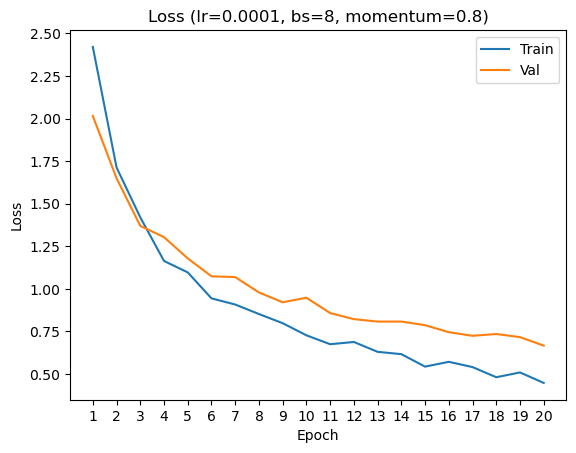

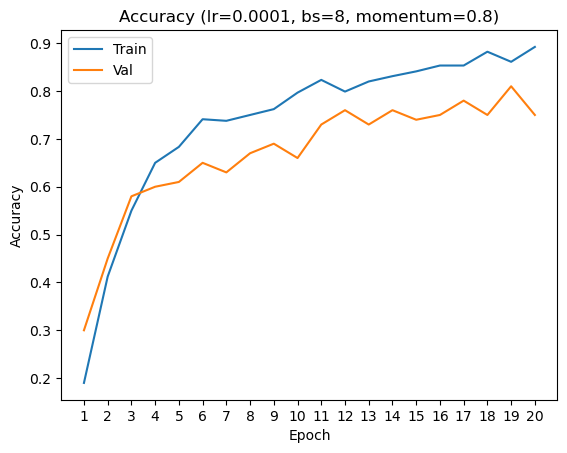

Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 1: loss=2.261 acc=0.254



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.43it/s]


Validation 1: loss=1.636 acc=0.490
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 2: loss=1.333 acc=0.579



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.37it/s]


Validation 2: loss=1.269 acc=0.600
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.43it/s]

Training 3: loss=1.034 acc=0.684



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.44it/s]


Validation 3: loss=1.029 acc=0.650
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 4: loss=0.807 acc=0.757



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.52it/s]


Validation 4: loss=0.946 acc=0.710
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 5: loss=0.740 acc=0.790



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.46it/s]


Validation 5: loss=0.879 acc=0.730
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 6: loss=0.638 acc=0.817



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.12it/s]


Validation 6: loss=0.741 acc=0.750
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.43it/s]

Training 7: loss=0.594 acc=0.832



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.44it/s]


Validation 7: loss=0.698 acc=0.800
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 8: loss=0.578 acc=0.851



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.45it/s]


Validation 8: loss=0.661 acc=0.830
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 9 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 9: loss=0.487 acc=0.879



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.53it/s]


Validation 9: loss=0.639 acc=0.840
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 10 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 10: loss=0.464 acc=0.887



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.44it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 10: loss=0.626 acc=0.810
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 11 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 11: loss=0.468 acc=0.894



Epoch 11 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.44it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 11: loss=0.624 acc=0.810
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 12 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 12: loss=0.425 acc=0.901



Epoch 12 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.28it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 12: loss=0.606 acc=0.810
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 13 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 13: loss=0.406 acc=0.906



Epoch 13 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.50it/s]


Validation 13: loss=0.567 acc=0.850
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 14 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.39it/s]

Training 14: loss=0.399 acc=0.902



Epoch 14 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.10it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 14: loss=0.619 acc=0.810
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 15 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 15: loss=0.370 acc=0.908



Epoch 15 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.05it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 15: loss=0.548 acc=0.830
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 16 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 16: loss=0.346 acc=0.918



Epoch 16 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.39it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 16: loss=0.567 acc=0.820
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 17 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 17: loss=0.348 acc=0.907



Epoch 17 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.30it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 17: loss=0.517 acc=0.820
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 18 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 18: loss=0.348 acc=0.919



Epoch 18 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.55it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


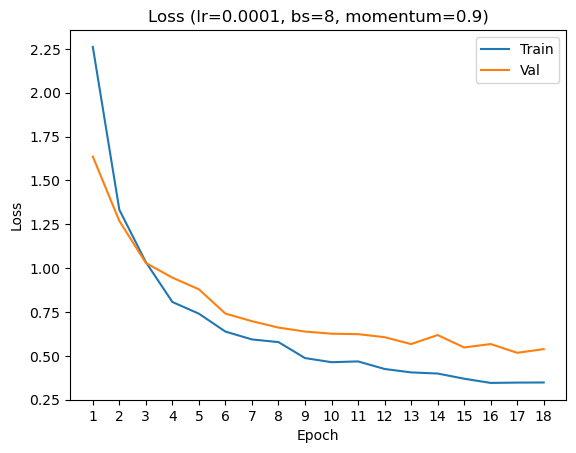

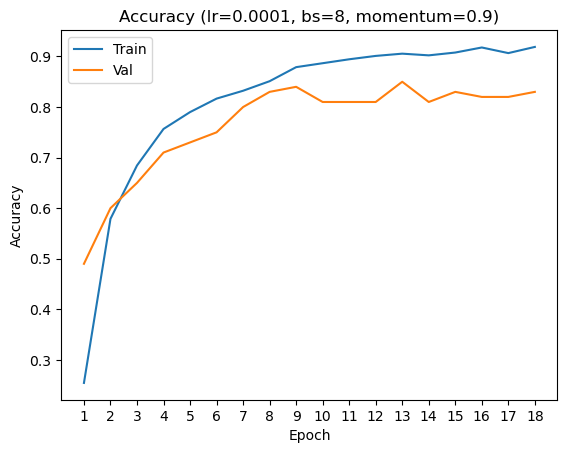

Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.39it/s]

Training 1: loss=1.931 acc=0.359



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.54it/s]


Validation 1: loss=1.257 acc=0.550
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 2: loss=0.967 acc=0.681



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.09it/s]


Validation 2: loss=0.929 acc=0.670
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 3: loss=0.726 acc=0.792



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.44it/s]


Validation 3: loss=0.775 acc=0.750
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.45it/s]

Training 4: loss=0.589 acc=0.827



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.46it/s]


Validation 4: loss=0.686 acc=0.770
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.47it/s]

Training 5: loss=0.552 acc=0.838



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.59it/s]


Validation 5: loss=0.692 acc=0.780
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.45it/s]

Training 6: loss=0.448 acc=0.883



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.48it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 6: loss=0.651 acc=0.760
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 7: loss=0.405 acc=0.891



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.53it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 7: loss=0.588 acc=0.780
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.46it/s]

Training 8: loss=0.398 acc=0.898



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.51it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 8: loss=0.652 acc=0.760
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.43it/s]

Training 9: loss=0.353 acc=0.911



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.33it/s]


Validation 9: loss=0.521 acc=0.870
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 10: loss=0.341 acc=0.913



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.59it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 10: loss=0.533 acc=0.840
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 11 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 11: loss=0.305 acc=0.924



Epoch 11 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.49it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 11: loss=0.509 acc=0.860
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 12 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 12: loss=0.300 acc=0.923



Epoch 12 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.27it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 12: loss=0.512 acc=0.810
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 13 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 13: loss=0.269 acc=0.934



Epoch 13 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.52it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 13: loss=0.527 acc=0.840
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 14 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 14: loss=0.262 acc=0.936



Epoch 14 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.51it/s]

Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


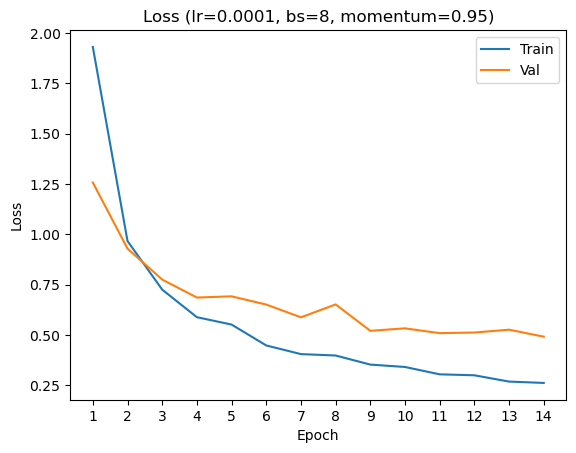

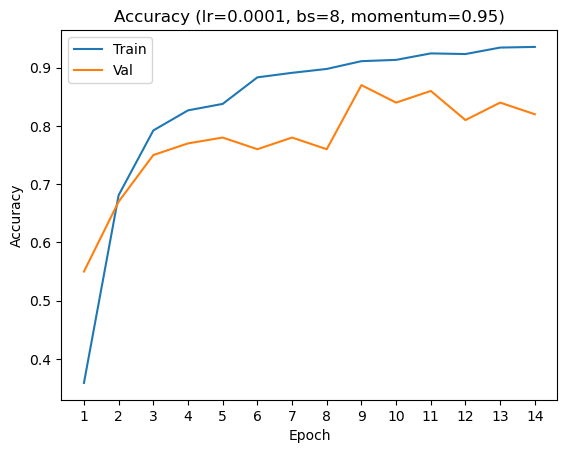

Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 1: loss=2.423 acc=0.176



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.99it/s]


Validation 1: loss=2.392 acc=0.150
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 2: loss=2.055 acc=0.274



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.27it/s]


Validation 2: loss=2.034 acc=0.250
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 3: loss=1.746 acc=0.416



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.17it/s]


Validation 3: loss=1.829 acc=0.330
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 4: loss=1.562 acc=0.466



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.96it/s]


Validation 4: loss=1.617 acc=0.400
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 5: loss=1.413 acc=0.554



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.99it/s]


Validation 5: loss=1.493 acc=0.440
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 6: loss=1.282 acc=0.594



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.09it/s]


Validation 6: loss=1.385 acc=0.520
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 7: loss=1.188 acc=0.621



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.11it/s]


Validation 7: loss=1.292 acc=0.590
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 8: loss=1.076 acc=0.684



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.17it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 8: loss=1.223 acc=0.590
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 9: loss=1.050 acc=0.669



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.20it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 9: loss=1.208 acc=0.580
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 10: loss=1.021 acc=0.694



Epoch 10 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.17it/s]


Validation 10: loss=1.101 acc=0.610
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 11 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 11: loss=0.997 acc=0.683



Epoch 11 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]


Validation 11: loss=1.054 acc=0.670
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 12 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 12: loss=0.874 acc=0.744



Epoch 12 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.19it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 12: loss=1.097 acc=0.660
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 13 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 13: loss=0.879 acc=0.747



Epoch 13 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.97it/s]


Validation 13: loss=1.001 acc=0.690
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 14 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 14: loss=0.840 acc=0.760



Epoch 14 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.05it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 14: loss=0.991 acc=0.670
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 15 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 15: loss=0.837 acc=0.759



Epoch 15 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.19it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 15: loss=0.968 acc=0.650
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 16 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 16: loss=0.775 acc=0.779



Epoch 16 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.17it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 16: loss=0.944 acc=0.680
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 17 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 17: loss=0.714 acc=0.814



Epoch 17 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.20it/s]


Validation 17: loss=0.906 acc=0.710
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 18 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 18: loss=0.733 acc=0.787



Epoch 18 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.03it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 18: loss=0.895 acc=0.690
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 19 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.20it/s]

Training 19: loss=0.711 acc=0.820



Epoch 19 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.65it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 19: loss=0.886 acc=0.700
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 20 - training phase: 100%|██████████| 57/57 [00:26<00:00,  2.17it/s]

Training 20: loss=0.717 acc=0.807



Epoch 20 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.20it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 20: loss=0.874 acc=0.700


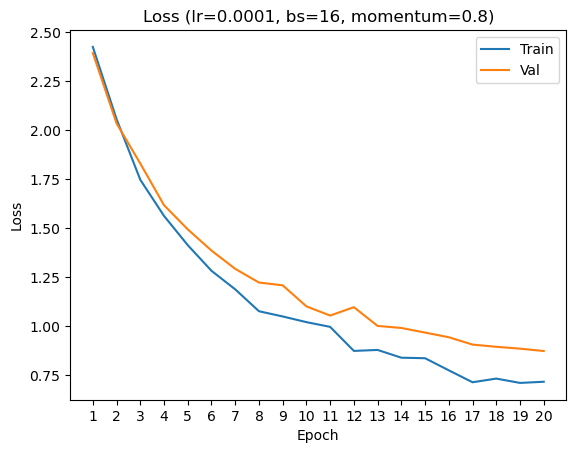

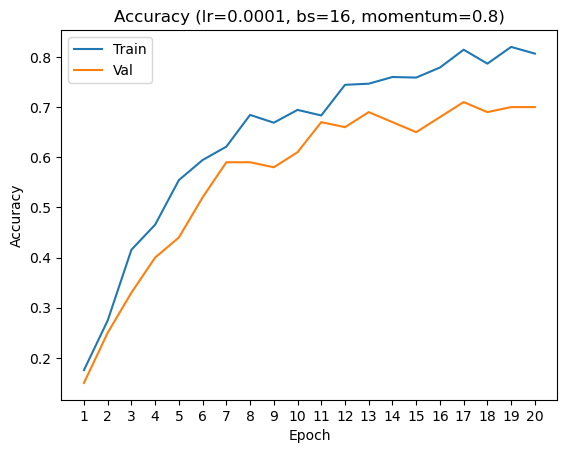

Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 1: loss=2.585 acc=0.183



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.13it/s]


Validation 1: loss=2.183 acc=0.230
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 2: loss=1.824 acc=0.368



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.20it/s]


Validation 2: loss=1.675 acc=0.450
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 3: loss=1.455 acc=0.512



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]


Validation 3: loss=1.481 acc=0.540
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 4: loss=1.230 acc=0.608



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.22it/s]


Validation 4: loss=1.323 acc=0.560
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 5: loss=1.105 acc=0.678



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.12it/s]


Validation 5: loss=1.132 acc=0.670
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 6: loss=0.933 acc=0.720



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]


Validation 6: loss=1.134 acc=0.700
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 7: loss=0.887 acc=0.741



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:01<00:00,  6.85it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 7: loss=1.015 acc=0.690
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 8: loss=0.819 acc=0.769



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.90it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 8: loss=0.953 acc=0.700
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 9 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 9: loss=0.763 acc=0.779



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.17it/s]


Validation 9: loss=0.926 acc=0.720
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 10 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 10: loss=0.686 acc=0.809



Epoch 10 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.14it/s]


Validation 10: loss=0.862 acc=0.740
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 11 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 11: loss=0.714 acc=0.808



Epoch 11 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.02it/s]


Validation 11: loss=0.817 acc=0.750
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 12 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.30it/s]

Training 12: loss=0.648 acc=0.829



Epoch 12 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 12: loss=0.851 acc=0.710
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 13 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 13: loss=0.628 acc=0.818



Epoch 13 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.22it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 13: loss=0.782 acc=0.740
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 14 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 14: loss=0.562 acc=0.856



Epoch 14 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.80it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 14: loss=0.734 acc=0.740
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 15 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 15: loss=0.580 acc=0.842



Epoch 15 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.07it/s]


Validation 15: loss=0.763 acc=0.760
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 16 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 16: loss=0.557 acc=0.849



Epoch 16 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.24it/s]


Validation 16: loss=0.737 acc=0.770
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 17 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 17: loss=0.560 acc=0.849



Epoch 17 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.15it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 17: loss=0.711 acc=0.770
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 18 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 18: loss=0.484 acc=0.887



Epoch 18 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.95it/s]


Validation 18: loss=0.725 acc=0.780
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 19 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 19: loss=0.456 acc=0.889



Epoch 19 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.98it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 19: loss=0.724 acc=0.760
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 20 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 20: loss=0.475 acc=0.881



Epoch 20 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.16it/s]


Validation 20: loss=0.676 acc=0.790


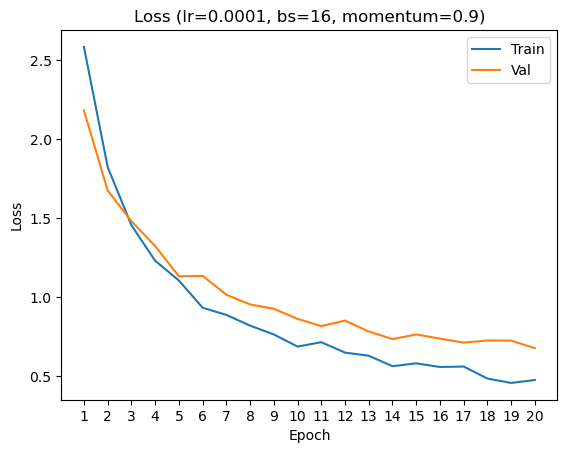

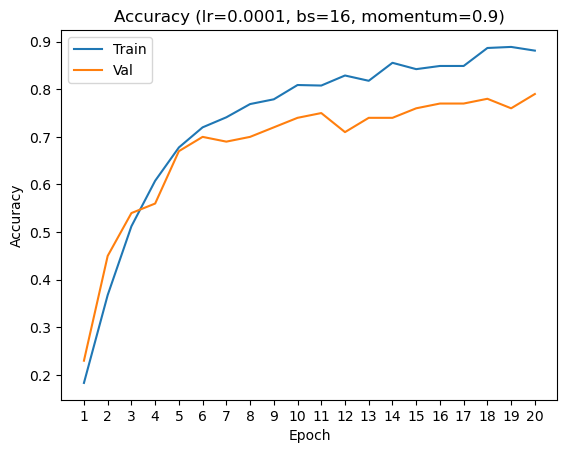

Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 1: loss=2.364 acc=0.206



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.22it/s]


Validation 1: loss=1.608 acc=0.460
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 2: loss=1.367 acc=0.553



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.16it/s]


Validation 2: loss=1.107 acc=0.660
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 3: loss=1.017 acc=0.693



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.22it/s]


Validation 3: loss=0.963 acc=0.680
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 4: loss=0.795 acc=0.749



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.21it/s]


Validation 4: loss=0.883 acc=0.720
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 5: loss=0.695 acc=0.794



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.26it/s]


Validation 5: loss=0.783 acc=0.780
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 6: loss=0.660 acc=0.811



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.14it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 6: loss=0.761 acc=0.780
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 7: loss=0.593 acc=0.834



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.19it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 7: loss=0.739 acc=0.740
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 8: loss=0.559 acc=0.849



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.24it/s]


Validation 8: loss=0.686 acc=0.800
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 9: loss=0.470 acc=0.872



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.22it/s]


Validation 9: loss=0.654 acc=0.820
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 10: loss=0.493 acc=0.861



Epoch 10 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.19it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 10: loss=0.651 acc=0.810
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 11 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 11: loss=0.433 acc=0.889



Epoch 11 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.87it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 11: loss=0.672 acc=0.770
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 12 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 12: loss=0.417 acc=0.897



Epoch 12 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.21it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 12: loss=0.626 acc=0.820
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 13 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 13: loss=0.406 acc=0.899



Epoch 13 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.30it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 13: loss=0.599 acc=0.800
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 14 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 14: loss=0.412 acc=0.896



Epoch 14 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.24it/s]


Validation 14: loss=0.571 acc=0.830
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 15 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 15: loss=0.370 acc=0.916



Epoch 15 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.20it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 15: loss=0.570 acc=0.810
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 16 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 16: loss=0.357 acc=0.926



Epoch 16 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.12it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 16: loss=0.586 acc=0.810
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 17 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 17: loss=0.336 acc=0.924



Epoch 17 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.08it/s]


Validation 17: loss=0.494 acc=0.880
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 18 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 18: loss=0.315 acc=0.931



Epoch 18 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.00it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 18: loss=0.548 acc=0.820
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 19 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 19: loss=0.310 acc=0.931



Epoch 19 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.16it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 19: loss=0.586 acc=0.820
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 20 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 20: loss=0.333 acc=0.923



Epoch 20 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.99it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 20: loss=0.557 acc=0.860


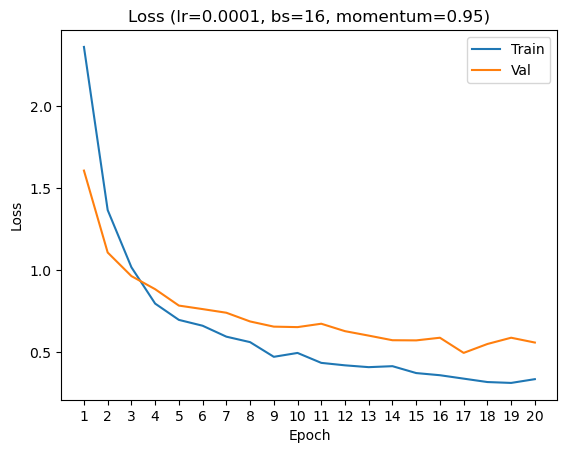

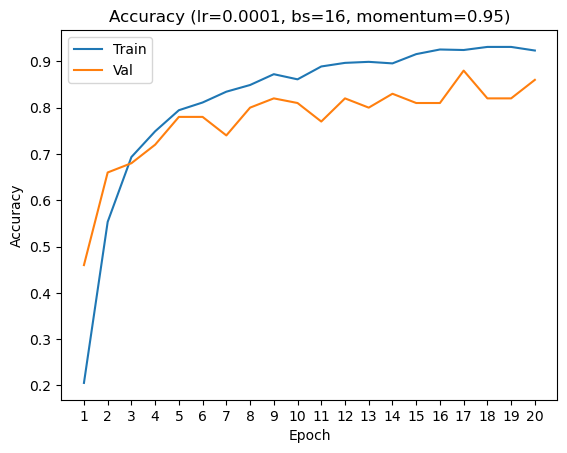

Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 1: loss=2.747 acc=0.141



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.11it/s]


Validation 1: loss=2.545 acc=0.160
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 2: loss=2.372 acc=0.196



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.00it/s]


Validation 2: loss=2.317 acc=0.220
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 3: loss=2.231 acc=0.220



Epoch 3 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.97it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 3: loss=2.154 acc=0.210
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 4: loss=2.065 acc=0.294



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.05it/s]


Validation 4: loss=2.055 acc=0.250
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 5: loss=1.980 acc=0.334



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.05it/s]


Validation 5: loss=1.893 acc=0.350
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 6: loss=1.784 acc=0.381



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.04it/s]


Validation 6: loss=1.828 acc=0.410
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 7: loss=1.750 acc=0.412



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.75it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 7: loss=1.828 acc=0.340
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 8: loss=1.625 acc=0.464



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.96it/s]


Validation 8: loss=1.622 acc=0.450
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 9: loss=1.545 acc=0.489



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.97it/s]


Validation 9: loss=1.596 acc=0.460
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.10it/s]

Training 10: loss=1.538 acc=0.484



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.40it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 10: loss=1.544 acc=0.450
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 11 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 11: loss=1.510 acc=0.511



Epoch 11 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.83it/s]


Validation 11: loss=1.500 acc=0.480
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 12 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 12: loss=1.377 acc=0.543



Epoch 12 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.91it/s]


Validation 12: loss=1.445 acc=0.550
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 13 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 13: loss=1.316 acc=0.560



Epoch 13 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.28it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 13: loss=1.414 acc=0.470
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 14 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.10it/s]

Training 14: loss=1.347 acc=0.567



Epoch 14 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.00it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 14: loss=1.330 acc=0.540
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 15 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.10it/s]

Training 15: loss=1.294 acc=0.580



Epoch 15 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.94it/s]


Validation 15: loss=1.331 acc=0.560
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 16 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.11it/s]

Training 16: loss=1.234 acc=0.591



Epoch 16 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.73it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 16: loss=1.342 acc=0.560
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 17 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 17: loss=1.208 acc=0.609



Epoch 17 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.97it/s]


Validation 17: loss=1.293 acc=0.570
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 18 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 18: loss=1.164 acc=0.647



Epoch 18 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.11it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 18: loss=1.207 acc=0.570
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 19 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 19: loss=1.105 acc=0.639



Epoch 19 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.41it/s]


Validation 19: loss=1.206 acc=0.620
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 20 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.11it/s]

Training 20: loss=1.106 acc=0.658



Epoch 20 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.03it/s]

Validation accuracy didn't improve. Patience counter: 1/5
Validation 20: loss=1.218 acc=0.570


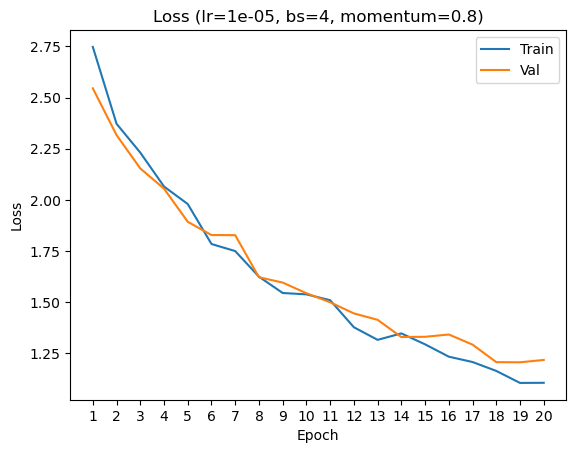

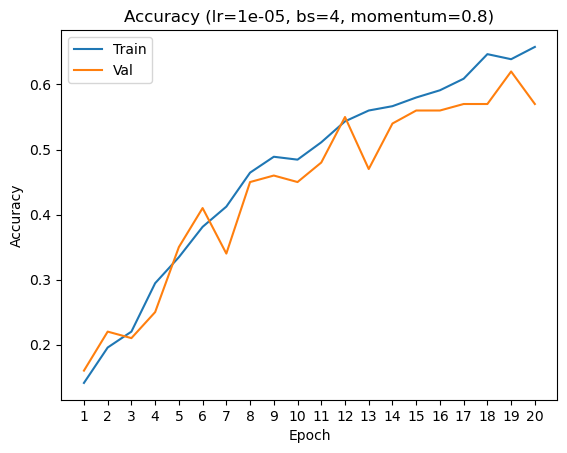

Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 1: loss=2.679 acc=0.141



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.06it/s]


Validation 1: loss=2.292 acc=0.180
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 2: loss=2.125 acc=0.257



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.92it/s]


Validation 2: loss=2.036 acc=0.280
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 3: loss=1.939 acc=0.332



Epoch 3 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.06it/s]


Validation 3: loss=1.763 acc=0.340
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 4: loss=1.651 acc=0.440



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.95it/s]


Validation 4: loss=1.674 acc=0.460
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.92it/s]

Training 5: loss=1.572 acc=0.464



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 26.91it/s]


Validation 5: loss=1.521 acc=0.500
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.93it/s]

Training 6: loss=1.354 acc=0.572



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.09it/s]


Validation 6: loss=1.444 acc=0.540
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 7: loss=1.327 acc=0.570



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.97it/s]


Validation 7: loss=1.290 acc=0.600
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 8: loss=1.210 acc=0.629



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.92it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 8: loss=1.303 acc=0.590
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 9 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 9: loss=1.243 acc=0.604



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.07it/s]


Validation 9: loss=1.174 acc=0.650
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 10 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.10it/s]

Training 10: loss=1.144 acc=0.637



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.83it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 10: loss=1.172 acc=0.620
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 11 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 11: loss=1.075 acc=0.667



Epoch 11 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.80it/s]


Validation 11: loss=1.108 acc=0.680
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 12 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 12: loss=1.042 acc=0.686



Epoch 12 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.73it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 12: loss=1.074 acc=0.670
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 13 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 13: loss=1.023 acc=0.688



Epoch 13 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.95it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 13: loss=1.005 acc=0.680
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 14 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 14: loss=0.966 acc=0.716



Epoch 14 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.05it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 14: loss=1.014 acc=0.670
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 15 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 15: loss=0.913 acc=0.737



Epoch 15 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.66it/s]


Validation 15: loss=0.980 acc=0.690
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 16 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.10it/s]

Training 16: loss=0.851 acc=0.761



Epoch 16 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.03it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 16: loss=0.915 acc=0.670
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 17 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 17: loss=0.859 acc=0.750



Epoch 17 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.75it/s]


Validation 17: loss=0.956 acc=0.700
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 18 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 18: loss=0.830 acc=0.760



Epoch 18 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.62it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 18: loss=0.883 acc=0.690
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 19 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.11it/s]

Training 19: loss=0.793 acc=0.780



Epoch 19 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.92it/s]


Validation 19: loss=0.906 acc=0.710
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 20 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 20: loss=0.771 acc=0.784



Epoch 20 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.93it/s]


Validation 20: loss=0.844 acc=0.750


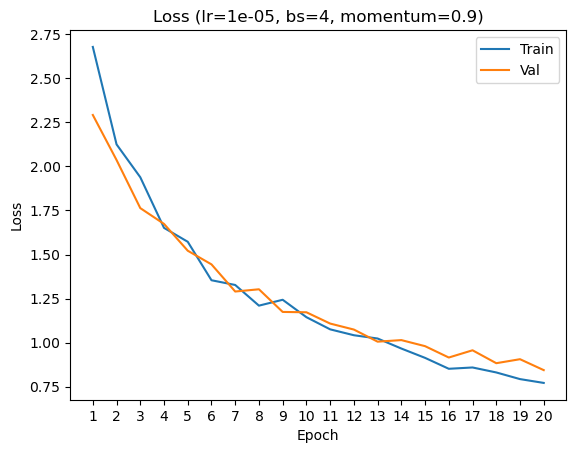

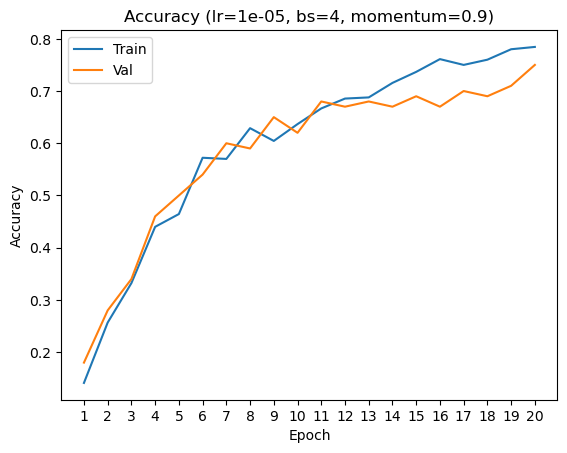

Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.11it/s]

Training 1: loss=2.624 acc=0.136



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.60it/s]


Validation 1: loss=2.233 acc=0.280
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 2: loss=1.918 acc=0.342



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.97it/s]


Validation 2: loss=1.922 acc=0.350
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 3: loss=1.574 acc=0.476



Epoch 3 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.09it/s]


Validation 3: loss=1.560 acc=0.470
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 4: loss=1.330 acc=0.564



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.13it/s]


Validation 4: loss=1.438 acc=0.580
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 5: loss=1.140 acc=0.634



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.92it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 5: loss=1.310 acc=0.570
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.11it/s]

Training 6: loss=1.028 acc=0.688



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.60it/s]


Validation 6: loss=1.271 acc=0.590
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 7: loss=1.004 acc=0.689



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.11it/s]


Validation 7: loss=1.189 acc=0.610
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 8: loss=0.935 acc=0.713



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.26it/s]


Validation 8: loss=1.104 acc=0.650
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.10it/s]

Training 9: loss=0.836 acc=0.749



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.58it/s]


Validation 9: loss=1.098 acc=0.680
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.11it/s]

Training 10: loss=0.848 acc=0.756



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.80it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 10: loss=0.993 acc=0.660
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 11 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 11: loss=0.764 acc=0.778



Epoch 11 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.21it/s]


Validation 11: loss=0.917 acc=0.720
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 12 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 12: loss=0.717 acc=0.800



Epoch 12 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.05it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 12: loss=0.986 acc=0.680
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 13 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 13: loss=0.631 acc=0.836



Epoch 13 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 28.16it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 13: loss=0.942 acc=0.700
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 14 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 14: loss=0.687 acc=0.807



Epoch 14 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.98it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 14: loss=0.882 acc=0.700
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 15 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 15: loss=0.604 acc=0.839



Epoch 15 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.95it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 15: loss=0.846 acc=0.720
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 16 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 16: loss=0.593 acc=0.849



Epoch 16 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.59it/s]

Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


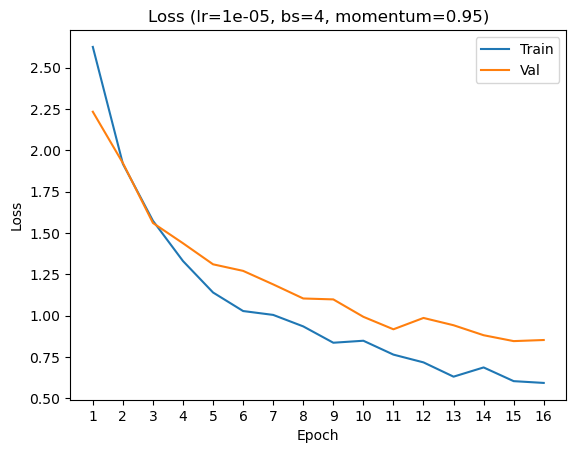

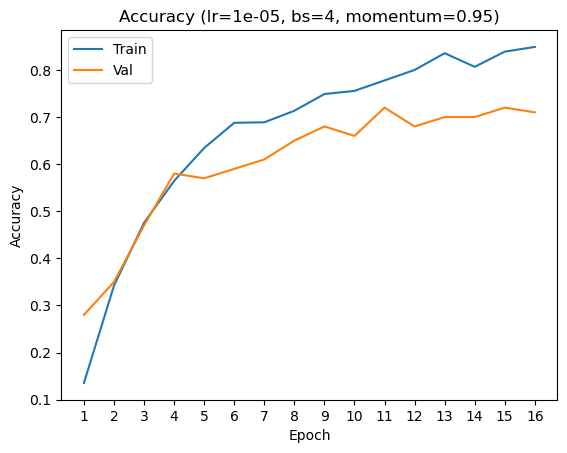

Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 1: loss=3.018 acc=0.050



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.53it/s]


Validation 1: loss=2.831 acc=0.090
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 2: loss=2.751 acc=0.083



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.45it/s]


Validation 2: loss=2.688 acc=0.100
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 3: loss=2.576 acc=0.106



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.31it/s]


Validation 3: loss=2.580 acc=0.150
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 4: loss=2.416 acc=0.167



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.12it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 4: loss=2.555 acc=0.150
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 5: loss=2.330 acc=0.191



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.47it/s]


Validation 5: loss=2.381 acc=0.210
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 6: loss=2.303 acc=0.203



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.34it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 6: loss=2.355 acc=0.200
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 7: loss=2.214 acc=0.228



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.45it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 7: loss=2.295 acc=0.210
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 8: loss=2.131 acc=0.270



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.84it/s]


Validation 8: loss=2.256 acc=0.240
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.38it/s]

Training 9: loss=2.064 acc=0.282



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.50it/s]


Validation 9: loss=2.073 acc=0.270
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 10: loss=2.005 acc=0.332



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.45it/s]


Validation 10: loss=2.054 acc=0.320
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 11 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 11: loss=1.921 acc=0.352



Epoch 11 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.25it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 11: loss=1.997 acc=0.320
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 12 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 12: loss=1.862 acc=0.386



Epoch 12 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.05it/s]


Validation 12: loss=1.937 acc=0.340
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 13 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 13: loss=1.840 acc=0.396



Epoch 13 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.57it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 13: loss=1.909 acc=0.300
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 14 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.39it/s]

Training 14: loss=1.752 acc=0.412



Epoch 14 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.19it/s]


Validation 14: loss=1.848 acc=0.390
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 15 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 15: loss=1.759 acc=0.402



Epoch 15 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.58it/s]


Validation 15: loss=1.852 acc=0.400
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 16 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 16: loss=1.773 acc=0.434



Epoch 16 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.37it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 16: loss=1.785 acc=0.400
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 17 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 17: loss=1.616 acc=0.474



Epoch 17 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.47it/s]


Validation 17: loss=1.692 acc=0.470
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 18 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 18: loss=1.643 acc=0.462



Epoch 18 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.62it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 18: loss=1.706 acc=0.440
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 19 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 19: loss=1.582 acc=0.484



Epoch 19 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.09it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 19: loss=1.683 acc=0.440
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 20 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.26it/s]

Training 20: loss=1.525 acc=0.526



Epoch 20 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.51it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 20: loss=1.595 acc=0.460


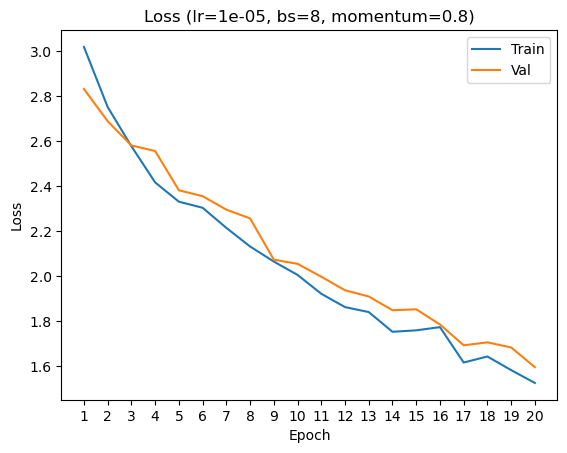

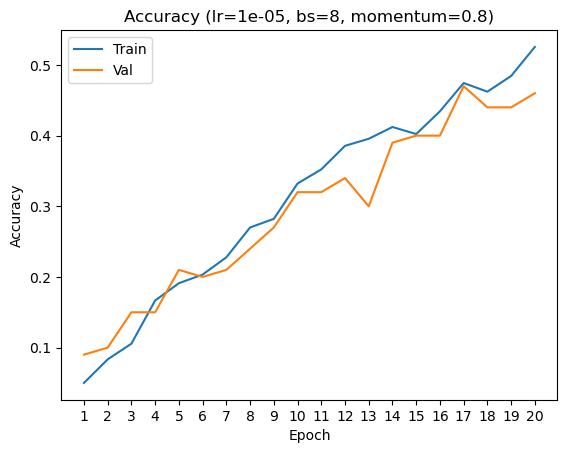

Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 1: loss=2.582 acc=0.130



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.39it/s]


Validation 1: loss=2.290 acc=0.230
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.39it/s]

Training 2: loss=2.238 acc=0.212



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.48it/s]


Validation 2: loss=2.100 acc=0.260
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 3: loss=2.095 acc=0.247



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.48it/s]


Validation 3: loss=1.974 acc=0.350
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.39it/s]

Training 4: loss=1.905 acc=0.317



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.04it/s]


Validation 4: loss=1.813 acc=0.380
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 5: loss=1.827 acc=0.393



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.32it/s]


Validation 5: loss=1.712 acc=0.460
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 6: loss=1.692 acc=0.431



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.33it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 6: loss=1.648 acc=0.430
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 7: loss=1.593 acc=0.482



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.66it/s]


Validation 7: loss=1.592 acc=0.480
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 8: loss=1.516 acc=0.493



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.21it/s]


Validation 8: loss=1.566 acc=0.510
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 9 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.39it/s]

Training 9: loss=1.509 acc=0.496



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.31it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 9: loss=1.504 acc=0.480
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 10 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 10: loss=1.475 acc=0.533



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.42it/s]


Validation 10: loss=1.443 acc=0.530
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 11 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.38it/s]

Training 11: loss=1.391 acc=0.566



Epoch 11 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.39it/s]


Validation 11: loss=1.392 acc=0.550
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 12 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 12: loss=1.335 acc=0.559



Epoch 12 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.42it/s]


Validation 12: loss=1.280 acc=0.640
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 13 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.38it/s]

Training 13: loss=1.364 acc=0.567



Epoch 13 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.38it/s]


Validation 13: loss=1.271 acc=0.670
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 14 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 14: loss=1.283 acc=0.621



Epoch 14 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.93it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 14: loss=1.326 acc=0.570
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 15 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.29it/s]

Training 15: loss=1.251 acc=0.609



Epoch 15 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.46it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 15: loss=1.262 acc=0.620
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 16 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.43it/s]

Training 16: loss=1.181 acc=0.639



Epoch 16 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.42it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 16: loss=1.244 acc=0.620
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 17 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 17: loss=1.182 acc=0.626



Epoch 17 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.46it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 17: loss=1.210 acc=0.610
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 18 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 18: loss=1.080 acc=0.654



Epoch 18 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.43it/s]


Validation 18: loss=1.135 acc=0.700
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 19 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 19: loss=1.069 acc=0.660



Epoch 19 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.34it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 19: loss=1.163 acc=0.670
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 20 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 20: loss=1.085 acc=0.666



Epoch 20 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.57it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 20: loss=1.135 acc=0.630


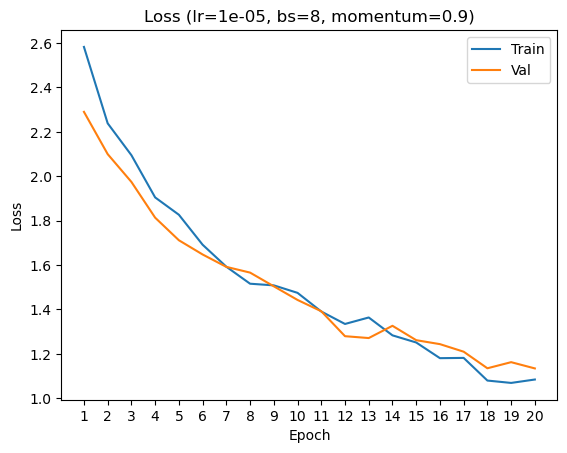

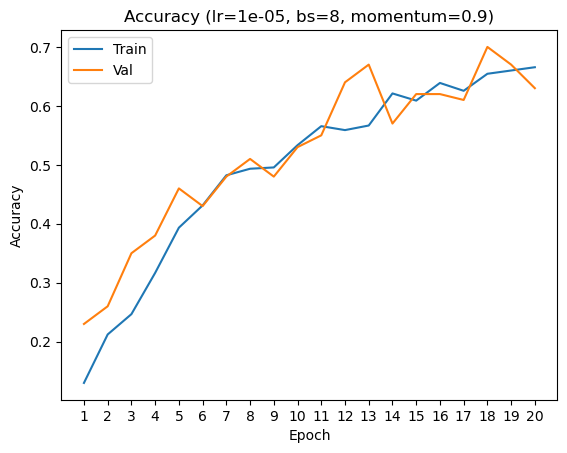

Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 1: loss=2.875 acc=0.112



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.38it/s]


Validation 1: loss=2.549 acc=0.150
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 2: loss=2.378 acc=0.184



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.45it/s]


Validation 2: loss=2.201 acc=0.220
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 3: loss=2.053 acc=0.292



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.15it/s]


Validation 3: loss=1.934 acc=0.300
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 4: loss=1.786 acc=0.381



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.36it/s]


Validation 4: loss=1.655 acc=0.390
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.43it/s]

Training 5: loss=1.651 acc=0.449



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.53it/s]


Validation 5: loss=1.599 acc=0.420
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 6: loss=1.495 acc=0.502



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.70it/s]


Validation 6: loss=1.467 acc=0.450
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.43it/s]

Training 7: loss=1.369 acc=0.581



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.52it/s]


Validation 7: loss=1.404 acc=0.520
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.45it/s]

Training 8: loss=1.280 acc=0.629



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.64it/s]


Validation 8: loss=1.292 acc=0.600
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.43it/s]

Training 9: loss=1.190 acc=0.639



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.56it/s]


Validation 9: loss=1.274 acc=0.610
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 10: loss=1.212 acc=0.609



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.46it/s]


Validation 10: loss=1.200 acc=0.620
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 11 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 11: loss=1.108 acc=0.664



Epoch 11 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.42it/s]


Validation 11: loss=1.160 acc=0.640
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 12 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 12: loss=1.089 acc=0.652



Epoch 12 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.49it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 12: loss=1.124 acc=0.630
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 13 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.44it/s]

Training 13: loss=1.015 acc=0.699



Epoch 13 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.29it/s]


Validation 13: loss=1.087 acc=0.700
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 14 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.43it/s]

Training 14: loss=0.979 acc=0.696



Epoch 14 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.06it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 14: loss=1.006 acc=0.690
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 15 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.39it/s]

Training 15: loss=0.969 acc=0.694



Epoch 15 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.47it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 15: loss=1.049 acc=0.650
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 16 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.42it/s]

Training 16: loss=0.946 acc=0.710



Epoch 16 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.52it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 16: loss=1.022 acc=0.650
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 17 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.41it/s]

Training 17: loss=0.810 acc=0.777



Epoch 17 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.21it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 17: loss=1.004 acc=0.690
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 18 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.40it/s]

Training 18: loss=0.871 acc=0.744



Epoch 18 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.43it/s]

Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


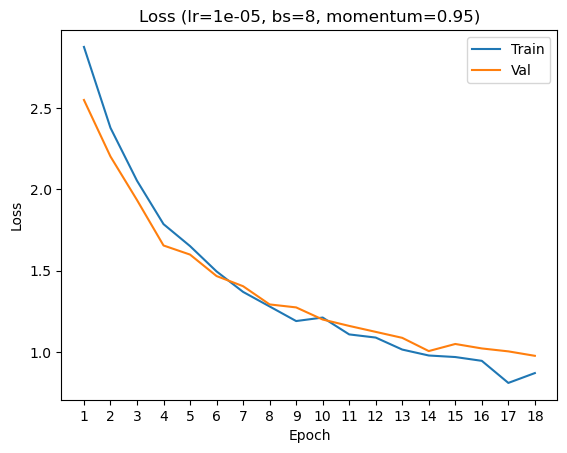

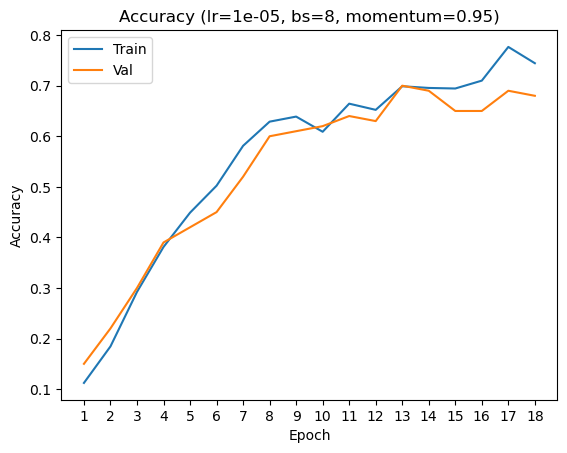

Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 1: loss=3.029 acc=0.086



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.16it/s]


Validation 1: loss=2.927 acc=0.130
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 2: loss=2.944 acc=0.097



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.14it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 2: loss=2.756 acc=0.120
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 3: loss=2.751 acc=0.102



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.97it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 3: loss=2.638 acc=0.100
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.30it/s]

Training 4: loss=2.668 acc=0.111



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.01it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 4: loss=2.600 acc=0.110
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 5: loss=2.553 acc=0.120



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.76it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 5: loss=2.497 acc=0.120
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 57/57 [00:26<00:00,  2.19it/s]

Training 6: loss=2.542 acc=0.134



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.23it/s]


Validation 6: loss=2.462 acc=0.140
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.30it/s]

Training 7: loss=2.429 acc=0.144



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.15it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 7: loss=2.346 acc=0.140
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 8: loss=2.378 acc=0.167



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.14it/s]


Validation 8: loss=2.335 acc=0.170
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 9: loss=2.377 acc=0.147



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.15it/s]


Validation 9: loss=2.315 acc=0.180
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 10: loss=2.284 acc=0.190



Epoch 10 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.99it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 10: loss=2.297 acc=0.160
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 11 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 11: loss=2.268 acc=0.207



Epoch 11 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.03it/s]


Validation 11: loss=2.183 acc=0.210
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 12 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 12: loss=2.233 acc=0.210



Epoch 12 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.14it/s]


Validation 12: loss=2.158 acc=0.250
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 13 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 13: loss=2.169 acc=0.226



Epoch 13 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.93it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 13: loss=2.143 acc=0.240
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 14 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 14: loss=2.158 acc=0.234



Epoch 14 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.22it/s]


Validation 14: loss=2.122 acc=0.290
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 15 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 15: loss=2.084 acc=0.248



Epoch 15 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.16it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 15: loss=2.059 acc=0.250
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 16 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 16: loss=2.058 acc=0.287



Epoch 16 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.98it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 16: loss=1.995 acc=0.250
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 17 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.30it/s]

Training 17: loss=2.003 acc=0.292



Epoch 17 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.21it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 17: loss=2.001 acc=0.280
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 18 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 18: loss=1.994 acc=0.298



Epoch 18 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.25it/s]


Validation 18: loss=1.943 acc=0.330
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 19 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 19: loss=1.970 acc=0.301



Epoch 19 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.04it/s]


Validation 19: loss=1.919 acc=0.350
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 20 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 20: loss=1.952 acc=0.329



Epoch 20 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 20: loss=1.932 acc=0.350


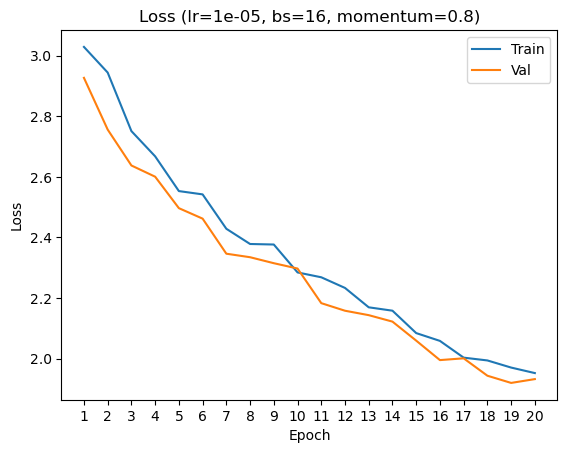

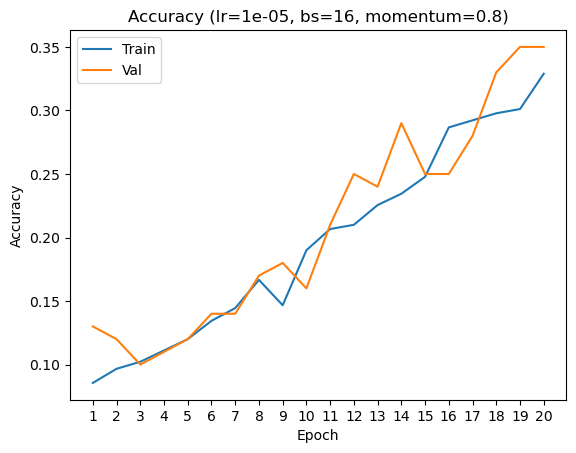

Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 1: loss=2.889 acc=0.104



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.16it/s]


Validation 1: loss=2.572 acc=0.150
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.30it/s]

Training 2: loss=2.677 acc=0.129



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.16it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 2: loss=2.507 acc=0.140
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 3: loss=2.581 acc=0.131



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.15it/s]


Validation 3: loss=2.368 acc=0.210
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.30it/s]

Training 4: loss=2.450 acc=0.164



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.17it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 4: loss=2.259 acc=0.210
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 5: loss=2.349 acc=0.208



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.12it/s]


Validation 5: loss=2.228 acc=0.240
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 6: loss=2.286 acc=0.199



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.14it/s]


Validation 6: loss=2.086 acc=0.320
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 7: loss=2.207 acc=0.224



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 7: loss=2.075 acc=0.270
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 8: loss=2.074 acc=0.281



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.99it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 8: loss=1.981 acc=0.310
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 9 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 9: loss=2.032 acc=0.288



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.16it/s]


Validation 9: loss=1.880 acc=0.370
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 10 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 10: loss=2.024 acc=0.323



Epoch 10 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.14it/s]


Validation 10: loss=1.841 acc=0.430
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 11 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 11: loss=1.984 acc=0.317



Epoch 11 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.19it/s]


Validation 11: loss=1.766 acc=0.440
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 12 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 12: loss=1.888 acc=0.358



Epoch 12 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.13it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 12: loss=1.757 acc=0.430
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 13 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.30it/s]

Training 13: loss=1.805 acc=0.383



Epoch 13 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.02it/s]


Validation 13: loss=1.670 acc=0.470
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 14 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 14: loss=1.727 acc=0.436



Epoch 14 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.02it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 14: loss=1.642 acc=0.460
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 15 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 15: loss=1.686 acc=0.411



Epoch 15 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.22it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 15: loss=1.647 acc=0.460
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 16 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 16: loss=1.667 acc=0.441



Epoch 16 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]


Validation 16: loss=1.597 acc=0.520
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 17 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 17: loss=1.598 acc=0.464



Epoch 17 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.79it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 17: loss=1.540 acc=0.500
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 18 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 18: loss=1.593 acc=0.481



Epoch 18 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.08it/s]


Validation 18: loss=1.490 acc=0.570
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 19 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.30it/s]

Training 19: loss=1.578 acc=0.470



Epoch 19 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.14it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 19: loss=1.384 acc=0.570
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 20 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 20: loss=1.501 acc=0.498



Epoch 20 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.17it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 20: loss=1.480 acc=0.530


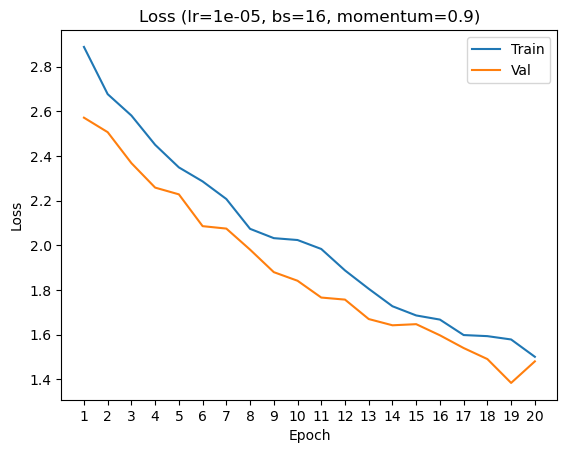

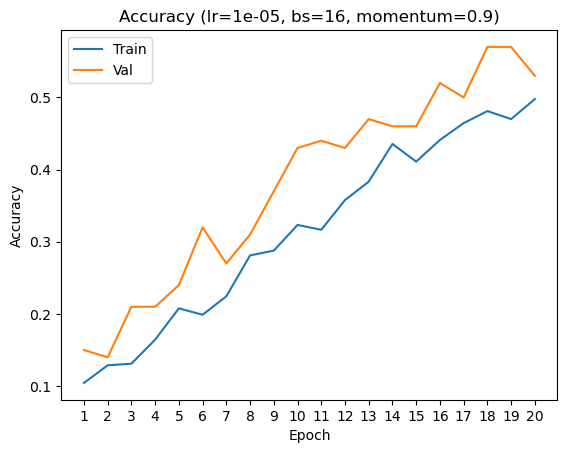

Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 1: loss=2.747 acc=0.087



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.19it/s]


Validation 1: loss=2.497 acc=0.160
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 2: loss=2.496 acc=0.144



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.14it/s]


Validation 2: loss=2.342 acc=0.170
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 3: loss=2.333 acc=0.169



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.09it/s]


Validation 3: loss=2.196 acc=0.240
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 4: loss=2.178 acc=0.231



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.12it/s]


Validation 4: loss=2.006 acc=0.320
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.30it/s]

Training 5: loss=2.063 acc=0.296



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.15it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 5: loss=1.967 acc=0.270
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 6: loss=1.850 acc=0.344



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.75it/s]


Validation 6: loss=1.824 acc=0.400
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 7: loss=1.833 acc=0.373



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.15it/s]


Validation 7: loss=1.747 acc=0.430
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 8: loss=1.674 acc=0.451



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.12it/s]


Validation 8: loss=1.662 acc=0.460
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 9: loss=1.653 acc=0.443



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]


Validation 9: loss=1.594 acc=0.520
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 10: loss=1.589 acc=0.482



Epoch 10 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 10: loss=1.585 acc=0.490
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 11 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 11: loss=1.512 acc=0.521



Epoch 11 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.05it/s]


Validation 11: loss=1.516 acc=0.540
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 12 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 12: loss=1.473 acc=0.516



Epoch 12 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.17it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 12: loss=1.490 acc=0.540
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 13 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 13: loss=1.433 acc=0.539



Epoch 13 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.05it/s]


Validation 13: loss=1.411 acc=0.600
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 14 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 14: loss=1.375 acc=0.572



Epoch 14 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.73it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 14: loss=1.377 acc=0.540
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 15 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 15: loss=1.298 acc=0.580



Epoch 15 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.95it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 15: loss=1.384 acc=0.560
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 16 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 16: loss=1.254 acc=0.616



Epoch 16 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.20it/s]


Validation 16: loss=1.302 acc=0.630
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 17 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 17: loss=1.279 acc=0.582



Epoch 17 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.99it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 17: loss=1.275 acc=0.610
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 18 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 18: loss=1.182 acc=0.639



Epoch 18 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.83it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 18: loss=1.233 acc=0.620
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 19 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.29it/s]

Training 19: loss=1.165 acc=0.642



Epoch 19 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 19: loss=1.254 acc=0.620
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 20 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 20: loss=1.133 acc=0.661



Epoch 20 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.22it/s]


Validation 20: loss=1.212 acc=0.670


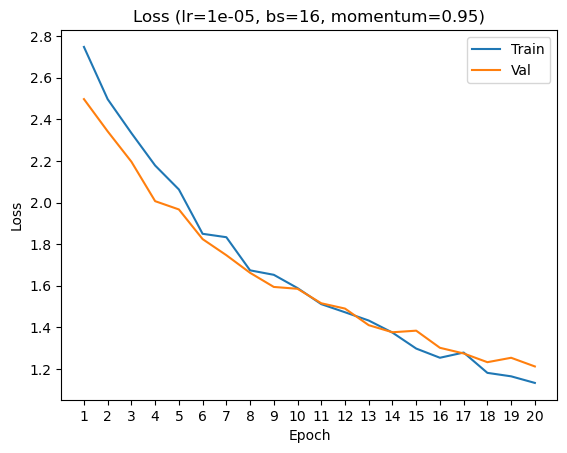

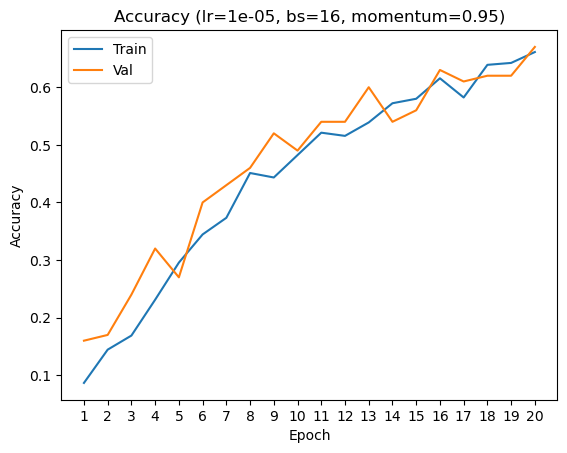

In [11]:
learning_rate = [1e-3, 1e-4, 1e-5]
batch_sizes = [4, 8, 16]
momentums = [0.8, 0.9, 0.95]
total_epochs = 20
best_acc = 0

for lr in learning_rate:
    for batch_size in batch_sizes:
        for momentum in momentums:
            
            total_train_loss, total_val_loss = [], []
            total_train_acc, total_val_acc = [], []

            dino_model = Classifier()
            dino_model = dino_model.to(device)
            criterion = nn.CrossEntropyLoss()
            # Initialise the SGD optimizer.
            optimizer = optim.SGD(dino_model.parameters(), lr=lr, momentum=momentum)
            # Put the model in "train" mode
            dino_model.train()

            best_val_acc = 0
            patience = 5  # Number of epochs to wait before stopping
            patience_counter = 0
            
            for epoch in range(total_epochs):    
                train_loss = []
                correct = 0
                total = 0
                
                balanced_trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler = sampler)
                valloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers = 1)
                
                print(f"Testing: lr={lr}, bs={batch_size}, momentum={momentum}")
        

                
                
                for i, data in  tqdm.tqdm(enumerate(balanced_trainloader, 0), total = len(balanced_trainloader), desc = f'Epoch {epoch+1} - training phase'):
                    inputs, labels = data
            
                    # inputs = train_transform(inputs)
                    
                    inputs = inputs.to(device)
                    labels = labels.to(device)
            
                    optimizer.zero_grad()
            
                    features = dino(inputs)
                    outputs = dino_model(features)
                    
                    loss = criterion(outputs, labels)
                    
                    loss.backward()
                    
                    optimizer.step()
            
                    train_loss += [loss.cpu().item()]
                    
                    predicted = torch.argmax(outputs, axis = 1)
                    
                    correct += torch.sum(predicted == labels).cpu().item()
                    total += len(labels)
                    
            
                mean_train_loss = np.mean(train_loss)
                train_accuracy = correct/total
                print(f"Training {epoch+1}: loss={mean_train_loss:.3f} acc={train_accuracy:.3f}")
            
                total_train_loss += [mean_train_loss]
                total_train_acc += [train_accuracy]
                
                # Put the model in "eval" mode
                dino_model.eval()    
            
                # Validation loop: For all batches in the validation dataset
                with torch.no_grad(): # not build the computation graph for backpropagation, and thus, no gradients will be computed or stored for the tensors involved in those operations.
                    val_loss, val_correct, val_total = 0.0, 0.0, 0.0
                    for i, data in  tqdm.tqdm(enumerate(valloader, 0), total = len(valloader), desc = f'Epoch {epoch+1} - validation phase'):
                        inputs, labels = data
                        
                        inputs = inputs.to(device)
                        labels = labels.to(device)
                
                        features = dino(inputs)
                        outputs = dino_model(features)
                        predicted = torch.argmax(outputs, axis = 1)
                        
                        loss = criterion(outputs, labels)
                        val_loss += loss.cpu().item() * inputs.size(0)
                
                        val_correct += torch.sum(predicted == labels).cpu().item()
                        val_total += inputs.size(0)
                
                    mean_val_loss = val_loss / val_total
                    val_accuracy = val_correct / val_total
                    
                    total_val_loss.append(mean_val_loss)
                    total_val_acc.append(val_accuracy)
                    
                    if val_accuracy > best_val_acc:
                        best_val_acc = val_accuracy
                        patience_counter = 0
                    else:
                        patience_counter += 1
                        print(f"Validation accuracy didn't improve. Patience counter: {patience_counter}/{patience}")
                        
                        if patience_counter >= patience:
                            print("Early stopping triggered.")
                            break  # Breaks out of training loop

                    print(f"Validation {epoch+1}: loss={mean_val_loss:.3f} acc={val_accuracy:.3f}")
                
                    if val_accuracy > best_acc:
                        torch.save(dino_model.state_dict(), "dino_linear_classifier_best.pth")
                        best_acc = val_accuracy
                        with open("best_model_info.txt", "w") as f:
                            f.write(f"Best val accuracy: {val_accuracy:.4f}\n")
                            f.write(f"Epoch: {epoch+1}\n")
                            f.write(f"Learning rate: {lr}\n")
                            f.write(f"Batch size: {batch_size}\n")
                            f.write(f"Momentum: {momentum}\n")
            
            epoch_loss = range(1, len(total_train_loss) + 1)
            plt.plot(epoch_loss, total_train_loss, label = 'Train')
            plt.plot(epoch_loss, total_val_loss, label = 'Val')
            plt.xticks(epoch_loss)
            plt.legend()
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title(f'Loss (lr={lr}, bs={batch_size}, momentum={momentum})')
            plt.show()
            
            epoch_acc = range(1, len(total_train_acc) + 1)
            plt.plot(epoch_acc, total_train_acc, label = 'Train')
            plt.plot(epoch_acc, total_val_acc, label = 'Val')
            plt.xticks(epoch_acc)
            plt.legend()
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.title(f'Accuracy (lr={lr}, bs={batch_size}, momentum={momentum})')
            plt.show()

### 2.2 plot the loss

Show the loss vs epoch for the training and validation, follow the layout of the figure provided in the brief

Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.11it/s]

Training 1: loss=2.006 acc=0.310



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.41it/s]


Validation 1: loss=1.431 acc=0.540
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 2: loss=1.309 acc=0.567



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.32it/s]


Validation 2: loss=1.054 acc=0.690
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 3: loss=0.991 acc=0.681



Epoch 3 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.93it/s]


Validation 3: loss=0.892 acc=0.730
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.12it/s]

Training 4: loss=0.842 acc=0.761



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.37it/s]


Validation 4: loss=0.859 acc=0.740
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 5: loss=0.731 acc=0.778



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.50it/s]


Validation 5: loss=0.792 acc=0.780
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 6: loss=0.680 acc=0.791



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.60it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 6: loss=0.771 acc=0.770
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 7: loss=0.600 acc=0.834



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.64it/s]


Validation 7: loss=0.777 acc=0.790
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 8: loss=0.569 acc=0.848



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.20it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 8: loss=0.703 acc=0.750
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 9: loss=0.520 acc=0.870



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.42it/s]


Validation 9: loss=0.640 acc=0.800
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 10: loss=0.522 acc=0.860



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.36it/s]


Validation 10: loss=0.672 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 11 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.94it/s]

Training 11: loss=0.477 acc=0.874



Epoch 11 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.53it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 11: loss=0.667 acc=0.790
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 12 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 12: loss=0.456 acc=0.874



Epoch 12 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.49it/s]


Validation 12: loss=0.615 acc=0.820
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 13 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.90it/s]

Training 13: loss=0.396 acc=0.909



Epoch 13 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.30it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 13: loss=0.604 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 14 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 14: loss=0.395 acc=0.917



Epoch 14 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.30it/s]


Validation 14: loss=0.634 acc=0.830
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 15 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 15: loss=0.377 acc=0.909



Epoch 15 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.51it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 15: loss=0.586 acc=0.820
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 16 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 16: loss=0.324 acc=0.936



Epoch 16 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.20it/s]


Validation 16: loss=0.561 acc=0.840
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 17 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.98it/s]

Training 17: loss=0.325 acc=0.934



Epoch 17 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.37it/s]


Validation 17: loss=0.553 acc=0.850
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 18 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.99it/s]

Training 18: loss=0.342 acc=0.916



Epoch 18 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.44it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 18: loss=0.584 acc=0.850
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 19 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.98it/s]

Training 19: loss=0.342 acc=0.927



Epoch 19 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.41it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 19: loss=0.574 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 20 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.02it/s]

Training 20: loss=0.331 acc=0.921



Epoch 20 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.47it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 20: loss=0.589 acc=0.820
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 21 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.96it/s]

Training 21: loss=0.342 acc=0.900



Epoch 21 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.33it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 21: loss=0.585 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.8


Epoch 22 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.02it/s]

Training 22: loss=0.277 acc=0.937



Epoch 22 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.45it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


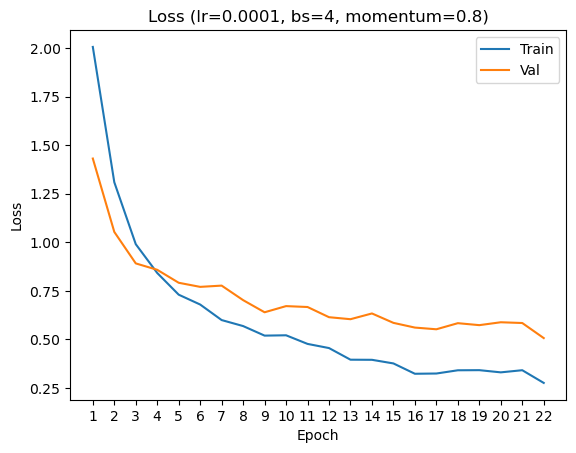

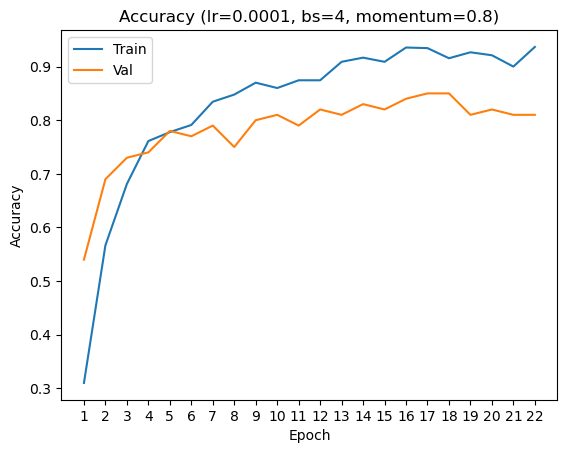

Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.96it/s]

Training 1: loss=1.774 acc=0.414



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.65it/s]


Validation 1: loss=1.192 acc=0.600
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.02it/s]

Training 2: loss=1.024 acc=0.672



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.53it/s]


Validation 2: loss=0.922 acc=0.700
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.02it/s]

Training 3: loss=0.733 acc=0.797



Epoch 3 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.26it/s]


Validation 3: loss=0.738 acc=0.770
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 4: loss=0.621 acc=0.827



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.66it/s]


Validation 4: loss=0.663 acc=0.790
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 5: loss=0.510 acc=0.851



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.52it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 5: loss=0.614 acc=0.790
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 6: loss=0.459 acc=0.869



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.55it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 6: loss=0.625 acc=0.790
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.88it/s]

Training 7: loss=0.432 acc=0.888



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 26.20it/s]


Validation 7: loss=0.577 acc=0.800
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 225/225 [00:39<00:00,  5.72it/s]

Training 8: loss=0.365 acc=0.920



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.93it/s]


Validation 8: loss=0.608 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 9 - training phase: 100%|██████████| 225/225 [00:51<00:00,  4.39it/s]

Training 9: loss=0.375 acc=0.891



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.61it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 9: loss=0.562 acc=0.800
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 10 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.95it/s]

Training 10: loss=0.303 acc=0.943



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 26.23it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 10: loss=0.591 acc=0.800
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 11 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.92it/s]

Training 11: loss=0.313 acc=0.916



Epoch 11 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.87it/s]


Validation 11: loss=0.559 acc=0.840
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 12 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.94it/s]

Training 12: loss=0.295 acc=0.924



Epoch 12 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.91it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 12: loss=0.598 acc=0.800
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 13 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.94it/s]

Training 13: loss=0.312 acc=0.916



Epoch 13 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.92it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 13: loss=0.611 acc=0.770
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 14 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.94it/s]

Training 14: loss=0.266 acc=0.941



Epoch 14 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.95it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 14: loss=0.531 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 15 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.94it/s]

Training 15: loss=0.263 acc=0.934



Epoch 15 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.94it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 15: loss=0.534 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.9


Epoch 16 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.94it/s]

Training 16: loss=0.231 acc=0.941



Epoch 16 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.91it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


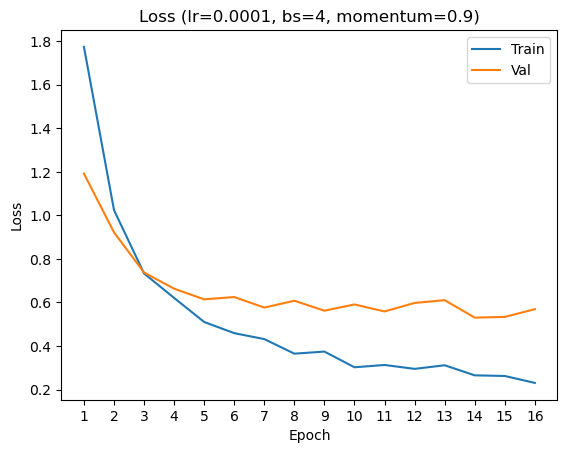

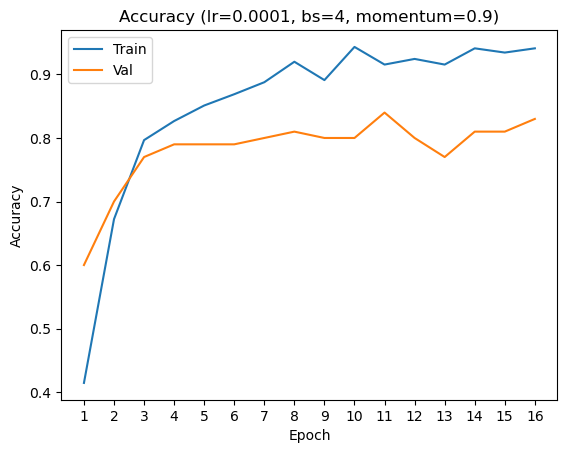

Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.93it/s]

Training 1: loss=1.540 acc=0.479



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.93it/s]


Validation 1: loss=0.855 acc=0.690
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.93it/s]

Training 2: loss=0.708 acc=0.771



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.87it/s]


Validation 2: loss=0.596 acc=0.830
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.92it/s]

Training 3: loss=0.568 acc=0.820



Epoch 3 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.88it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 3: loss=0.663 acc=0.730
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.92it/s]

Training 4: loss=0.427 acc=0.873



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.84it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 4: loss=0.607 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.93it/s]

Training 5: loss=0.329 acc=0.911



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.97it/s]


Validation 5: loss=0.565 acc=0.840
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.93it/s]

Training 6: loss=0.297 acc=0.927



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.91it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 6: loss=0.544 acc=0.820
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.91it/s]

Training 7: loss=0.310 acc=0.919



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.89it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 7: loss=0.539 acc=0.810
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.92it/s]

Training 8: loss=0.248 acc=0.938



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.95it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 8: loss=0.557 acc=0.800
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.92it/s]

Training 9: loss=0.232 acc=0.944



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.91it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 9: loss=0.568 acc=0.840
Testing: lr=0.0001, bs=4, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 225/225 [00:57<00:00,  3.93it/s]

Training 10: loss=0.201 acc=0.954



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:01<00:00, 12.88it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


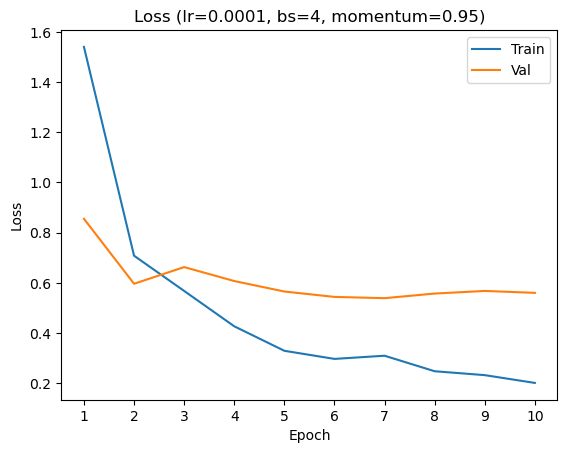

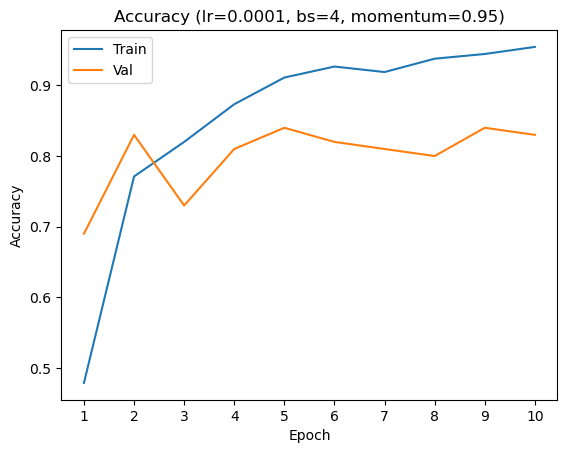

Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.17it/s]

Training 1: loss=2.434 acc=0.181



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.33it/s]


Validation 1: loss=2.020 acc=0.330
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.18it/s]

Training 2: loss=1.767 acc=0.416



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.32it/s]


Validation 2: loss=1.565 acc=0.470
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.19it/s]

Training 3: loss=1.404 acc=0.537



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.31it/s]


Validation 3: loss=1.310 acc=0.590
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.18it/s]

Training 4: loss=1.236 acc=0.624



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.28it/s]


Validation 4: loss=1.138 acc=0.620
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.18it/s]

Training 5: loss=1.033 acc=0.698



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.24it/s]


Validation 5: loss=1.111 acc=0.650
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.17it/s]

Training 6: loss=0.959 acc=0.706



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.28it/s]


Validation 6: loss=0.977 acc=0.690
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.18it/s]

Training 7: loss=0.892 acc=0.736



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.30it/s]


Validation 7: loss=0.912 acc=0.710
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.18it/s]

Training 8: loss=0.845 acc=0.740



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.30it/s]


Validation 8: loss=0.855 acc=0.790
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.19it/s]

Training 9: loss=0.756 acc=0.796



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.26it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 9: loss=0.833 acc=0.740
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.18it/s]

Training 10: loss=0.731 acc=0.789



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.31it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 10: loss=0.756 acc=0.770
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 11 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.18it/s]

Training 11: loss=0.664 acc=0.816



Epoch 11 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.32it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 11: loss=0.800 acc=0.710
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 12 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.19it/s]

Training 12: loss=0.647 acc=0.818



Epoch 12 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.27it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 12: loss=0.702 acc=0.790
Testing: lr=0.0001, bs=8, momentum=0.8


Epoch 13 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.18it/s]

Training 13: loss=0.621 acc=0.828



Epoch 13 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.31it/s]

Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


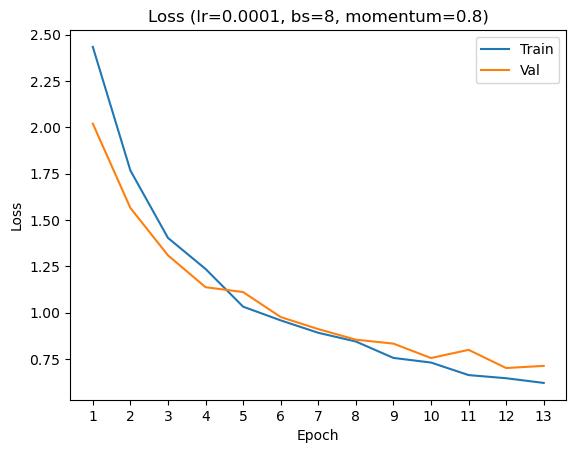

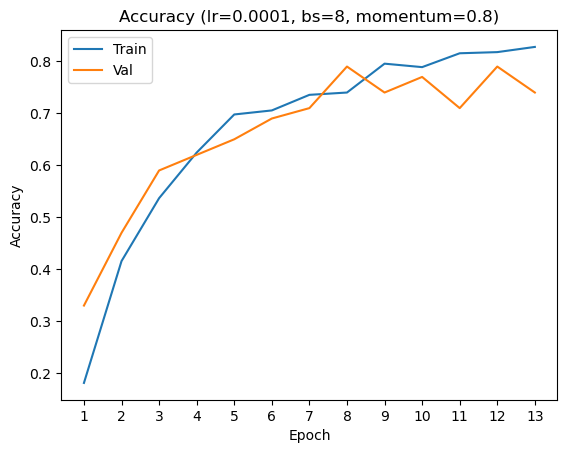

Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.19it/s]

Training 1: loss=2.186 acc=0.281



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.34it/s]


Validation 1: loss=1.626 acc=0.480
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 113/113 [00:51<00:00,  2.18it/s]

Training 2: loss=1.368 acc=0.564



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.30it/s]


Validation 2: loss=1.231 acc=0.580
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 113/113 [00:52<00:00,  2.17it/s]

Training 3: loss=1.034 acc=0.694



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:01<00:00,  7.26it/s]


Validation 3: loss=0.989 acc=0.770
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 113/113 [00:45<00:00,  2.47it/s]

Training 4: loss=0.869 acc=0.744



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.38it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 4: loss=0.865 acc=0.710
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 5: loss=0.717 acc=0.803



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.29it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 5: loss=0.802 acc=0.770
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 6: loss=0.678 acc=0.819



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.74it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 6: loss=0.785 acc=0.720
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 7: loss=0.603 acc=0.846



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.31it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 7: loss=0.771 acc=0.730
Testing: lr=0.0001, bs=8, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 8: loss=0.564 acc=0.849



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.36it/s]

Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


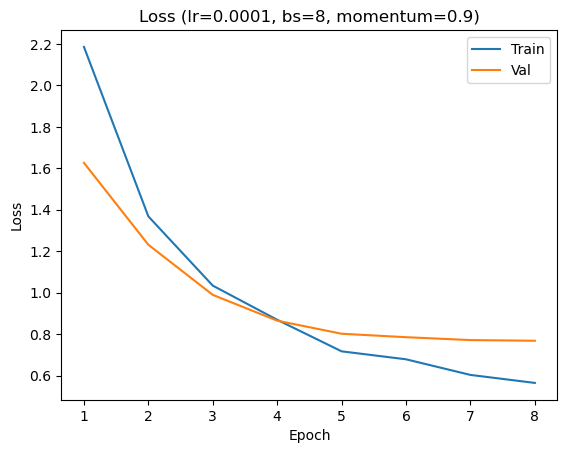

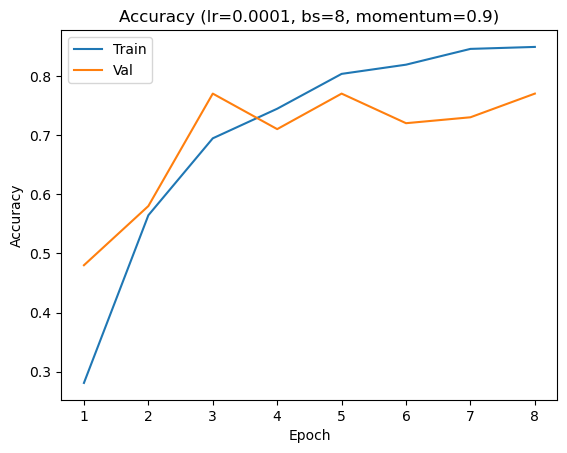

Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 1: loss=1.913 acc=0.372



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.17it/s]


Validation 1: loss=1.132 acc=0.630
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 2: loss=1.036 acc=0.668



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.25it/s]


Validation 2: loss=0.878 acc=0.770
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.31it/s]

Training 3: loss=0.752 acc=0.766



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.19it/s]


Validation 3: loss=0.791 acc=0.790
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 4: loss=0.647 acc=0.811



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.55it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 4: loss=0.723 acc=0.770
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.30it/s]

Training 5: loss=0.557 acc=0.842



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.17it/s]


Validation 5: loss=0.633 acc=0.820
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 6: loss=0.457 acc=0.874



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.28it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 6: loss=0.641 acc=0.810
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 7: loss=0.377 acc=0.910



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.91it/s]


Validation 7: loss=0.568 acc=0.830
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 8: loss=0.379 acc=0.900



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.69it/s]


Validation 8: loss=0.535 acc=0.840
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 9: loss=0.376 acc=0.891



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.19it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 9: loss=0.566 acc=0.800
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 10: loss=0.331 acc=0.907



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.17it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 10: loss=0.594 acc=0.800
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 11 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.39it/s]

Training 11: loss=0.316 acc=0.919



Epoch 11 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.26it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 11: loss=0.573 acc=0.830
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 12 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 12: loss=0.292 acc=0.929



Epoch 12 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.25it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 12: loss=0.537 acc=0.790
Testing: lr=0.0001, bs=8, momentum=0.95


Epoch 13 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 13: loss=0.289 acc=0.928



Epoch 13 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.24it/s]

Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


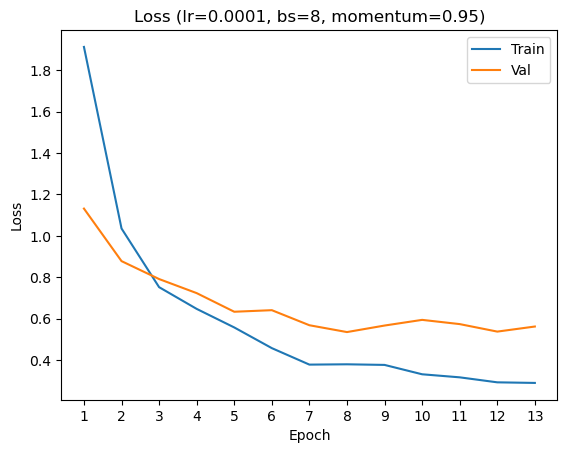

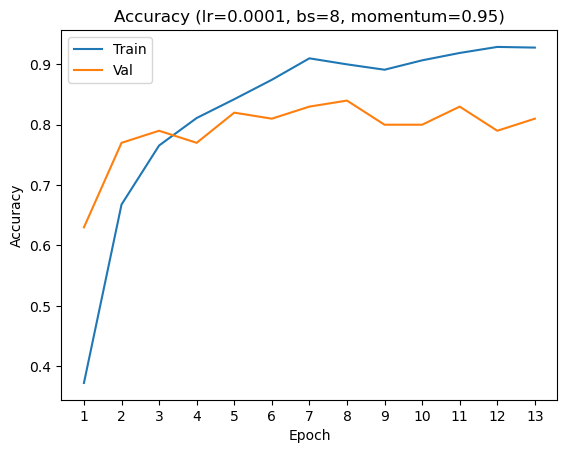

Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 1: loss=2.719 acc=0.138



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.09it/s]


Validation 1: loss=2.332 acc=0.280
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 2: loss=2.211 acc=0.236



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.12it/s]


Validation 2: loss=2.026 acc=0.310
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 3: loss=1.916 acc=0.312



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.02it/s]


Validation 3: loss=1.741 acc=0.440
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 4: loss=1.663 acc=0.433



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.11it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 4: loss=1.571 acc=0.430
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 5: loss=1.480 acc=0.517



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]


Validation 5: loss=1.397 acc=0.520
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 6: loss=1.352 acc=0.574



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.11it/s]


Validation 6: loss=1.290 acc=0.570
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 7: loss=1.250 acc=0.590



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.85it/s]


Validation 7: loss=1.136 acc=0.600
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 8: loss=1.164 acc=0.641



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.94it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 8: loss=1.122 acc=0.600
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 9: loss=1.101 acc=0.651



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]


Validation 9: loss=1.132 acc=0.630
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 10: loss=1.047 acc=0.676



Epoch 10 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]


Validation 10: loss=1.042 acc=0.680
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 11 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 11: loss=0.991 acc=0.697



Epoch 11 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.03it/s]


Validation 11: loss=0.972 acc=0.710
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 12 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 12: loss=0.933 acc=0.733



Epoch 12 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.12it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 12: loss=0.916 acc=0.700
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 13 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 13: loss=0.860 acc=0.767



Epoch 13 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.12it/s]


Validation 13: loss=0.891 acc=0.760
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 14 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 14: loss=0.912 acc=0.712



Epoch 14 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.05it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 14: loss=0.845 acc=0.740
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 15 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 15: loss=0.806 acc=0.778



Epoch 15 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.07it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 15: loss=0.821 acc=0.740
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 16 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 16: loss=0.812 acc=0.786



Epoch 16 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.12it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 16: loss=0.830 acc=0.760
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 17 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 17: loss=0.800 acc=0.770



Epoch 17 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.92it/s]


Validation 17: loss=0.771 acc=0.800
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 18 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 18: loss=0.783 acc=0.802



Epoch 18 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.13it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 18: loss=0.764 acc=0.800
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 19 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 19: loss=0.733 acc=0.794



Epoch 19 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.08it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 19: loss=0.790 acc=0.770
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 20 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 20: loss=0.705 acc=0.794



Epoch 20 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.08it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 20: loss=0.789 acc=0.740
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 21 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 21: loss=0.682 acc=0.810



Epoch 21 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 21: loss=0.727 acc=0.800
Testing: lr=0.0001, bs=16, momentum=0.8


Epoch 22 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 22: loss=0.658 acc=0.831



Epoch 22 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


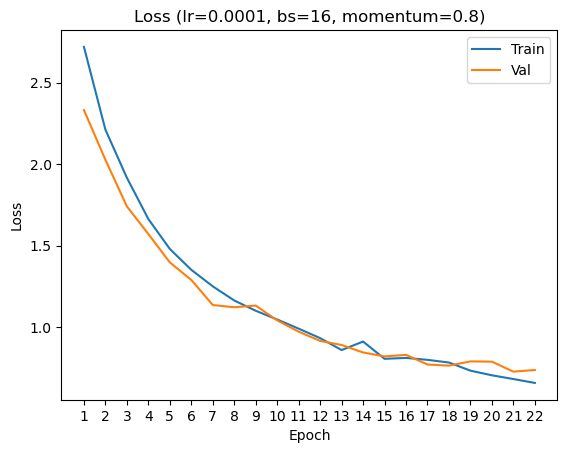

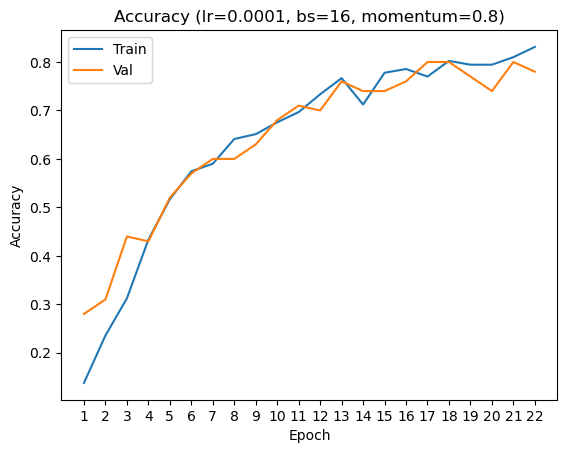

Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 1: loss=2.307 acc=0.208



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.77it/s]


Validation 1: loss=1.753 acc=0.430
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 2: loss=1.667 acc=0.433



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]


Validation 2: loss=1.452 acc=0.540
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 57/57 [00:24<00:00,  2.28it/s]

Training 3: loss=1.358 acc=0.569



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]


Validation 3: loss=1.146 acc=0.640
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 4: loss=1.166 acc=0.643



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]


Validation 4: loss=1.032 acc=0.700
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 5: loss=1.050 acc=0.676



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.13it/s]


Validation 5: loss=0.903 acc=0.710
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 6: loss=0.921 acc=0.732



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.05it/s]


Validation 6: loss=0.851 acc=0.750
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 7: loss=0.848 acc=0.744



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.03it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 7: loss=0.798 acc=0.730
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 8: loss=0.768 acc=0.781



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.05it/s]


Validation 8: loss=0.741 acc=0.760
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 9 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 9: loss=0.738 acc=0.790



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.00it/s]


Validation 9: loss=0.726 acc=0.770
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 10 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 10: loss=0.700 acc=0.819



Epoch 10 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.11it/s]


Validation 10: loss=0.669 acc=0.820
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 11 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 11: loss=0.642 acc=0.824



Epoch 11 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.96it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 11: loss=0.698 acc=0.770
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 12 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 12: loss=0.604 acc=0.844



Epoch 12 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 12: loss=0.659 acc=0.810
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 13 - training phase: 100%|██████████| 57/57 [00:32<00:00,  1.73it/s]

Training 13: loss=0.572 acc=0.850



Epoch 13 - validation phase: 100%|██████████| 7/7 [00:01<00:00,  6.42it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 13: loss=0.616 acc=0.810
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 14 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.23it/s]

Training 14: loss=0.612 acc=0.838



Epoch 14 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.11it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 14: loss=0.587 acc=0.810
Testing: lr=0.0001, bs=16, momentum=0.9


Epoch 15 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 15: loss=0.572 acc=0.844



Epoch 15 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.09it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


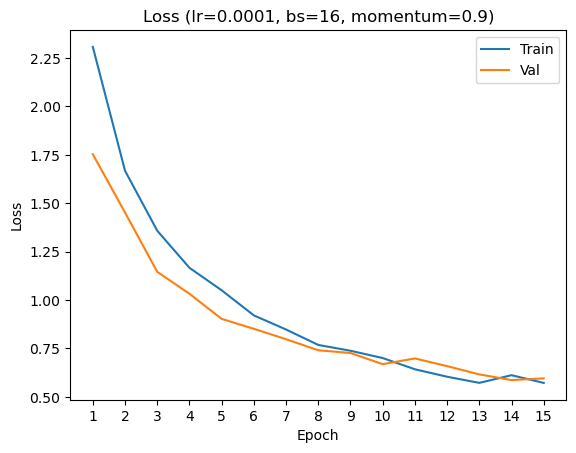

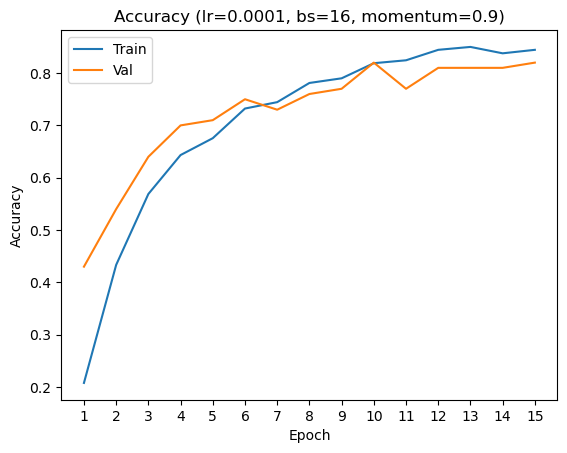

Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.23it/s]

Training 1: loss=2.447 acc=0.210



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]


Validation 1: loss=1.841 acc=0.410
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 2: loss=1.465 acc=0.509



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]


Validation 2: loss=1.232 acc=0.580
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 3: loss=1.005 acc=0.686



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.09it/s]


Validation 3: loss=1.039 acc=0.650
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 4: loss=0.860 acc=0.732



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.95it/s]


Validation 4: loss=0.910 acc=0.710
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 5: loss=0.726 acc=0.798



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.02it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 5: loss=0.878 acc=0.700
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 6: loss=0.713 acc=0.780



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.09it/s]


Validation 6: loss=0.761 acc=0.750
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 7: loss=0.614 acc=0.827



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.11it/s]


Validation 7: loss=0.734 acc=0.760
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 8: loss=0.535 acc=0.847



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.15it/s]


Validation 8: loss=0.684 acc=0.800
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 9: loss=0.501 acc=0.876



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.08it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 9: loss=0.656 acc=0.800
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.21it/s]

Training 10: loss=0.452 acc=0.884



Epoch 10 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.95it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 10: loss=0.686 acc=0.760
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 11 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 11: loss=0.449 acc=0.874



Epoch 11 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.08it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 11: loss=0.697 acc=0.770
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 12 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 12: loss=0.412 acc=0.913



Epoch 12 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]


Validation 12: loss=0.599 acc=0.830
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 13 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.28it/s]

Training 13: loss=0.386 acc=0.907



Epoch 13 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 13: loss=0.630 acc=0.790
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 14 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 14: loss=0.356 acc=0.910



Epoch 14 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.94it/s]


Validation 14: loss=0.647 acc=0.840
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 15 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 15: loss=0.357 acc=0.913



Epoch 15 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.14it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 15: loss=0.663 acc=0.800
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 16 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 16: loss=0.366 acc=0.898



Epoch 16 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.09it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 16: loss=0.627 acc=0.800
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 17 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 17: loss=0.353 acc=0.911



Epoch 17 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.15it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 17: loss=0.578 acc=0.800
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 18 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 18: loss=0.346 acc=0.917



Epoch 18 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.12it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 18: loss=0.591 acc=0.830
Testing: lr=0.0001, bs=16, momentum=0.95


Epoch 19 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 19: loss=0.328 acc=0.920



Epoch 19 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.04it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


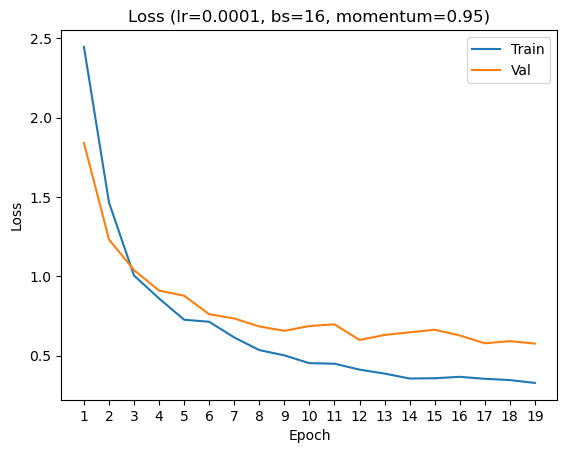

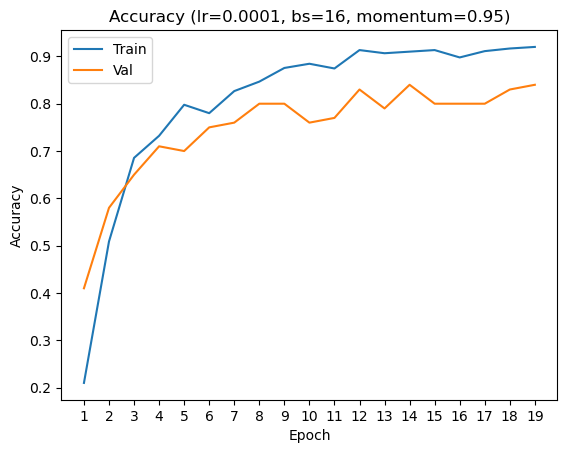

In [7]:
lr = 1e-4
batch_sizes = [4, 8, 16]
momentums = [0.8, 0.9, 0.95]
total_epochs = 50
best_acc = 0

for batch_size in batch_sizes:
    for momentum in momentums:

        total_train_loss, total_val_loss = [], []
        total_train_acc, total_val_acc = [], []

        dino_model = Classifier()
        dino_model = dino_model.to(device)
        criterion = nn.CrossEntropyLoss()
        # Initialise the SGD optimizer.
        optimizer = optim.SGD(dino_model.parameters(), lr=lr, momentum=momentum)
        # Put the model in "train" mode
        dino_model.train()

        best_val_acc = 0
        patience = 5  # Number of epochs to wait before stopping
        patience_counter = 0
            
        for epoch in range(total_epochs):    
            train_loss = []
            correct = 0
            total = 0
                
            balanced_trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler = sampler)
            valloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers = 1)
                
            print(f"Testing: lr={lr}, bs={batch_size}, momentum={momentum}")
        

                
                
            for i, data in  tqdm.tqdm(enumerate(balanced_trainloader, 0), total = len(balanced_trainloader), desc = f'Epoch {epoch+1} - training phase'):
                inputs, labels = data
            
                # inputs = train_transform(inputs)
                    
                inputs = inputs.to(device)
                labels = labels.to(device)
            
                optimizer.zero_grad()
            
                features = dino(inputs)
                outputs = dino_model(features)
                    
                loss = criterion(outputs, labels)
                    
                loss.backward()
                    
                optimizer.step()
            
                train_loss += [loss.cpu().item()]
                    
                predicted = torch.argmax(outputs, axis = 1)
                    
                correct += torch.sum(predicted == labels).cpu().item()
                total += len(labels)
                    
            
            mean_train_loss = np.mean(train_loss)
            train_accuracy = correct/total
            print(f"Training {epoch+1}: loss={mean_train_loss:.3f} acc={train_accuracy:.3f}")
            
            total_train_loss += [mean_train_loss]
            total_train_acc += [train_accuracy]
                
            # Put the model in "eval" mode
            dino_model.eval()    
            
            # Validation loop: For all batches in the validation dataset
            with torch.no_grad(): # not build the computation graph for backpropagation, and thus, no gradients will be computed or stored for the tensors involved in those operations.
                val_loss, val_correct, val_total = 0.0, 0.0, 0.0
                for i, data in  tqdm.tqdm(enumerate(valloader, 0), total = len(valloader), desc = f'Epoch {epoch+1} - validation phase'):
                    inputs, labels = data
                        
                    inputs = inputs.to(device)
                    labels = labels.to(device)                
                    features = dino(inputs)
                    outputs = dino_model(features)
                    predicted = torch.argmax(outputs, axis = 1)                        
                    loss = criterion(outputs, labels)
                    val_loss += loss.cpu().item() * inputs.size(0)
                
                    val_correct += torch.sum(predicted == labels).cpu().item()
                    val_total += inputs.size(0)
                
                mean_val_loss = val_loss / val_total
                val_accuracy = val_correct / val_total
                    
                total_val_loss.append(mean_val_loss)
                total_val_acc.append(val_accuracy)
                    
                if val_accuracy > best_val_acc:
                    best_val_acc = val_accuracy
                    patience_counter = 0
                else:
                    patience_counter += 1
                    print(f"Validation accuracy didn't improve. Patience counter: {patience_counter}/{patience}")
                        
                    if patience_counter >= patience:
                        print("Early stopping triggered.")
                        break  # Breaks out of training loop

                print(f"Validation {epoch+1}: loss={mean_val_loss:.3f} acc={val_accuracy:.3f}")
                
                if val_accuracy > best_acc:
                    torch.save(dino_model.state_dict(), "dino_linear_classifier_best.pth")
                    best_acc = val_accuracy
                    with open("best_model_info.txt", "w") as f:
                        f.write(f"Best val accuracy: {val_accuracy:.4f}\n")
                        f.write(f"Epoch: {epoch+1}\n")
                        f.write(f"Learning rate: {lr}\n")
                        f.write(f"Batch size: {batch_size}\n")
                        f.write(f"Momentum: {momentum}\n")
            
        epoch_loss = range(1, len(total_train_loss) + 1)
        plt.plot(epoch_loss, total_train_loss, label = 'Train')
        plt.plot(epoch_loss, total_val_loss, label = 'Val')
        plt.xticks(epoch_loss)
        plt.legend()
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Loss (lr={lr}, bs={batch_size}, momentum={momentum})')
        plt.show()
            
        epoch_acc = range(1, len(total_train_acc) + 1)
        plt.plot(epoch_acc, total_train_acc, label = 'Train')
        plt.plot(epoch_acc, total_val_acc, label = 'Val')
        plt.xticks(epoch_acc)
        plt.legend()
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy (lr={lr}, bs={batch_size}, momentum={momentum})')
        plt.show()

Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 1: loss=2.564 acc=0.151



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.59it/s]


Validation 1: loss=2.354 acc=0.160
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.13it/s]

Training 2: loss=2.202 acc=0.217



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.83it/s]


Validation 2: loss=2.107 acc=0.240
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 3: loss=2.062 acc=0.261



Epoch 3 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.70it/s]


Validation 3: loss=1.984 acc=0.300
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.12it/s]

Training 4: loss=1.960 acc=0.306



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.29it/s]


Validation 4: loss=1.920 acc=0.310
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 5: loss=1.817 acc=0.367



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.81it/s]


Validation 5: loss=1.761 acc=0.390
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 6: loss=1.733 acc=0.424



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.70it/s]


Validation 6: loss=1.694 acc=0.410
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 7: loss=1.623 acc=0.443



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.38it/s]


Validation 7: loss=1.590 acc=0.450
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 8: loss=1.556 acc=0.483



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.64it/s]


Validation 8: loss=1.497 acc=0.510
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 9: loss=1.528 acc=0.510



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.55it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 9: loss=1.503 acc=0.500
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 10: loss=1.430 acc=0.538



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.47it/s]


Validation 10: loss=1.389 acc=0.550
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 11 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 11: loss=1.388 acc=0.541



Epoch 11 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.57it/s]


Validation 11: loss=1.325 acc=0.590
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 12 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 12: loss=1.380 acc=0.557



Epoch 12 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.40it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 12: loss=1.367 acc=0.500
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 13 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.02it/s]

Training 13: loss=1.333 acc=0.572



Epoch 13 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.57it/s]


Validation 13: loss=1.237 acc=0.630
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 14 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.05it/s]

Training 14: loss=1.267 acc=0.602



Epoch 14 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.61it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 14: loss=1.280 acc=0.580
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 15 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.07it/s]

Training 15: loss=1.257 acc=0.598



Epoch 15 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.49it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 15: loss=1.214 acc=0.600
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 16 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 16: loss=1.150 acc=0.666



Epoch 16 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.50it/s]


Validation 16: loss=1.192 acc=0.640
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 17 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.12it/s]

Training 17: loss=1.152 acc=0.653



Epoch 17 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.49it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 17: loss=1.180 acc=0.600
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 18 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.11it/s]

Training 18: loss=1.129 acc=0.649



Epoch 18 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.50it/s]


Validation 18: loss=1.116 acc=0.690
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 19 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.12it/s]

Training 19: loss=1.103 acc=0.663



Epoch 19 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.38it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 19: loss=1.062 acc=0.670
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 20 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.11it/s]

Training 20: loss=1.078 acc=0.683



Epoch 20 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 26.89it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 20: loss=1.107 acc=0.660
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 21 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.11it/s]

Training 21: loss=1.073 acc=0.666



Epoch 21 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 25.98it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 21: loss=1.115 acc=0.670
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 22 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.09it/s]

Training 22: loss=1.044 acc=0.669



Epoch 22 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.40it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 22: loss=1.022 acc=0.680
Testing: lr=1e-05, bs=4, momentum=0.8


Epoch 23 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.13it/s]

Training 23: loss=1.054 acc=0.680



Epoch 23 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.31it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


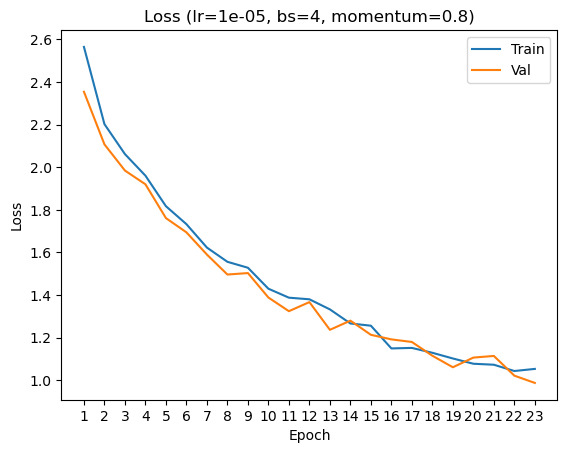

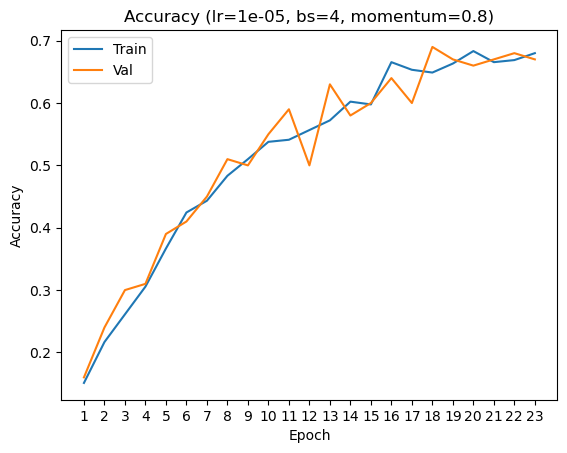

Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 1: loss=2.663 acc=0.156



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.51it/s]


Validation 1: loss=2.250 acc=0.210
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.16it/s]

Training 2: loss=2.119 acc=0.268



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.40it/s]


Validation 2: loss=1.967 acc=0.320
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.06it/s]

Training 3: loss=1.970 acc=0.320



Epoch 3 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.41it/s]


Validation 3: loss=1.687 acc=0.480
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.99it/s]

Training 4: loss=1.736 acc=0.397



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.56it/s]


Validation 4: loss=1.572 acc=0.500
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 5: loss=1.595 acc=0.466



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.19it/s]


Validation 5: loss=1.531 acc=0.510
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 6: loss=1.441 acc=0.531



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.47it/s]


Validation 6: loss=1.437 acc=0.590
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.01it/s]

Training 7: loss=1.359 acc=0.569



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.50it/s]


Validation 7: loss=1.254 acc=0.630
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.02it/s]

Training 8: loss=1.264 acc=0.613



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.24it/s]


Validation 8: loss=1.213 acc=0.640
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 9 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.97it/s]

Training 9: loss=1.257 acc=0.623



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.50it/s]


Validation 9: loss=1.207 acc=0.670
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 10 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.99it/s]

Training 10: loss=1.144 acc=0.652



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.34it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 10: loss=1.102 acc=0.670
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 11 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.93it/s]

Training 11: loss=1.155 acc=0.627



Epoch 11 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.01it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 11: loss=1.108 acc=0.660
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 12 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.01it/s]

Training 12: loss=1.053 acc=0.691



Epoch 12 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.36it/s]


Validation 12: loss=1.027 acc=0.700
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 13 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 13: loss=0.994 acc=0.703



Epoch 13 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.13it/s]


Validation 13: loss=1.007 acc=0.730
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 14 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.08it/s]

Training 14: loss=0.984 acc=0.711



Epoch 14 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.43it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 14: loss=0.930 acc=0.670
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 15 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.01it/s]

Training 15: loss=0.940 acc=0.717



Epoch 15 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.45it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 15: loss=0.935 acc=0.720
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 16 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.99it/s]

Training 16: loss=0.903 acc=0.752



Epoch 16 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.45it/s]


Validation 16: loss=0.905 acc=0.750
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 17 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.94it/s]

Training 17: loss=0.868 acc=0.743



Epoch 17 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.29it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 17: loss=0.905 acc=0.720
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 18 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.99it/s]

Training 18: loss=0.868 acc=0.741



Epoch 18 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.47it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 18: loss=0.891 acc=0.730
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 19 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.98it/s]

Training 19: loss=0.872 acc=0.751



Epoch 19 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.53it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 19: loss=0.904 acc=0.730
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 20 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 20: loss=0.787 acc=0.790



Epoch 20 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.45it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 20: loss=0.854 acc=0.740
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 21 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.93it/s]

Training 21: loss=0.794 acc=0.767



Epoch 21 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.63it/s]


Validation 21: loss=0.853 acc=0.760
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 22 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.00it/s]

Training 22: loss=0.738 acc=0.789



Epoch 22 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.53it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 22: loss=0.860 acc=0.730
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 23 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.98it/s]

Training 23: loss=0.748 acc=0.786



Epoch 23 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.18it/s]


Validation 23: loss=0.785 acc=0.780
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 24 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.00it/s]

Training 24: loss=0.764 acc=0.777



Epoch 24 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.46it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 24: loss=0.812 acc=0.730
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 25 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.01it/s]

Training 25: loss=0.744 acc=0.786



Epoch 25 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.43it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 25: loss=0.738 acc=0.770
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 26 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.97it/s]

Training 26: loss=0.666 acc=0.821



Epoch 26 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.22it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 26: loss=0.775 acc=0.770
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 27 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.01it/s]

Training 27: loss=0.685 acc=0.792



Epoch 27 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.51it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 27: loss=0.796 acc=0.730
Testing: lr=1e-05, bs=4, momentum=0.9


Epoch 28 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.00it/s]

Training 28: loss=0.669 acc=0.811



Epoch 28 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.37it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


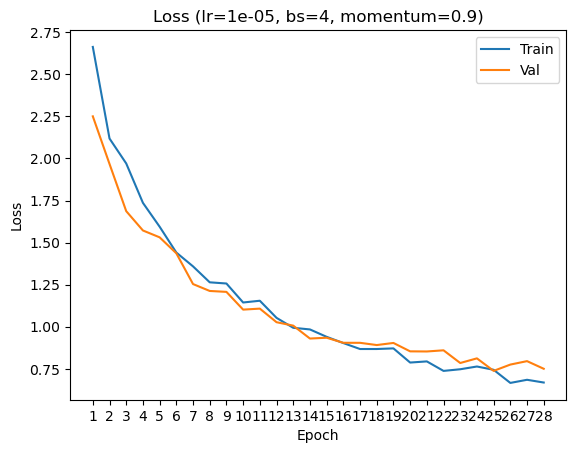

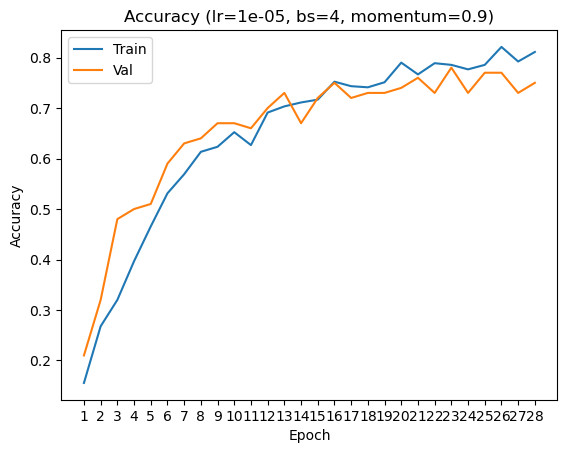

Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.01it/s]

Training 1: loss=2.554 acc=0.153



Epoch 1 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.37it/s]


Validation 1: loss=2.004 acc=0.280
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.02it/s]

Training 2: loss=1.895 acc=0.347



Epoch 2 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 26.77it/s]


Validation 2: loss=1.573 acc=0.480
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.00it/s]

Training 3: loss=1.539 acc=0.487



Epoch 3 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.39it/s]


Validation 3: loss=1.317 acc=0.610
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.98it/s]

Training 4: loss=1.302 acc=0.604



Epoch 4 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.43it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 4: loss=1.212 acc=0.610
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.01it/s]

Training 5: loss=1.235 acc=0.609



Epoch 5 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.42it/s]


Validation 5: loss=1.144 acc=0.650
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.95it/s]

Training 6: loss=1.132 acc=0.639



Epoch 6 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.46it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 6: loss=1.019 acc=0.640
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.01it/s]

Training 7: loss=0.976 acc=0.691



Epoch 7 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.51it/s]


Validation 7: loss=0.957 acc=0.730
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.90it/s]

Training 8: loss=0.904 acc=0.730



Epoch 8 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.34it/s]


Validation 8: loss=0.869 acc=0.780
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.03it/s]

Training 9: loss=0.870 acc=0.734



Epoch 9 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.31it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 9: loss=0.876 acc=0.750
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.99it/s]

Training 10: loss=0.861 acc=0.747



Epoch 10 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.40it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 10: loss=0.821 acc=0.770
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 11 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 11: loss=0.775 acc=0.777



Epoch 11 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.44it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 11: loss=0.790 acc=0.760
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 12 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.99it/s]

Training 12: loss=0.729 acc=0.787



Epoch 12 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.25it/s]


Validation 12: loss=0.739 acc=0.790
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 13 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.01it/s]

Training 13: loss=0.753 acc=0.779



Epoch 13 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.20it/s]


Validation 13: loss=0.749 acc=0.810
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 14 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.97it/s]

Training 14: loss=0.679 acc=0.807



Epoch 14 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.51it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 14: loss=0.731 acc=0.770
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 15 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.00it/s]

Training 15: loss=0.607 acc=0.842



Epoch 15 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.42it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 15: loss=0.677 acc=0.790
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 16 - training phase: 100%|██████████| 225/225 [00:28<00:00,  8.00it/s]

Training 16: loss=0.643 acc=0.814



Epoch 16 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 26.96it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 16: loss=0.684 acc=0.740
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 17 - training phase: 100%|██████████| 225/225 [00:27<00:00,  8.04it/s]

Training 17: loss=0.594 acc=0.841



Epoch 17 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.36it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 17: loss=0.711 acc=0.770
Testing: lr=1e-05, bs=4, momentum=0.95


Epoch 18 - training phase: 100%|██████████| 225/225 [00:28<00:00,  7.99it/s]

Training 18: loss=0.597 acc=0.830



Epoch 18 - validation phase: 100%|██████████| 25/25 [00:00<00:00, 27.44it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


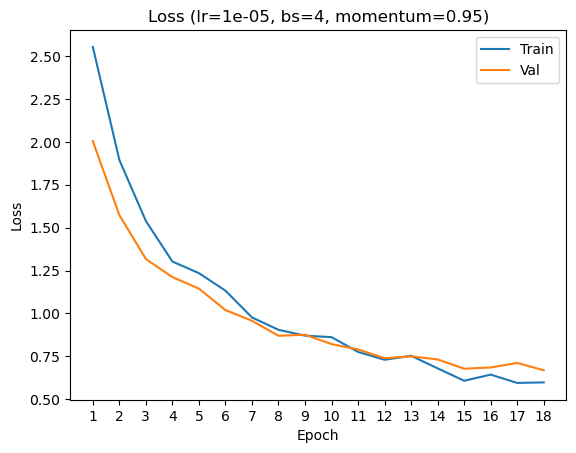

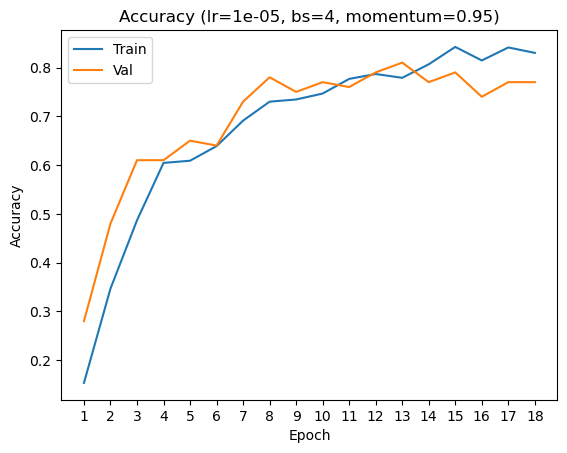

Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 1: loss=2.906 acc=0.140



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.20it/s]


Validation 1: loss=2.836 acc=0.140
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 2: loss=2.665 acc=0.147



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.28it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 2: loss=2.603 acc=0.120
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 3: loss=2.556 acc=0.158



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.28it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 3: loss=2.446 acc=0.140
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 4: loss=2.403 acc=0.181



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.18it/s]


Validation 4: loss=2.421 acc=0.150
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 5: loss=2.257 acc=0.222



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.91it/s]


Validation 5: loss=2.335 acc=0.180
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.38it/s]

Training 6: loss=2.246 acc=0.230



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.08it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 6: loss=2.235 acc=0.130
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.31it/s]

Training 7: loss=2.126 acc=0.253



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.14it/s]


Validation 7: loss=2.101 acc=0.260
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 8: loss=2.073 acc=0.278



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.18it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 8: loss=2.094 acc=0.260
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 9: loss=1.995 acc=0.303



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.28it/s]


Validation 9: loss=2.061 acc=0.270
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 10: loss=1.958 acc=0.328



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.00it/s]


Validation 10: loss=1.902 acc=0.360
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 11 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 11: loss=1.880 acc=0.367



Epoch 11 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.26it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 11: loss=1.898 acc=0.320
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 12 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 12: loss=1.819 acc=0.368



Epoch 12 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.27it/s]


Validation 12: loss=1.834 acc=0.370
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 13 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 13: loss=1.746 acc=0.391



Epoch 13 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.15it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 13: loss=1.795 acc=0.330
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 14 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 14: loss=1.778 acc=0.379



Epoch 14 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.26it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 14: loss=1.736 acc=0.370
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 15 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 15: loss=1.697 acc=0.407



Epoch 15 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.92it/s]


Validation 15: loss=1.699 acc=0.440
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 16 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 16: loss=1.724 acc=0.402



Epoch 16 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.07it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 16: loss=1.631 acc=0.440
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 17 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 17: loss=1.581 acc=0.476



Epoch 17 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.33it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 17: loss=1.638 acc=0.420
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 18 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.31it/s]

Training 18: loss=1.663 acc=0.431



Epoch 18 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.37it/s]


Validation 18: loss=1.544 acc=0.460
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 19 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 19: loss=1.538 acc=0.476



Epoch 19 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.03it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 19: loss=1.557 acc=0.410
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 20 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.29it/s]

Training 20: loss=1.575 acc=0.471



Epoch 20 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.80it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 20: loss=1.517 acc=0.460
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 21 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 21: loss=1.482 acc=0.503



Epoch 21 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.23it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 21: loss=1.495 acc=0.460
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 22 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 22: loss=1.474 acc=0.503



Epoch 22 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.08it/s]


Validation 22: loss=1.467 acc=0.470
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 23 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 23: loss=1.397 acc=0.536



Epoch 23 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.17it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 23: loss=1.430 acc=0.460
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 24 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 24: loss=1.385 acc=0.540



Epoch 24 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.20it/s]


Validation 24: loss=1.366 acc=0.530
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 25 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 25: loss=1.381 acc=0.532



Epoch 25 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.23it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 25: loss=1.386 acc=0.480
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 26 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.38it/s]

Training 26: loss=1.359 acc=0.560



Epoch 26 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.10it/s]


Validation 26: loss=1.369 acc=0.540
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 27 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 27: loss=1.362 acc=0.563



Epoch 27 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.22it/s]


Validation 27: loss=1.336 acc=0.560
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 28 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 28: loss=1.263 acc=0.587



Epoch 28 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.23it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 28: loss=1.292 acc=0.560
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 29 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 29: loss=1.276 acc=0.586



Epoch 29 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.23it/s]


Validation 29: loss=1.298 acc=0.600
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 30 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 30: loss=1.290 acc=0.594



Epoch 30 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.00it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 30: loss=1.293 acc=0.580
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 31 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 31: loss=1.226 acc=0.618



Epoch 31 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.26it/s]


Validation 31: loss=1.212 acc=0.660
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 32 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 32: loss=1.247 acc=0.603



Epoch 32 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.17it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 32: loss=1.278 acc=0.580
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 33 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 33: loss=1.223 acc=0.602



Epoch 33 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.21it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 33: loss=1.196 acc=0.630
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 34 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 34: loss=1.175 acc=0.629



Epoch 34 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.26it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 34: loss=1.202 acc=0.580
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 35 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.38it/s]

Training 35: loss=1.204 acc=0.613



Epoch 35 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.34it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 35: loss=1.177 acc=0.560
Testing: lr=1e-05, bs=8, momentum=0.8


Epoch 36 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 36: loss=1.146 acc=0.641



Epoch 36 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.25it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


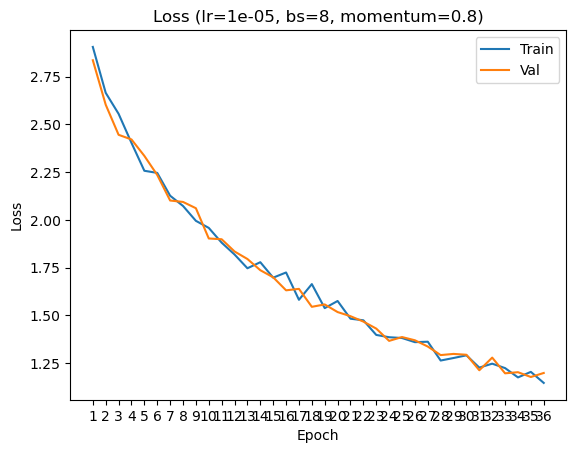

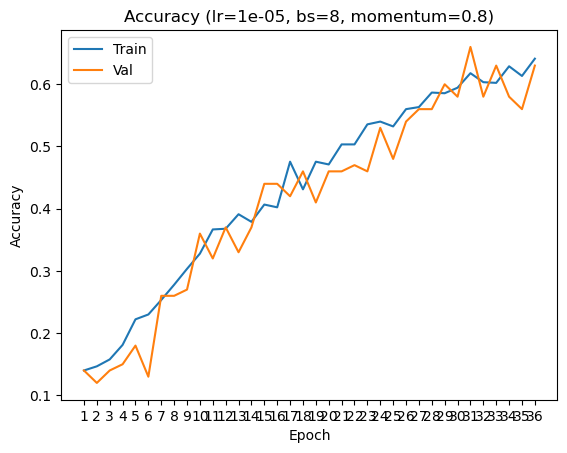

Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.38it/s]

Training 1: loss=2.681 acc=0.170



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.83it/s]


Validation 1: loss=2.662 acc=0.200
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 2: loss=2.444 acc=0.187



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.24it/s]


Validation 2: loss=2.410 acc=0.210
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 3: loss=2.222 acc=0.226



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.28it/s]


Validation 3: loss=2.295 acc=0.220
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 4: loss=2.046 acc=0.303



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.14it/s]


Validation 4: loss=2.087 acc=0.320
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 5: loss=1.913 acc=0.338



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.27it/s]


Validation 5: loss=1.900 acc=0.330
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 6: loss=1.843 acc=0.370



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.03it/s]


Validation 6: loss=1.830 acc=0.450
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 7: loss=1.736 acc=0.419



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.20it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 7: loss=1.721 acc=0.430
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 8: loss=1.709 acc=0.421



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.26it/s]


Validation 8: loss=1.621 acc=0.470
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 9 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 9: loss=1.588 acc=0.471



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.07it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 9: loss=1.598 acc=0.470
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 10 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 10: loss=1.450 acc=0.544



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.25it/s]


Validation 10: loss=1.479 acc=0.490
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 11 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 11: loss=1.488 acc=0.526



Epoch 11 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.27it/s]


Validation 11: loss=1.468 acc=0.530
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 12 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 12: loss=1.398 acc=0.557



Epoch 12 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.22it/s]


Validation 12: loss=1.323 acc=0.610
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 13 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 13: loss=1.377 acc=0.550



Epoch 13 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.14it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 13: loss=1.341 acc=0.590
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 14 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.38it/s]

Training 14: loss=1.330 acc=0.576



Epoch 14 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.22it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 14: loss=1.279 acc=0.580
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 15 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.35it/s]

Training 15: loss=1.307 acc=0.577



Epoch 15 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.28it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 15: loss=1.240 acc=0.590
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 16 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 16: loss=1.237 acc=0.619



Epoch 16 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.12it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 16: loss=1.255 acc=0.610
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 17 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 17: loss=1.164 acc=0.634



Epoch 17 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.28it/s]


Validation 17: loss=1.186 acc=0.660
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 18 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 18: loss=1.220 acc=0.621



Epoch 18 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.24it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 18: loss=1.150 acc=0.620
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 19 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 19: loss=1.172 acc=0.628



Epoch 19 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.52it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 19: loss=1.127 acc=0.630
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 20 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 20: loss=1.129 acc=0.639



Epoch 20 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.20it/s]


Validation 20: loss=1.131 acc=0.680
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 21 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.38it/s]

Training 21: loss=1.102 acc=0.664



Epoch 21 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.26it/s]


Validation 21: loss=1.016 acc=0.710
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 22 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.36it/s]

Training 22: loss=1.013 acc=0.704



Epoch 22 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.21it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 22: loss=1.075 acc=0.710
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 23 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 23: loss=1.026 acc=0.697



Epoch 23 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.06it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 23: loss=1.011 acc=0.670
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 24 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 24: loss=1.050 acc=0.673



Epoch 24 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.21it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 24: loss=1.010 acc=0.680
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 25 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 25: loss=0.969 acc=0.711



Epoch 25 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.25it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 25: loss=1.034 acc=0.700
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 26 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 26: loss=1.003 acc=0.683



Epoch 26 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.12it/s]


Validation 26: loss=0.965 acc=0.720
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 27 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.31it/s]

Training 27: loss=0.965 acc=0.697



Epoch 27 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.22it/s]


Validation 27: loss=0.930 acc=0.750
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 28 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 28: loss=0.955 acc=0.717



Epoch 28 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.97it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 28: loss=0.962 acc=0.710
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 29 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.28it/s]

Training 29: loss=0.946 acc=0.714



Epoch 29 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.99it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 29: loss=0.935 acc=0.730
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 30 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 30: loss=0.900 acc=0.723



Epoch 30 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.24it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 30: loss=0.930 acc=0.730
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 31 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 31: loss=0.875 acc=0.732



Epoch 31 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.14it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 31: loss=0.910 acc=0.740
Testing: lr=1e-05, bs=8, momentum=0.9


Epoch 32 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.31it/s]

Training 32: loss=0.892 acc=0.733



Epoch 32 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.25it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


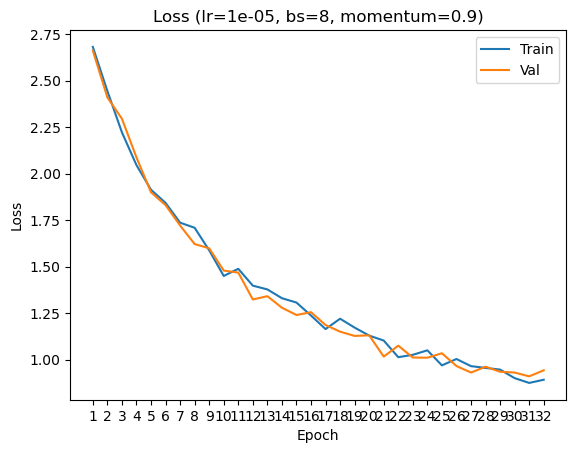

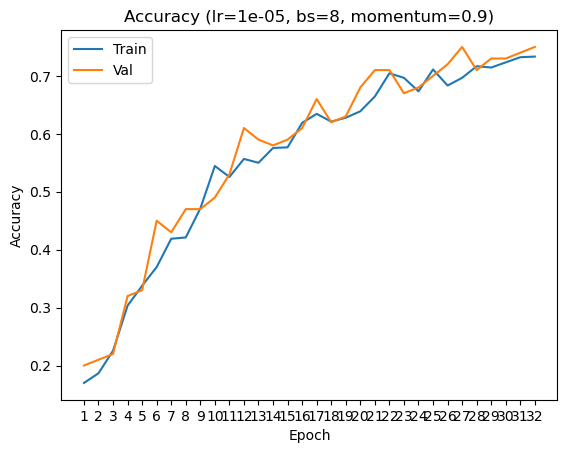

Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.31it/s]

Training 1: loss=2.800 acc=0.126



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.32it/s]


Validation 1: loss=2.340 acc=0.130
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.31it/s]

Training 2: loss=2.399 acc=0.188



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.20it/s]


Validation 2: loss=2.126 acc=0.220
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 3: loss=2.116 acc=0.260



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.26it/s]


Validation 3: loss=1.786 acc=0.370
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 4: loss=1.898 acc=0.354



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.13it/s]


Validation 4: loss=1.592 acc=0.430
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.30it/s]

Training 5: loss=1.671 acc=0.440



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.13it/s]


Validation 5: loss=1.447 acc=0.490
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.29it/s]

Training 6: loss=1.553 acc=0.487



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.30it/s]


Validation 6: loss=1.319 acc=0.610
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 7: loss=1.456 acc=0.530



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.27it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 7: loss=1.371 acc=0.500
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.31it/s]

Training 8: loss=1.330 acc=0.570



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.14it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 8: loss=1.181 acc=0.610
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 9: loss=1.275 acc=0.588



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.26it/s]


Validation 9: loss=1.140 acc=0.640
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 10: loss=1.148 acc=0.646



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.23it/s]


Validation 10: loss=1.021 acc=0.710
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 11 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 11: loss=1.079 acc=0.661



Epoch 11 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.40it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 11: loss=1.011 acc=0.700
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 12 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 12: loss=1.095 acc=0.637



Epoch 12 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.21it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 12: loss=1.004 acc=0.680
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 13 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 13: loss=1.043 acc=0.692



Epoch 13 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.24it/s]


Validation 13: loss=0.957 acc=0.730
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 14 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 14: loss=1.003 acc=0.694



Epoch 14 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 13.88it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 14: loss=0.921 acc=0.720
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 15 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 15: loss=0.943 acc=0.733



Epoch 15 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.19it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 15: loss=0.932 acc=0.710
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 16 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 16: loss=0.960 acc=0.720



Epoch 16 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.23it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 16: loss=0.895 acc=0.710
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 17 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.29it/s]

Training 17: loss=0.880 acc=0.744



Epoch 17 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.97it/s]


Validation 17: loss=0.854 acc=0.760
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 18 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 18: loss=0.915 acc=0.734



Epoch 18 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.26it/s]


Validation 18: loss=0.832 acc=0.770
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 19 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 19: loss=0.856 acc=0.726



Epoch 19 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.24it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 19: loss=0.792 acc=0.770
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 20 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 20: loss=0.817 acc=0.761



Epoch 20 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.21it/s]


Validation 20: loss=0.755 acc=0.780
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 21 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.31it/s]

Training 21: loss=0.804 acc=0.763



Epoch 21 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.48it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 21: loss=0.765 acc=0.780
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 22 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 22: loss=0.771 acc=0.773



Epoch 22 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.28it/s]


Validation 22: loss=0.725 acc=0.810
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 23 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 23: loss=0.738 acc=0.782



Epoch 23 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.38it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 23: loss=0.752 acc=0.790
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 24 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 24: loss=0.757 acc=0.781



Epoch 24 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.27it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 24: loss=0.781 acc=0.790
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 25 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 25: loss=0.690 acc=0.804



Epoch 25 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.22it/s]


Validation 25: loss=0.713 acc=0.840
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 26 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 26: loss=0.701 acc=0.810



Epoch 26 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.00it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 26: loss=0.679 acc=0.830
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 27 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 27: loss=0.664 acc=0.813



Epoch 27 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.01it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 27: loss=0.694 acc=0.810
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 28 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.29it/s]

Training 28: loss=0.641 acc=0.827



Epoch 28 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.21it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 28: loss=0.706 acc=0.810
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 29 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 29: loss=0.627 acc=0.828



Epoch 29 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.11it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 29: loss=0.701 acc=0.800
Testing: lr=1e-05, bs=8, momentum=0.95


Epoch 30 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.31it/s]

Training 30: loss=0.673 acc=0.828



Epoch 30 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.27it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


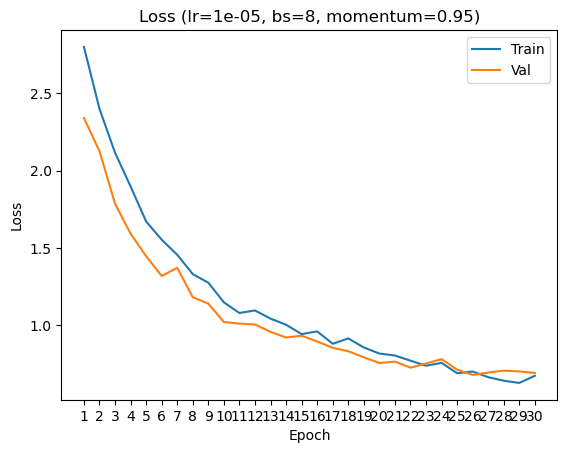

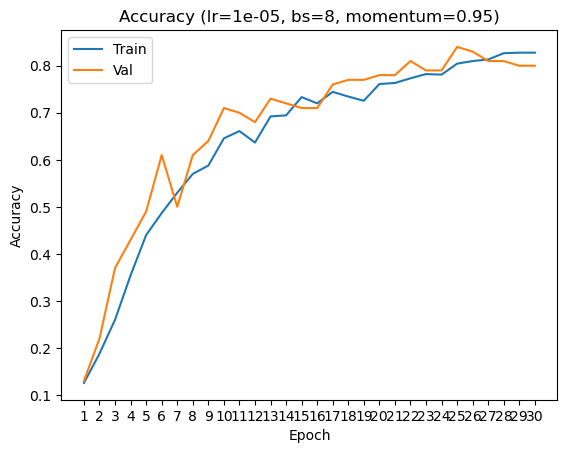

Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 1 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 1: loss=3.154 acc=0.108



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.82it/s]


Validation 1: loss=2.904 acc=0.160
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 2 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 2: loss=2.955 acc=0.132



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.99it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 2: loss=2.811 acc=0.120
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 3 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 3: loss=2.851 acc=0.104



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.09it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 3: loss=2.737 acc=0.150
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 4 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 4: loss=2.703 acc=0.129



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.05it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 4: loss=2.637 acc=0.150
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 5 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.23it/s]

Training 5: loss=2.750 acc=0.119



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.97it/s]


Validation 5: loss=2.594 acc=0.170
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 6 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 6: loss=2.596 acc=0.130



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.04it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 6: loss=2.487 acc=0.160
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 7 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 7: loss=2.483 acc=0.159



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.02it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 7: loss=2.466 acc=0.170
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 8 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 8: loss=2.566 acc=0.144



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.83it/s]


Validation 8: loss=2.357 acc=0.190
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 9 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.23it/s]

Training 9: loss=2.462 acc=0.160



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.04it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 9: loss=2.373 acc=0.180
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 10 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 10: loss=2.356 acc=0.161



Epoch 10 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.07it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 10: loss=2.275 acc=0.170
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 11 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 11: loss=2.343 acc=0.172



Epoch 11 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.99it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 11: loss=2.273 acc=0.170
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 12 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 12: loss=2.269 acc=0.187



Epoch 12 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.07it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 12: loss=2.213 acc=0.160
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 13 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 13: loss=2.190 acc=0.206



Epoch 13 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.94it/s]


Validation 13: loss=2.147 acc=0.240
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 14 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 14: loss=2.238 acc=0.212



Epoch 14 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.02it/s]


Validation 14: loss=2.095 acc=0.250
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 15 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 15: loss=2.156 acc=0.237



Epoch 15 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.09it/s]


Validation 15: loss=2.006 acc=0.340
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 16 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 16: loss=2.086 acc=0.248



Epoch 16 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.13it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 16: loss=1.984 acc=0.300
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 17 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 17: loss=2.125 acc=0.257



Epoch 17 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.98it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 17: loss=2.001 acc=0.280
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 18 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.23it/s]

Training 18: loss=2.072 acc=0.273



Epoch 18 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.90it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 18: loss=2.016 acc=0.280
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 19 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 19: loss=2.021 acc=0.308



Epoch 19 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]


Validation 19: loss=1.892 acc=0.350
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 20 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 20: loss=1.964 acc=0.314



Epoch 20 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.80it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 20: loss=1.945 acc=0.320
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 21 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 21: loss=1.867 acc=0.361



Epoch 21 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.05it/s]


Validation 21: loss=1.895 acc=0.390
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 22 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.20it/s]

Training 22: loss=1.893 acc=0.348



Epoch 22 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]


Validation 22: loss=1.835 acc=0.450
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 23 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 23: loss=1.904 acc=0.338



Epoch 23 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.27it/s]


Validation 23: loss=1.796 acc=0.460
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 24 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 24: loss=1.790 acc=0.383



Epoch 24 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.08it/s]


Validation 24: loss=1.740 acc=0.500
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 25 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 25: loss=1.891 acc=0.362



Epoch 25 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.01it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 25: loss=1.666 acc=0.480
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 26 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 26: loss=1.747 acc=0.410



Epoch 26 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.92it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 26: loss=1.751 acc=0.470
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 27 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 27: loss=1.873 acc=0.341



Epoch 27 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.89it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 27: loss=1.669 acc=0.500
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 28 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 28: loss=1.790 acc=0.396



Epoch 28 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.08it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 28: loss=1.711 acc=0.480
Testing: lr=1e-05, bs=16, momentum=0.8


Epoch 29 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 29: loss=1.732 acc=0.427



Epoch 29 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.57it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


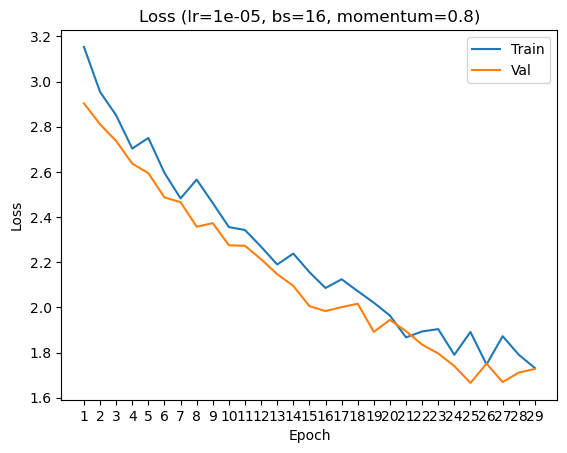

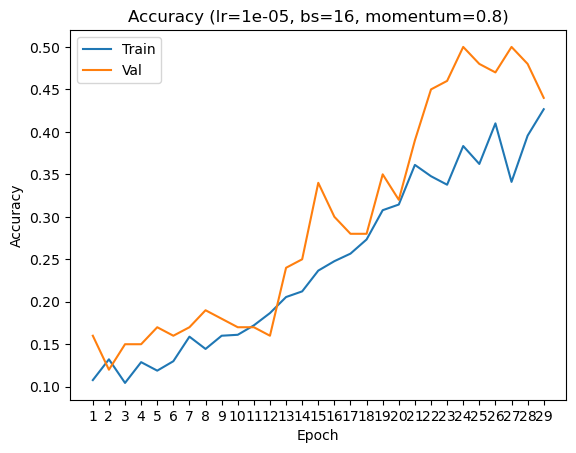

Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 1 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 1: loss=3.164 acc=0.132



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.90it/s]


Validation 1: loss=2.849 acc=0.090
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 2 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 2: loss=2.927 acc=0.117



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.02it/s]


Validation 2: loss=2.530 acc=0.140
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 3 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 3: loss=2.604 acc=0.153



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.97it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 3: loss=2.407 acc=0.120
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 4 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 4: loss=2.514 acc=0.160



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.07it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 4: loss=2.400 acc=0.130
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 5 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 5: loss=2.447 acc=0.173



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.00it/s]


Validation 5: loss=2.289 acc=0.160
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 6 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 6: loss=2.368 acc=0.203



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.67it/s]


Validation 6: loss=2.252 acc=0.250
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 7 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 7: loss=2.284 acc=0.216



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.03it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 7: loss=2.070 acc=0.230
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 8 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 8: loss=2.175 acc=0.256



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.99it/s]


Validation 8: loss=2.030 acc=0.320
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 9 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 9: loss=2.160 acc=0.264



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.60it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 9: loss=1.950 acc=0.300
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 10 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 10: loss=2.023 acc=0.278



Epoch 10 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.77it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 10: loss=1.944 acc=0.300
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 11 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 11: loss=1.969 acc=0.311



Epoch 11 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.01it/s]


Validation 11: loss=1.852 acc=0.370
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 12 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 12: loss=1.936 acc=0.324



Epoch 12 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.92it/s]


Validation 12: loss=1.817 acc=0.410
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 13 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 13: loss=1.853 acc=0.327



Epoch 13 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.05it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 13: loss=1.750 acc=0.410
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 14 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.23it/s]

Training 14: loss=1.789 acc=0.373



Epoch 14 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]


Validation 14: loss=1.697 acc=0.420
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 15 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 15: loss=1.735 acc=0.390



Epoch 15 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.01it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 15: loss=1.684 acc=0.420
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 16 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 16: loss=1.757 acc=0.394



Epoch 16 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.79it/s]


Validation 16: loss=1.652 acc=0.450
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 17 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 17: loss=1.636 acc=0.439



Epoch 17 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.80it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 17: loss=1.647 acc=0.400
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 18 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 18: loss=1.674 acc=0.426



Epoch 18 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.96it/s]


Validation 18: loss=1.573 acc=0.480
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 19 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 19: loss=1.614 acc=0.440



Epoch 19 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.93it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 19: loss=1.601 acc=0.420
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 20 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 20: loss=1.594 acc=0.453



Epoch 20 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 20: loss=1.553 acc=0.460
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 21 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 21: loss=1.520 acc=0.477



Epoch 21 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.91it/s]


Validation 21: loss=1.495 acc=0.500
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 22 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 22: loss=1.468 acc=0.501



Epoch 22 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.05it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 22: loss=1.499 acc=0.490
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 23 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 23: loss=1.471 acc=0.509



Epoch 23 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.94it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 23: loss=1.435 acc=0.500
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 24 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 24: loss=1.418 acc=0.514



Epoch 24 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.01it/s]


Validation 24: loss=1.452 acc=0.510
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 25 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 25: loss=1.421 acc=0.526



Epoch 25 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.93it/s]


Validation 25: loss=1.380 acc=0.520
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 26 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.23it/s]

Training 26: loss=1.386 acc=0.543



Epoch 26 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.96it/s]


Validation 26: loss=1.389 acc=0.540
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 27 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 27: loss=1.377 acc=0.557



Epoch 27 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.74it/s]


Validation 27: loss=1.362 acc=0.590
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 28 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 28: loss=1.331 acc=0.564



Epoch 28 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.78it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 28: loss=1.320 acc=0.560
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 29 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 29: loss=1.285 acc=0.591



Epoch 29 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.91it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 29: loss=1.286 acc=0.590
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 30 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 30: loss=1.290 acc=0.560



Epoch 30 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.99it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 30: loss=1.288 acc=0.550
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 31 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 31: loss=1.275 acc=0.591



Epoch 31 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 31: loss=1.311 acc=0.580
Testing: lr=1e-05, bs=16, momentum=0.9


Epoch 32 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 32: loss=1.298 acc=0.581



Epoch 32 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.04it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


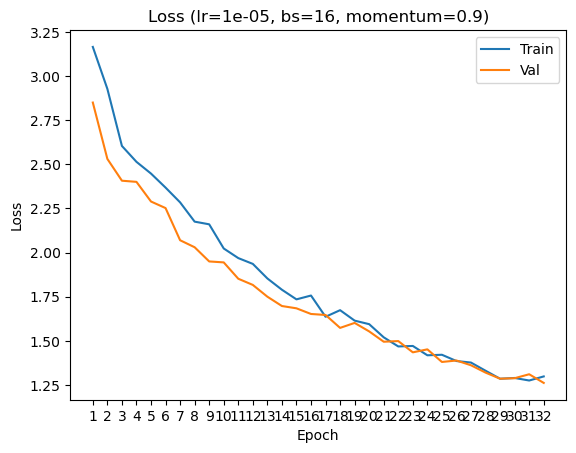

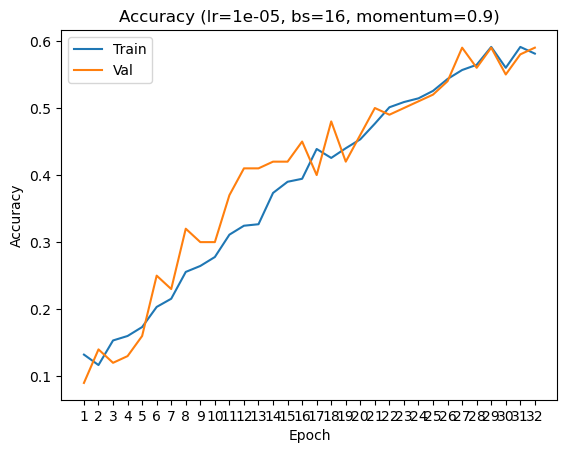

Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 1 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 1: loss=2.963 acc=0.116



Epoch 1 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.01it/s]


Validation 1: loss=2.576 acc=0.180
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 2 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 2: loss=2.518 acc=0.133



Epoch 2 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]


Validation 2: loss=2.254 acc=0.200
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 3 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 3: loss=2.251 acc=0.194



Epoch 3 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.92it/s]


Validation 3: loss=2.096 acc=0.270
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 4 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 4: loss=2.129 acc=0.234



Epoch 4 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.81it/s]


Validation 4: loss=2.012 acc=0.300
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 5 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 5: loss=2.015 acc=0.259



Epoch 5 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.08it/s]


Validation 5: loss=1.856 acc=0.360
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 6 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 6: loss=1.887 acc=0.329



Epoch 6 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.99it/s]


Validation 6: loss=1.819 acc=0.410
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 7 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 7: loss=1.768 acc=0.387



Epoch 7 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.12it/s]


Validation 7: loss=1.668 acc=0.430
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 8 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 8: loss=1.677 acc=0.412



Epoch 8 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.93it/s]


Validation 8: loss=1.599 acc=0.510
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 9 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 9: loss=1.641 acc=0.441



Epoch 9 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.03it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 9: loss=1.492 acc=0.460
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 10 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 10: loss=1.618 acc=0.439



Epoch 10 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.83it/s]


Validation 10: loss=1.475 acc=0.560
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 11 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 11: loss=1.501 acc=0.506



Epoch 11 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.00it/s]


Validation 11: loss=1.356 acc=0.610
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 12 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 12: loss=1.495 acc=0.492



Epoch 12 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.00it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 12: loss=1.345 acc=0.600
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 13 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 13: loss=1.412 acc=0.546



Epoch 13 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.94it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 13: loss=1.296 acc=0.590
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 14 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 14: loss=1.356 acc=0.562



Epoch 14 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.00it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 14: loss=1.243 acc=0.600
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 15 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 15: loss=1.304 acc=0.588



Epoch 15 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.97it/s]


Validation 15: loss=1.204 acc=0.650
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 16 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 16: loss=1.262 acc=0.607



Epoch 16 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.57it/s]


Validation 16: loss=1.195 acc=0.660
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 17 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.23it/s]

Training 17: loss=1.169 acc=0.644



Epoch 17 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.04it/s]


Validation 17: loss=1.130 acc=0.690
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 18 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.27it/s]

Training 18: loss=1.169 acc=0.647



Epoch 18 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.02it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 18: loss=1.129 acc=0.680
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 19 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 19: loss=1.118 acc=0.629



Epoch 19 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.74it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 19: loss=1.101 acc=0.690
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 20 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 20: loss=1.122 acc=0.660



Epoch 20 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]


Validation 20: loss=1.068 acc=0.730
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 21 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 21: loss=1.082 acc=0.652



Epoch 21 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.03it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 21: loss=1.070 acc=0.730
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 22 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 22: loss=1.054 acc=0.679



Epoch 22 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.95it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 22: loss=1.036 acc=0.730
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 23 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 23: loss=1.075 acc=0.653



Epoch 23 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.84it/s]


Validation 23: loss=1.020 acc=0.750
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 24 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 24: loss=1.016 acc=0.696



Epoch 24 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.07it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 24: loss=0.980 acc=0.730
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 25 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 25: loss=0.999 acc=0.706



Epoch 25 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.81it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 25: loss=1.011 acc=0.670
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 26 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 26: loss=0.982 acc=0.722



Epoch 26 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.92it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 26: loss=0.976 acc=0.750
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 27 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 27: loss=0.995 acc=0.683



Epoch 27 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.02it/s]


Validation 27: loss=0.940 acc=0.760
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 28 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 28: loss=0.957 acc=0.709



Epoch 28 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.96it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 28: loss=0.954 acc=0.710
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 29 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 29: loss=0.874 acc=0.762



Epoch 29 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.82it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 29: loss=0.952 acc=0.710
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 30 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 30: loss=0.877 acc=0.754



Epoch 30 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.03it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 30: loss=0.954 acc=0.730
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 31 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.23it/s]

Training 31: loss=0.917 acc=0.741



Epoch 31 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.88it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 31: loss=0.864 acc=0.760
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 32 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Training 32: loss=0.842 acc=0.733



Epoch 32 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]


Validation 32: loss=0.883 acc=0.780
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 33 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 33: loss=0.837 acc=0.790



Epoch 33 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.97it/s]


Validation accuracy didn't improve. Patience counter: 1/5
Validation 33: loss=0.891 acc=0.750
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 34 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 34: loss=0.859 acc=0.752



Epoch 34 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.90it/s]


Validation accuracy didn't improve. Patience counter: 2/5
Validation 34: loss=0.853 acc=0.780
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 35 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 35: loss=0.833 acc=0.759



Epoch 35 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.92it/s]


Validation accuracy didn't improve. Patience counter: 3/5
Validation 35: loss=0.803 acc=0.760
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 36 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]

Training 36: loss=0.856 acc=0.756



Epoch 36 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  8.07it/s]


Validation accuracy didn't improve. Patience counter: 4/5
Validation 36: loss=0.873 acc=0.740
Testing: lr=1e-05, bs=16, momentum=0.95


Epoch 37 - training phase: 100%|██████████| 57/57 [00:25<00:00,  2.24it/s]

Training 37: loss=0.798 acc=0.779



Epoch 37 - validation phase: 100%|██████████| 7/7 [00:00<00:00,  7.98it/s]


Validation accuracy didn't improve. Patience counter: 5/5
Early stopping triggered.


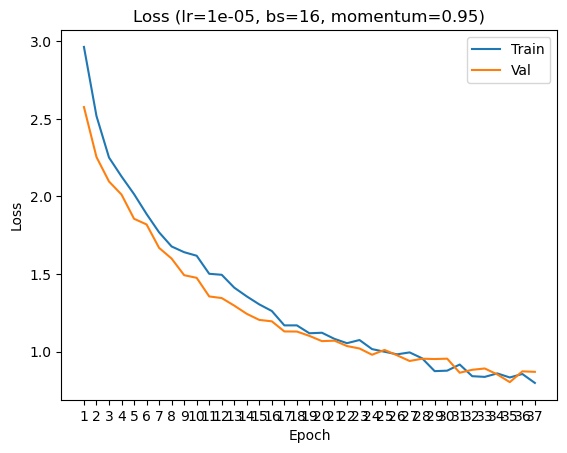

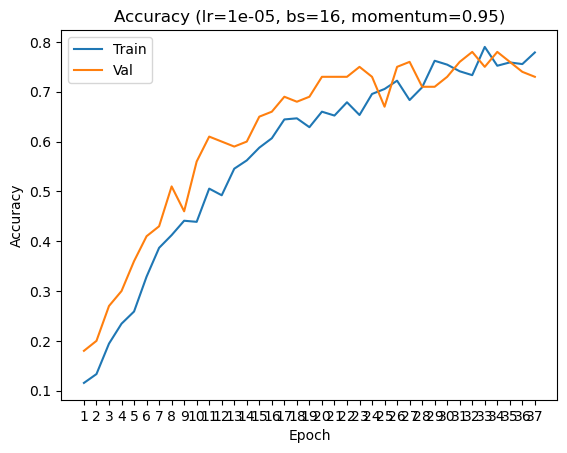

In [9]:
lr = 1e-5
batch_sizes = [4, 8, 16]
momentums = [0.8, 0.9, 0.95]
total_epochs = 50

for batch_size in batch_sizes:
    for momentum in momentums:

        total_train_loss, total_val_loss = [], []
        total_train_acc, total_val_acc = [], []

        dino_model = Classifier()
        dino_model = dino_model.to(device)
        criterion = nn.CrossEntropyLoss()
        # Initialise the SGD optimizer.
        optimizer = optim.SGD(dino_model.parameters(), lr=lr, momentum=momentum)
        # Put the model in "train" mode
        dino_model.train()

        best_val_acc = 0
        patience = 5  # Number of epochs to wait before stopping
        patience_counter = 0
            
        for epoch in range(total_epochs):    
            train_loss = []
            correct = 0
            total = 0
                
            balanced_trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, sampler = sampler)
            valloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers = 1)
                
            print(f"Testing: lr={lr}, bs={batch_size}, momentum={momentum}")
        

                
                
            for i, data in  tqdm.tqdm(enumerate(balanced_trainloader, 0), total = len(balanced_trainloader), desc = f'Epoch {epoch+1} - training phase'):
                inputs, labels = data
            
                # inputs = train_transform(inputs)
                    
                inputs = inputs.to(device)
                labels = labels.to(device)
            
                optimizer.zero_grad()
            
                features = dino(inputs)
                outputs = dino_model(features)
                    
                loss = criterion(outputs, labels)
                    
                loss.backward()
                    
                optimizer.step()
            
                train_loss += [loss.cpu().item()]
                    
                predicted = torch.argmax(outputs, axis = 1)
                    
                correct += torch.sum(predicted == labels).cpu().item()
                total += len(labels)
                    
            
            mean_train_loss = np.mean(train_loss)
            train_accuracy = correct/total
            print(f"Training {epoch+1}: loss={mean_train_loss:.3f} acc={train_accuracy:.3f}")
            
            total_train_loss += [mean_train_loss]
            total_train_acc += [train_accuracy]
                
            # Put the model in "eval" mode
            dino_model.eval()    
            
            # Validation loop: For all batches in the validation dataset
            with torch.no_grad(): # not build the computation graph for backpropagation, and thus, no gradients will be computed or stored for the tensors involved in those operations.
                val_loss, val_correct, val_total = 0.0, 0.0, 0.0
                for i, data in  tqdm.tqdm(enumerate(valloader, 0), total = len(valloader), desc = f'Epoch {epoch+1} - validation phase'):
                    inputs, labels = data
                        
                    inputs = inputs.to(device)
                    labels = labels.to(device)                
                    features = dino(inputs)
                    outputs = dino_model(features)
                    predicted = torch.argmax(outputs, axis = 1)                        
                    loss = criterion(outputs, labels)
                    val_loss += loss.cpu().item() * inputs.size(0)
                
                    val_correct += torch.sum(predicted == labels).cpu().item()
                    val_total += inputs.size(0)
                
                mean_val_loss = val_loss / val_total
                val_accuracy = val_correct / val_total
                    
                total_val_loss.append(mean_val_loss)
                total_val_acc.append(val_accuracy)
                    
                if val_accuracy > best_val_acc:
                    best_val_acc = val_accuracy
                    patience_counter = 0
                else:
                    patience_counter += 1
                    print(f"Validation accuracy didn't improve. Patience counter: {patience_counter}/{patience}")
                        
                    if patience_counter >= patience:
                        print("Early stopping triggered.")
                        break  # Breaks out of training loop

                print(f"Validation {epoch+1}: loss={mean_val_loss:.3f} acc={val_accuracy:.3f}")
                
                if val_accuracy > best_acc:
                    torch.save(dino_model.state_dict(), "dino_linear_classifier_best.pth")
                    best_acc = val_accuracy
                    with open("best_model_info.txt", "w") as f:
                        f.write(f"Best val accuracy: {val_accuracy:.4f}\n")
                        f.write(f"Epoch: {epoch+1}\n")
                        f.write(f"Learning rate: {lr}\n")
                        f.write(f"Batch size: {batch_size}\n")
                        f.write(f"Momentum: {momentum}\n")
            
        epoch_loss = range(1, len(total_train_loss) + 1)
        plt.plot(epoch_loss, total_train_loss, label = 'Train')
        plt.plot(epoch_loss, total_val_loss, label = 'Val')
        plt.xticks(epoch_loss)
        plt.legend()
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Loss (lr={lr}, bs={batch_size}, momentum={momentum})')
        plt.show()
            
        epoch_acc = range(1, len(total_train_acc) + 1)
        plt.plot(epoch_acc, total_train_acc, label = 'Train')
        plt.plot(epoch_acc, total_val_acc, label = 'Val')
        plt.xticks(epoch_acc)
        plt.legend()
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy (lr={lr}, bs={batch_size}, momentum={momentum})')
        plt.show()

In [12]:
wrapper = MyClassifier()
wrapper.setup()

best_classifier = wrapper.model
best_classifier = best_classifier.to(device)

In [10]:
with open('best_model_info.txt', 'r') as f:
    lines = f.readlines()

for line in lines:
    print(line.strip())

Best val accuracy: 0.8500
Epoch: 17
Learning rate: 0.0001
Batch size: 4
Momentum: 0.8


Epoch 1 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 1: loss=1.254 acc=0.574



Epoch 1 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.21it/s]


Validation 1: loss=0.631 acc=0.820


Epoch 2 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.37it/s]

Training 2: loss=0.504 acc=0.830



Epoch 2 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.24it/s]


Validation 2: loss=0.751 acc=0.760


Epoch 3 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 3: loss=0.350 acc=0.880



Epoch 3 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.23it/s]


Validation 3: loss=0.538 acc=0.810


Epoch 4 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.20it/s]

Training 4: loss=0.261 acc=0.918



Epoch 4 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 14.65it/s]


Validation 4: loss=0.629 acc=0.800


Epoch 5 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.33it/s]

Training 5: loss=0.286 acc=0.904



Epoch 5 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.27it/s]


Validation 5: loss=0.611 acc=0.800


Epoch 6 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 6: loss=0.196 acc=0.936



Epoch 6 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.19it/s]


Validation 6: loss=0.573 acc=0.860


Epoch 7 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 7: loss=0.150 acc=0.961



Epoch 7 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.14it/s]


Validation 7: loss=0.473 acc=0.840


Epoch 8 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 8: loss=0.142 acc=0.969



Epoch 8 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.17it/s]


Validation 8: loss=0.523 acc=0.810


Epoch 9 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 9: loss=0.146 acc=0.963



Epoch 9 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.15it/s]


Validation 9: loss=0.755 acc=0.820


Epoch 10 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 10: loss=0.119 acc=0.969



Epoch 10 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.10it/s]


Validation 10: loss=0.615 acc=0.810


Epoch 11 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 11: loss=0.131 acc=0.969



Epoch 11 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.24it/s]


Validation 11: loss=0.635 acc=0.870


Epoch 12 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 12: loss=0.103 acc=0.981



Epoch 12 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.26it/s]


Validation 12: loss=0.597 acc=0.860


Epoch 13 - training phase: 100%|██████████| 113/113 [00:25<00:00,  4.35it/s]

Training 13: loss=0.089 acc=0.982



Epoch 13 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.14it/s]


Validation 13: loss=0.618 acc=0.820


Epoch 14 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 14: loss=0.099 acc=0.972



Epoch 14 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.20it/s]


Validation 14: loss=0.642 acc=0.790


Epoch 15 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.34it/s]

Training 15: loss=0.071 acc=0.987



Epoch 15 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.17it/s]


Validation 15: loss=0.549 acc=0.870


Epoch 16 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.32it/s]

Training 16: loss=0.066 acc=0.989



Epoch 16 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.19it/s]


Validation 16: loss=0.599 acc=0.860


Epoch 17 - training phase: 100%|██████████| 113/113 [00:26<00:00,  4.35it/s]

Training 17: loss=0.092 acc=0.976



Epoch 17 - validation phase: 100%|██████████| 13/13 [00:00<00:00, 15.20it/s]

Validation 17: loss=0.512 acc=0.860


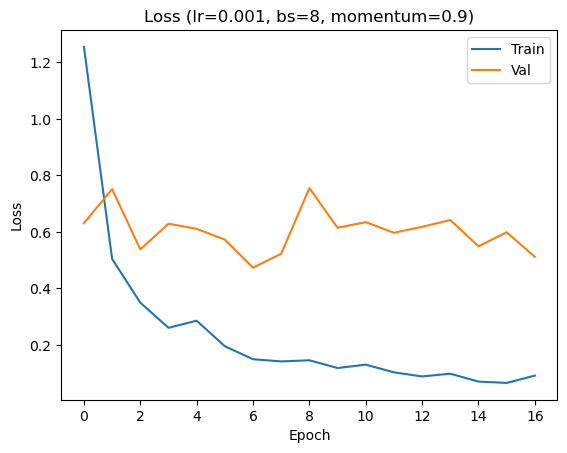

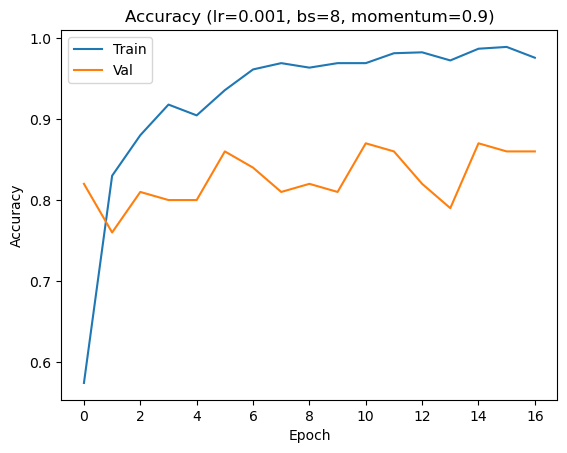

In [13]:
best_lr = 0.001
best_bs = 8
best_momentum = 0.9
epochs_final = 17

best_acc = 0
            
total_train_loss, total_val_loss = [], []
total_train_acc, total_val_acc = [], []

dino_model = Classifier()
dino_model = dino_model.to(device)
criterion = nn.CrossEntropyLoss()
# Initialise the SGD optimizer.
optimizer = optim.SGD(dino_model.parameters(), lr=best_lr, momentum=best_momentum)
# Put the model in "train" mode
dino_model.train()

for epoch in range(epochs_final):    
    train_loss = []
    correct = 0
    total = 0
                
    balanced_trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=best_bs, sampler = sampler)
    valloader = torch.utils.data.DataLoader(val_dataset, batch_size=best_bs, shuffle=False, num_workers = 1)
                                
    for i, data in  tqdm.tqdm(enumerate(balanced_trainloader, 0), total = len(balanced_trainloader), desc = f'Epoch {epoch+1} - training phase'):
        inputs, labels = data            
        inputs = inputs.to(device)
        labels = labels.to(device)
            
        optimizer.zero_grad()
            
        features = dino(inputs)
        outputs = dino_model(features)
                    
        loss = criterion(outputs, labels)
                    
        loss.backward()
                    
        optimizer.step()
            
        train_loss += [loss.cpu().item()]
                    
        predicted = torch.argmax(outputs, axis = 1)
                    
        correct += torch.sum(predicted == labels).cpu().item()
        total += len(labels)
                        
    mean_train_loss = np.mean(train_loss)
    train_accuracy = correct/total
    print(f"Training {epoch+1}: loss={mean_train_loss:.3f} acc={train_accuracy:.3f}")
            
    total_train_loss += [mean_train_loss]
    total_train_acc += [train_accuracy]
                
        # Put the model in "eval" mode
    dino_model.eval()    
            
        # Validation loop: For all batches in the validation dataset
    with torch.no_grad(): # not build the computation graph for backpropagation, and thus, no gradients will be computed or stored for the tensors involved in those operations.
        val_loss, val_correct, val_total = 0.0, 0.0, 0.0
        for i, data in  tqdm.tqdm(enumerate(valloader, 0), total = len(valloader), desc = f'Epoch {epoch+1} - validation phase'):
            inputs, labels = data
                        
            inputs = inputs.to(device)
            labels = labels.to(device)
                
            features = dino(inputs)
            outputs = dino_model(features)
            predicted = torch.argmax(outputs, axis = 1)
                        
            loss = criterion(outputs, labels)
            val_loss += loss.cpu().item() * inputs.size(0)
                
            val_correct += torch.sum(predicted == labels).cpu().item()
            val_total += inputs.size(0)
                
        mean_val_loss = val_loss / val_total
        val_accuracy = val_correct / val_total
                    
        total_val_loss.append(mean_val_loss)
        total_val_acc.append(val_accuracy)
                    
        print(f"Validation {epoch+1}: loss={mean_val_loss:.3f} acc={val_accuracy:.3f}")
                
        if val_accuracy > best_acc:
            torch.save(dino_model.state_dict(), "dino_best.pth")
            best_acc = val_accuracy
            with open("best_model_info.txt", "w") as f:
                f.write(f"Best val accuracy: {val_accuracy:.4f}\n")
                f.write(f"Epoch: {epoch+1}\n")
                f.write(f"Learning rate: {best_lr}\n")
                f.write(f"Batch size: {best_bs}\n")
                f.write(f"Momentum: {best_momentum}\n")
            
plt.plot(total_train_loss, label = 'Train')
plt.plot(total_val_loss, label = 'Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Loss (lr={best_lr}, bs={best_bs}, momentum={best_momentum})')
plt.show()
            
plt.plot(total_train_acc, label = 'Train')
plt.plot(total_val_acc, label = 'Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title(f'Accuracy (lr={best_lr}, bs={best_bs}, momentum={best_momentum})')
plt.show()

Epoch 1: loss=0.4535, acc=0.8530
Epoch 2: loss=0.3590, acc=0.8800
Epoch 3: loss=0.2793, acc=0.9080
Epoch 4: loss=0.2062, acc=0.9370
Epoch 5: loss=0.1860, acc=0.9460
Epoch 6: loss=0.1721, acc=0.9480


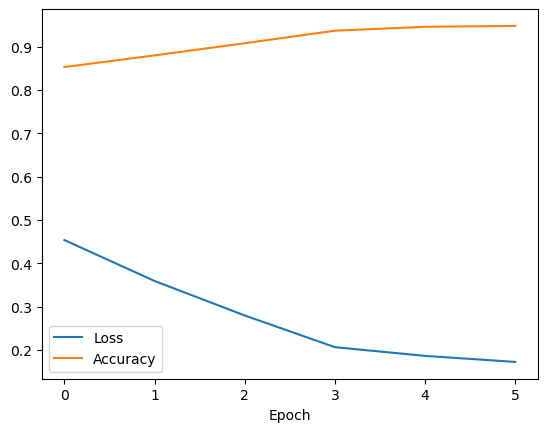

In [14]:
imagenet_means = (0.485, 0.456, 0.406)
imagenet_stds = (0.229, 0.224, 0.225)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((224, 224)),
     transforms.RandomHorizontalFlip(),
     transforms.RandomRotation(15),
     transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
     transforms.Normalize(imagenet_means, imagenet_stds)])

trainval_dataset = torchvision.datasets.ImageFolder('trainval', transform = transform)
test_targets = trainval_dataset.targets
full_loader = torch.utils.data.DataLoader(trainval_dataset, batch_size=best_bs,
                                              shuffle=True, num_workers = 1)

num_classes = len(trainval_dataset.classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(best_classifier.parameters(), lr=best_lr, momentum=best_momentum)

train_losses = []
train_accuracies = []

for epoch in range(epochs_final):
    best_classifier.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(full_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        features = dino(inputs)
        outputs = best_classifier(features)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = torch.argmax(outputs, dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    acc = correct / total
    avg_loss = running_loss / len(full_loader)

    train_losses.append(avg_loss)
    train_accuracies.append(acc)
    
    print(f"Epoch {epoch+1}: loss={avg_loss:.4f}, acc={acc:.4f}")

torch.save(best_classifier.state_dict(), "dino_full_dataset.pth") 
    
plt.plot(train_losses, label = 'Loss')
plt.plot(train_accuracies, label = 'Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.show()

### 2.3 Compute the performance 

Show the ROC, confusion matrix, and other appropriate metrics

In [16]:
gts, probs = [], []
#best_classifier.to(device)
with torch.no_grad():
    best_classifier.eval()
    for i, data in tqdm.tqdm(enumerate(full_loader), total=len(full_loader), desc="Evaluating"):
        # data
        inputs, label = data
        inputs = inputs.to(device)

        # run model to get prediction
        features = dino(inputs)
        outputs = best_classifier(features)        
        probability = F.softmax(outputs, dim=-1)    
        
        # collect
        gts.append(label.numpy())
        probs.append(probability.cpu().numpy())
        
gts, probs = np.concatenate(gts).astype(np.int32), np.vstack(probs).astype(np.float32)
print(f"{len(gts)}/{probs.shape} labels and predictions collected")
print(gts[0], probs[0])

Evaluating: 100%|██████████| 125/125 [00:07<00:00, 16.16it/s]

1000/(1000, 10) labels and predictions collected
8 [1.3747693e-04 7.2622748e-07 1.6869530e-05 4.5747639e-04 1.3046846e-03
 6.3238724e-04 7.1009795e-06 3.0370367e-07 9.9736005e-01 8.2947510e-05]


In [17]:
poison_labels = [idx for idx, name in enumerate(trainval_dataset.classes) if  'poison' in name]
gts_poison = np.isin(gts,poison_labels)
probs_poison = probs[:, poison_labels].sum(axis=1)

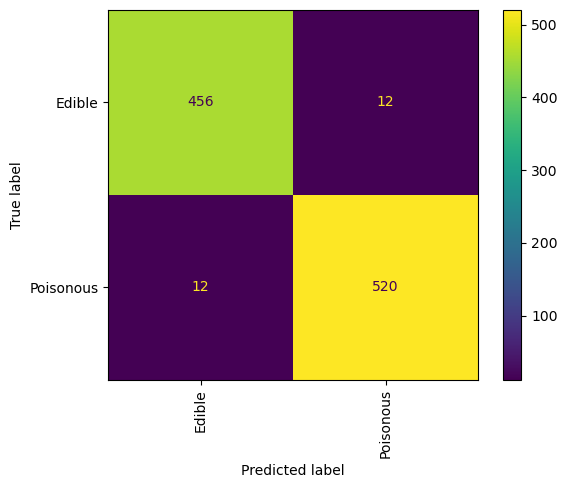

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

preds_poison  = probs_poison > 0.5
ConfusionMatrixDisplay.from_predictions(gts_poison, preds_poison, display_labels=['Edible', 'Poisonous'], xticks_rotation='vertical')

In [19]:
preds_poison  = probs_poison > 0.5
tp = np.logical_and(preds_poison, gts_poison).sum() 
fp = np.logical_and(preds_poison, ~gts_poison).sum() 
tn = np.logical_and(~preds_poison, ~gts_poison).sum() 
fn =  np.logical_and(~preds_poison, gts_poison).sum()

cm_counts = np.array([[tn, fp], [fn, tp]]).astype(np.int32)

prec = tp/(tp+fp)
rec = tp/(tp+fn)
fscore = (2 * (prec * rec)) / (prec + rec)
print(f"precision={prec:.2f}, recall={rec:.2f}, f-score={fscore:.2f}")

precision=0.98, recall=0.98, f-score=0.98


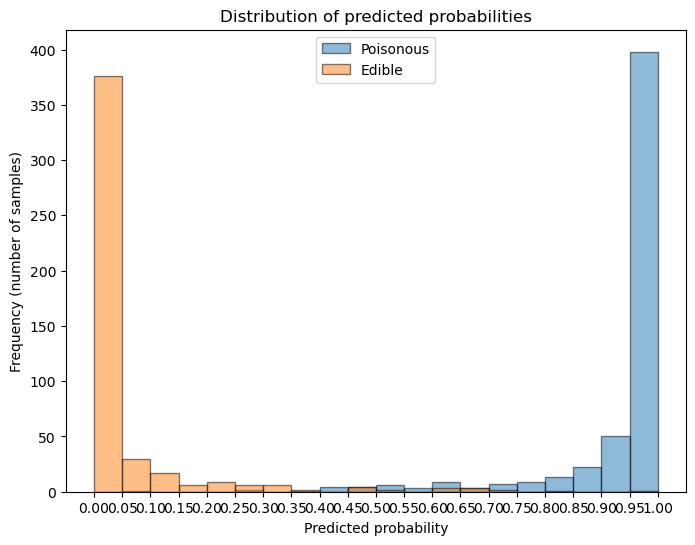

In [20]:
# Create histogram
num_bins = 20  # number of bins (e.g., 0.0–0.1, 0.1–0.2, ..., 0.9–1.0)
poison_counts, poison_bin_edges = np.histogram(probs_poison[gts_poison], bins=num_bins, range=(0, 1))
edible_counts, edible_bin_edges = np.histogram(probs_poison[~gts_poison], bins=num_bins, range=(0, 1))

# Plot histogram using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(poison_bin_edges[:-1], poison_counts, width=poison_bin_edges[1] - poison_bin_edges[0], edgecolor='black', align='edge', label='Poisonous', alpha=0.5)
plt.bar(edible_bin_edges[:-1], edible_counts, width=edible_bin_edges[1] - edible_bin_edges[0], edgecolor='black', align='edge', label='Edible', alpha=0.5)
plt.xlabel('Predicted probability')
plt.ylabel('Frequency (number of samples)')
plt.title('Distribution of predicted probabilities')
plt.xticks(np.linspace(0, 1, num_bins + 1))  # ticks at each bin edge
plt.legend()
plt.show()

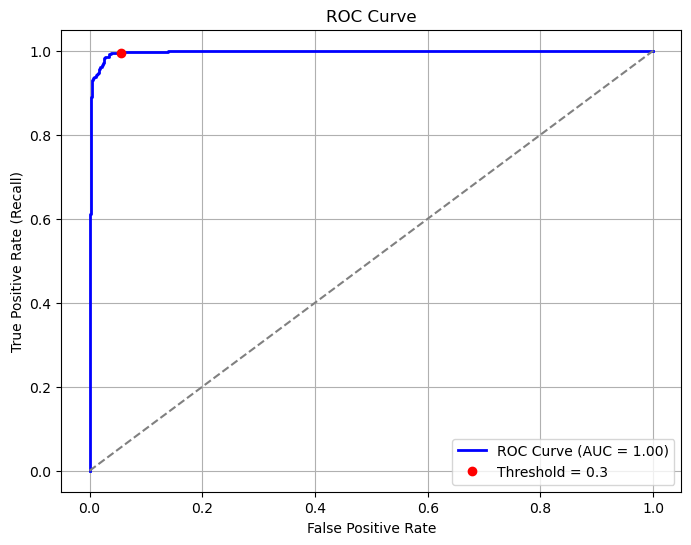

In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(gts_poison, probs_poison)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # random classifier line

# Mark your selected threshold (e.g., 0.5)
selected_threshold = 0.3
# Find index of closest threshold
closest_idx = np.argmin(np.abs(thresholds - selected_threshold))
plt.plot(fpr[closest_idx], tpr[closest_idx], 'ro', label=f'Threshold = {selected_threshold}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

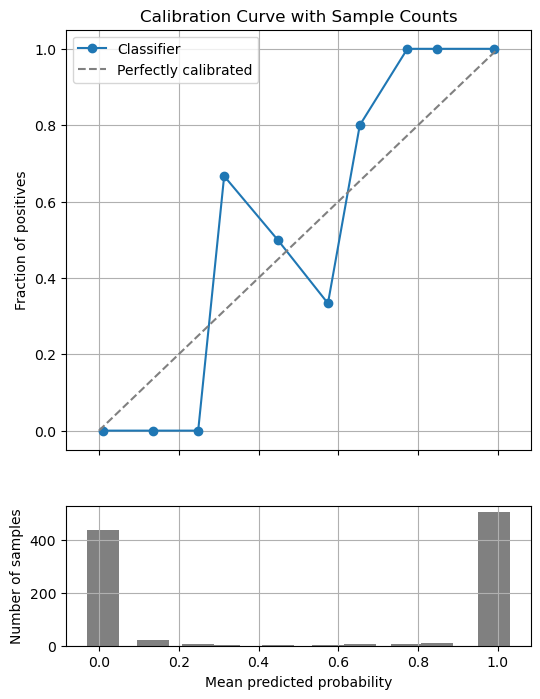

In [59]:
# Number of bins
n_bins = 10
bins = np.linspace(0, 1, n_bins + 1)

bin_indices = np.digitize(probs_poison, bins) - 1  # get bin index for each probability
bin_true_frac = []
bin_mean_prob = []
bin_counts = []

for i in range(n_bins):
    mask = bin_indices == i
    mask_sum = np.sum(mask)
    bin_counts.append(mask_sum)
    if mask_sum > 0:
        bin_true_frac.append(np.mean(gts_poison[mask]))  # fraction of positives
        bin_mean_prob.append(np.mean(probs_poison[mask]))  # mean predicted probability
    else:
        bin_true_frac.append(np.nan)
        bin_mean_prob.append(np.nan)

# Convert to arrays
bin_true_frac = np.array(bin_true_frac)
bin_mean_prob = np.array(bin_mean_prob)
bin_counts = np.array(bin_counts)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,8), sharex=True, gridspec_kw={'height_ratios':[3,1]})

# Top: calibration curve
ax1.plot(bin_mean_prob, bin_true_frac, marker='o', label='Classifier')
ax1.plot([0,1], [0,1], linestyle='--', color='gray', label='Perfectly calibrated')
ax1.set_ylabel('Fraction of positives')
ax1.set_title('Calibration Curve with Sample Counts')
ax1.grid(True)
ax1.legend()

# Bottom: histogram of counts
ax2.bar(bin_mean_prob, bin_counts, width=0.08, color='gray')
ax2.set_xlabel('Mean predicted probability')
ax2.set_ylabel('Number of samples')
ax2.grid(True)

plt.show()

### 2.4 Analyze the results and comment

Our binary classifier is designed to distinguish between poisonous and edible mushrooms. The model achieves a validation accuracy of approximately 89%, and an AUC score of 1 on the ROC curve, indicating strong discriminative ability. The thresholds is set at 0.8 However, the model sometimes misclassify, and false negatives are especially risky for this application, as they can lead to deadly outcomes.

## $\textcolor{blue}{\text{Task 3 - Small model with best performance}}$

### 3.1 Import your code and train your model

Import your model and train it!

In [32]:
%run task3.py

light_model = Classifier()
light_model

Classifier(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): AdaptiveAvgPool2d(output_size=(4, 4))
  )
  (classifier): Sequential(
    (0): Linear(in_features=4096, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=512, out_features=10, bias=True)
  

### 3.2 plot the loss

Show the loss vs epoch for the training and validation, follow the layout of the figure provided in the brief

### 3.3 Compute the performance 

Show the ROC, confusion matrix, and other appropriate metrics

In [ ]:
## your code here (you may use multiple cells including text to make it easy to read)

### 3.4 Analyze the results and comment

Code and text here

## $\textcolor{blue}{\text{Task 4 - Conclusion and overall recommendation}}$

Your text here